# 따릉이 적자분석 - 따릉이랩(3팀)

# 서론

> ## 문제 제시
**문제 인식**

- 따릉이는 서울시의 무인 공공 자전거 대여 서비스로, 매년 이용자 수와 실적이 증가하고 있음에도 불구하고 운영 적자 문제를 겪고 있다.

- 운영 수지는 매년 마이너스를 기록하고 있으며, 이는 요금 수입의 증가에도 불구하고 운영비가 더 큰 폭으로 증가하기 때문.


> ## 분석 방법



**적자의 원인**을 파악하기 위해 크게 두 가지 주요 주제를 분석하였다.


#### 적자의 원인 분석
따릉이 서비스의 적자 문제는 **운영비 증가**와 **이용 건수 증가** 간의 불균형에서 비롯된 것으로 파악, 두 가지 세부 주제를 중점적으로 분석.
#### 이용 패턴과 가격체계 분석
이용 실적의 증가에도 불구하고 적자가 발생하는 이유 중 하나는 가격체계와 이용 패턴에도 존재하는 것을 확인, 가격 정책과 이용 패턴을 종합적으로 분석.
#### 불균형한 반납 대여소 분석
대여소 간의 **불균형한 반납 현황**도 적자의 주요 원인 중 하나임을 확인. 일부 대여소에서는 **초과 대여**가 발생하고, 다른 대여소에서는 **초과 반납**이 빈번히 발생하는 등 반납의 불균형을 중점적으로 분석.

## 사용 데이터셋

| 데이터명                                | 기준년도    | 출처                                     |
|---------------------------------------|------------|----------------------------------------|
| 따릉이 운영 대수                        | 2015~2024  | 서울연구원_제352호_따릉이표                    |
| 따릉이 운영 인력                        | 2016~2023  | 서울시설공단_공공자전거운영처_종합현황              |
| 따릉이 운영 수지                        | 2016~2023  | https://news.kbs.co.kr/news/pc/view/view.do?ncd=5517087 |
| 서울특별시 공공자전거 이용정보(시간대별)      | 2024       | 서울 열린데이터 광장                       |
| 품목별 소비자물가지수 품목성질별              | 2015~2024  | kosis 국가통계포털                       |
| 서울시 공공자전거 대여소 정보                | 2015~2025  | 서울 열린데이터 광장                       |


## 분석

In [ ]:
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import folium
from plotnine import *

In [ ]:
#사전 준비

# # ▶ 한글 폰트 다운로드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'KoPubDotum_Pro' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

# from google.colab import drive
# drive.mount('/content/drive')

### 구별 거치대, 이용현황

In [ ]:
# 대여소 정보(24.12_2).xlsx
bike_station_info = pd.read_excel(io="../대여소 정보(24.12_2).xlsx", sheet_name='대여소현황')
bike_station_info.head()

대여소 번호     보관소(대여소)명  자치구                             상세주소         위도  \
0     301   경복궁역 7번출구 앞  종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞  37.575794   
1     302   경복궁역 4번출구 뒤  종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤  37.575947   
2     303   광화문역 1번출구 앞  종로구       서울특별시 종로구 세종대로 지하189 세종로공원  37.571770   
3     305        종로구청 옆  종로구               서울특별시 종로구 세종로 84-1  37.572559   
4     307     서울역사박물관 앞  종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞  37.570000   

           경도               설치 시기  LCD 거치대수  QR 거치대수 운영방식  
0  126.971451 2015-10-07 12:03:46      20.0     20.0   QR  
1  126.974060 2015-10-07 12:04:22      12.0     12.0   QR  
2  126.974663 2015-10-07 00:00:00       8.0      8.0   QR  
3  126.978333 2015-01-07 00:00:00      16.0     16.0   QR  
4  126.971100 2015-10-07 12:09:09      11.0     11.0   QR

In [ ]:
# 시간대별 이용정보(24).csv
bike_station_info = pd.read_csv("../시간대별 이용정보(24).csv", encoding='cp949')
bike_station_info.head()

대여일자  대여시간  대여소번호                 대여소명 대여구분코드   성별 연령대코드  이용건수  \
0  2024-12-01     0   1442  1442. 중랑구청 중화동 별관 앞    정기권  NaN  ~10대     1   
1  2024-12-01     0   2728     2728.마곡나루역 3번 출구    정기권  NaN  ~10대     1   
2  2024-12-01     0   1023     1023. 한국종합기술사옥 앞    정기권  NaN   20대     1   
3  2024-12-01     0   1150       1150. 송정역 1번출구    정기권  NaN   20대     1   
4  2024-12-01     0   1260  1260. 방이동 한양3차아파트 옆    정기권  NaN   20대     1   

      운동량   탄소량  이동거리(M)  이용시간(분)  
0  105.32  0.66  2829.30       18  
1   22.45  0.25  1090.00        7  
2  148.31  0.87  3745.23       21  
3   24.01  0.19   808.44        6  
4   92.85  0.94  4042.55       35

In [ ]:
# 대여소 정보 전처리

bike_station_info['거치대'] = bike_station_info['LCD 거치대수'] + bike_station_info['QR 거치대수']
temp_bike_station = bike_station_info.drop(['설치 시기', 'LCD 거치대수', 'QR 거치대수', '운영방식'], axis=1)

# 열 이름 변경 및 순서 변경
temp_bike_station = temp_bike_station.rename(columns={
    '자치구': '구',
    '대여소 번호': '대여소번호',
    '보관소(대여소)명': '대여소명',
    '상세주소': '주소',
    '위도': '위도',
    '경도': '경도'
})

temp_bike_station = temp_bike_station[['구', '대여소번호', '대여소명', '주소', '거치대', '위도', '경도']]

temp_bike_station.head()

구  대여소번호          대여소명                               주소   거치대         위도  \
0  종로구    301   경복궁역 7번출구 앞  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞  40.0  37.575794   
1  종로구    302   경복궁역 4번출구 뒤  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤  24.0  37.575947   
2  종로구    303   광화문역 1번출구 앞       서울특별시 종로구 세종대로 지하189 세종로공원  16.0  37.571770   
3  종로구    305        종로구청 옆               서울특별시 종로구 세종로 84-1  32.0  37.572559   
4  종로구    307     서울역사박물관 앞      서울특별시 종로구 새문안로 55 서울역사박물관 앞  22.0  37.570000   

           경도  
0  126.971451  
1  126.974060  
2  126.974663  
3  126.978333  
4  126.971100

In [ ]:
# 대여소 정보 info
temp_bike_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구       2766 non-null   object 
 1   대여소번호   2766 non-null   int64  
 2   대여소명    2766 non-null   object 
 3   주소      2766 non-null   object 
 4   거치대     341 non-null    float64
 5   위도      2766 non-null   float64
 6   경도      2766 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 151.4+ KB


In [ ]:
# 시간대별 이용정보 전처리
bike_station = bike_station_info.copy()

# 대여일자 열을 날짜 형식으로 변환
bike_station['대여일자'] = pd.to_datetime(bike_station['대여일자'])

# 운동량과 탄소량을 숫자형으로 변환
bike_station['운동량'] = pd.to_numeric(bike_station['운동량'], errors='coerce')
bike_station['탄소량'] = pd.to_numeric(bike_station['탄소량'], errors='coerce')
bike_station = bike_station.drop(columns=['대여소명'])

bike_result = pd.merge(bike_station, temp_bike_station, on=['대여소번호'], how='left')
bike_result_1 = bike_result.copy()

bike_result_1 = bike_result.groupby(['구'])['이용건수'].sum()
temp_bike_result_1 = pd.DataFrame(bike_result_1)
temp_bike_result_1.reset_index(inplace=True)

In [ ]:
# 시간대별 이용정보 -> 구별 정보 merge
sum_temp_bike_station = temp_bike_station.groupby(['구'])[('거치대')].sum()
sum_temp_bike_station = pd.DataFrame(sum_temp_bike_station)
sum_temp_bike_station = sum_temp_bike_station.reset_index()
sum_temp_bike_station.columns = ['구', '거치대']

num_use=pd.merge(sum_temp_bike_station, temp_bike_result_1, on='구')
num_use['거치대정규'] = num_use['거치대'] / num_use['거치대'].max()
num_use.head(5)

구    거치대    이용건수     거치대정규
0  강남구  232.0   66294  0.152431
1  강동구   73.0   95831  0.047963
2  강북구   17.0   30098  0.011170
3  강서구  434.0  306879  0.285151
4  관악구  136.0   44100  0.089356

In [ ]:
# 구별 정보에 이용건수, 거치대 비율 추가
num_use['이용건수/거치대 비율'] = num_use['이용건수'] / num_use['거치대']
num_use_non_zero_stands_sorted = num_use.sort_values(by='이용건수/거치대 비율', ascending=False)

# 구별 대여소 수 계산
rental_station_count = temp_bike_station.groupby('구')['대여소번호'].nunique().reset_index()
rental_station_count.columns = ['구', '대여소 수']

# num_use_non_zero_stands_sorted와 대여소 수 병합
num_use_non_zero_stands_sorted = num_use_non_zero_stands_sorted.merge(rental_station_count, on='구', how='left')

# 이용건수 / 대여소 수 계산 후 새로운 열 추가
num_use_non_zero_stands_sorted['이용건수/대여소 수'] = num_use_non_zero_stands_sorted['이용건수'] / num_use_non_zero_stands_sorted['대여소 수']
num_use_non_zero_stands_sorted = num_use_non_zero_stands_sorted.drop(columns=['이용건수/거치대 비율'])
num_use_non_zero_stands_sorted = num_use_non_zero_stands_sorted.sort_values(by='이용건수/대여소 수', ascending=False)

In [ ]:
# 구별 정보
num_use_non_zero_stands_sorted.head()

구     거치대    이용건수     거치대정규  대여소 수   이용건수/대여소 수
7    강서구   434.0  306879  0.285151    192  1598.328125
5    양천구   166.0  149327  0.109067    111  1345.288288
16  영등포구  1275.0  222273  0.837714    167  1330.976048
17   광진구   664.0  105844  0.436268     86  1230.744186
6    노원구   173.0  145232  0.113666    152   955.473684

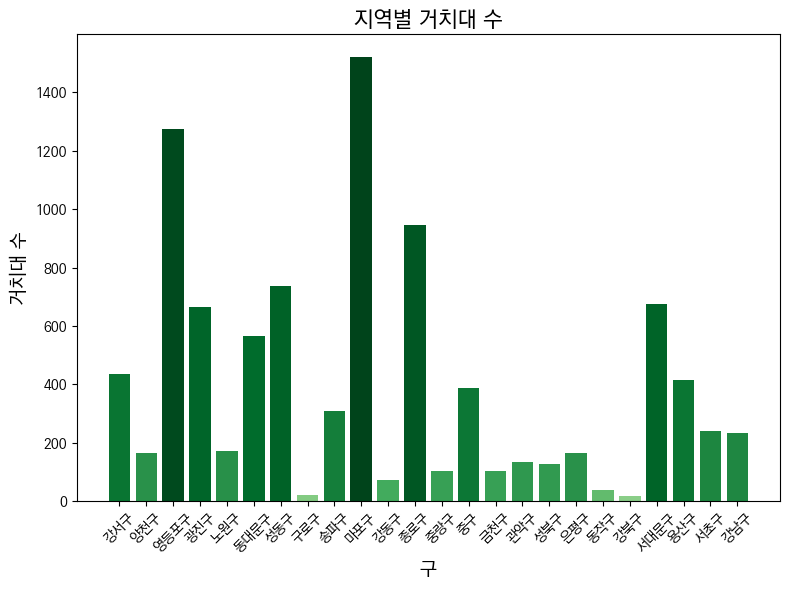

In [ ]:
# 지역별 거치대 수 시각화

from matplotlib.colors import LogNorm

# log scale을 사용하여 색상 대비 조정
norm = LogNorm(vmin=0.5, vmax=num_use_non_zero_stands_sorted['거치대'].max())  # 값이 1 이상일 때 log scale 적용
colors = plt.cm.Greens(norm(num_use_non_zero_stands_sorted['거치대']))  # 초록색 계열의 색상 맵을 사용
num_use_non_zero_stands_sorted = num_use_non_zero_stands_sorted[num_use_non_zero_stands_sorted['구'] != '도봉구']

plt.figure(figsize=(8, 6))
plt.bar(num_use_non_zero_stands_sorted['구'], num_use_non_zero_stands_sorted['거치대'], color=colors)

# 제목과 레이블 설정
plt.title("지역별 거치대 수", fontsize=16)
plt.xlabel("구", fontsize=14)
plt.ylabel("거치대 수", fontsize=14)

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

> ### 구별 거치대 수와 이용 건수의 관계

구별 거치대 수와 이용 건수의 관계를 분석한 결과, **각 구별 거치대의 수가 이용 건수와 비례하지 않음**을 알 수 있었다.

- **거치대 많음, 이용 건수 많음 (수요=공급)**: 영등포구
- **거치대 많음, 이용 건수 적음 (수요 < 공급)**: 마포구, 종로구
- **거치대 적음, 이용 건수 많음 (수요 > 공급)**: 강서구, 송파구, 양천구, 노원구, 구로구, 강동구
- **거치대 적음, 이용 건수 적음 (수요 < 공급)**: 강북구, 동작구 (따릉이 세권 아님)

- **과잉 공급 지역**: 일부 지역(마포구, 종로구)에서는 **이용량**이 많지 않음에도 **거치대**가 과도하게 설치되어 있었다. 이는 **수요와 공급의 불균형**을 초래할 수 있다.
- **공급 부족 지역**: 반면, **강서구**, **송파구** 등 일부 지역에서는 거치대가 부족해 **수요를 충분히 충족하지 못하고** 있다. 이는 **자전거 활용의 불균형**과 **운영 상의 비효율**을 초래한다.

따라서, 일부 지역에서 **자전거 활용**의 불균형과 **운영상의 비효율**이 발생할 가능성이 있으며, 이를 해결하기 위한 **대여소 배치 최적화**가 필요하다.


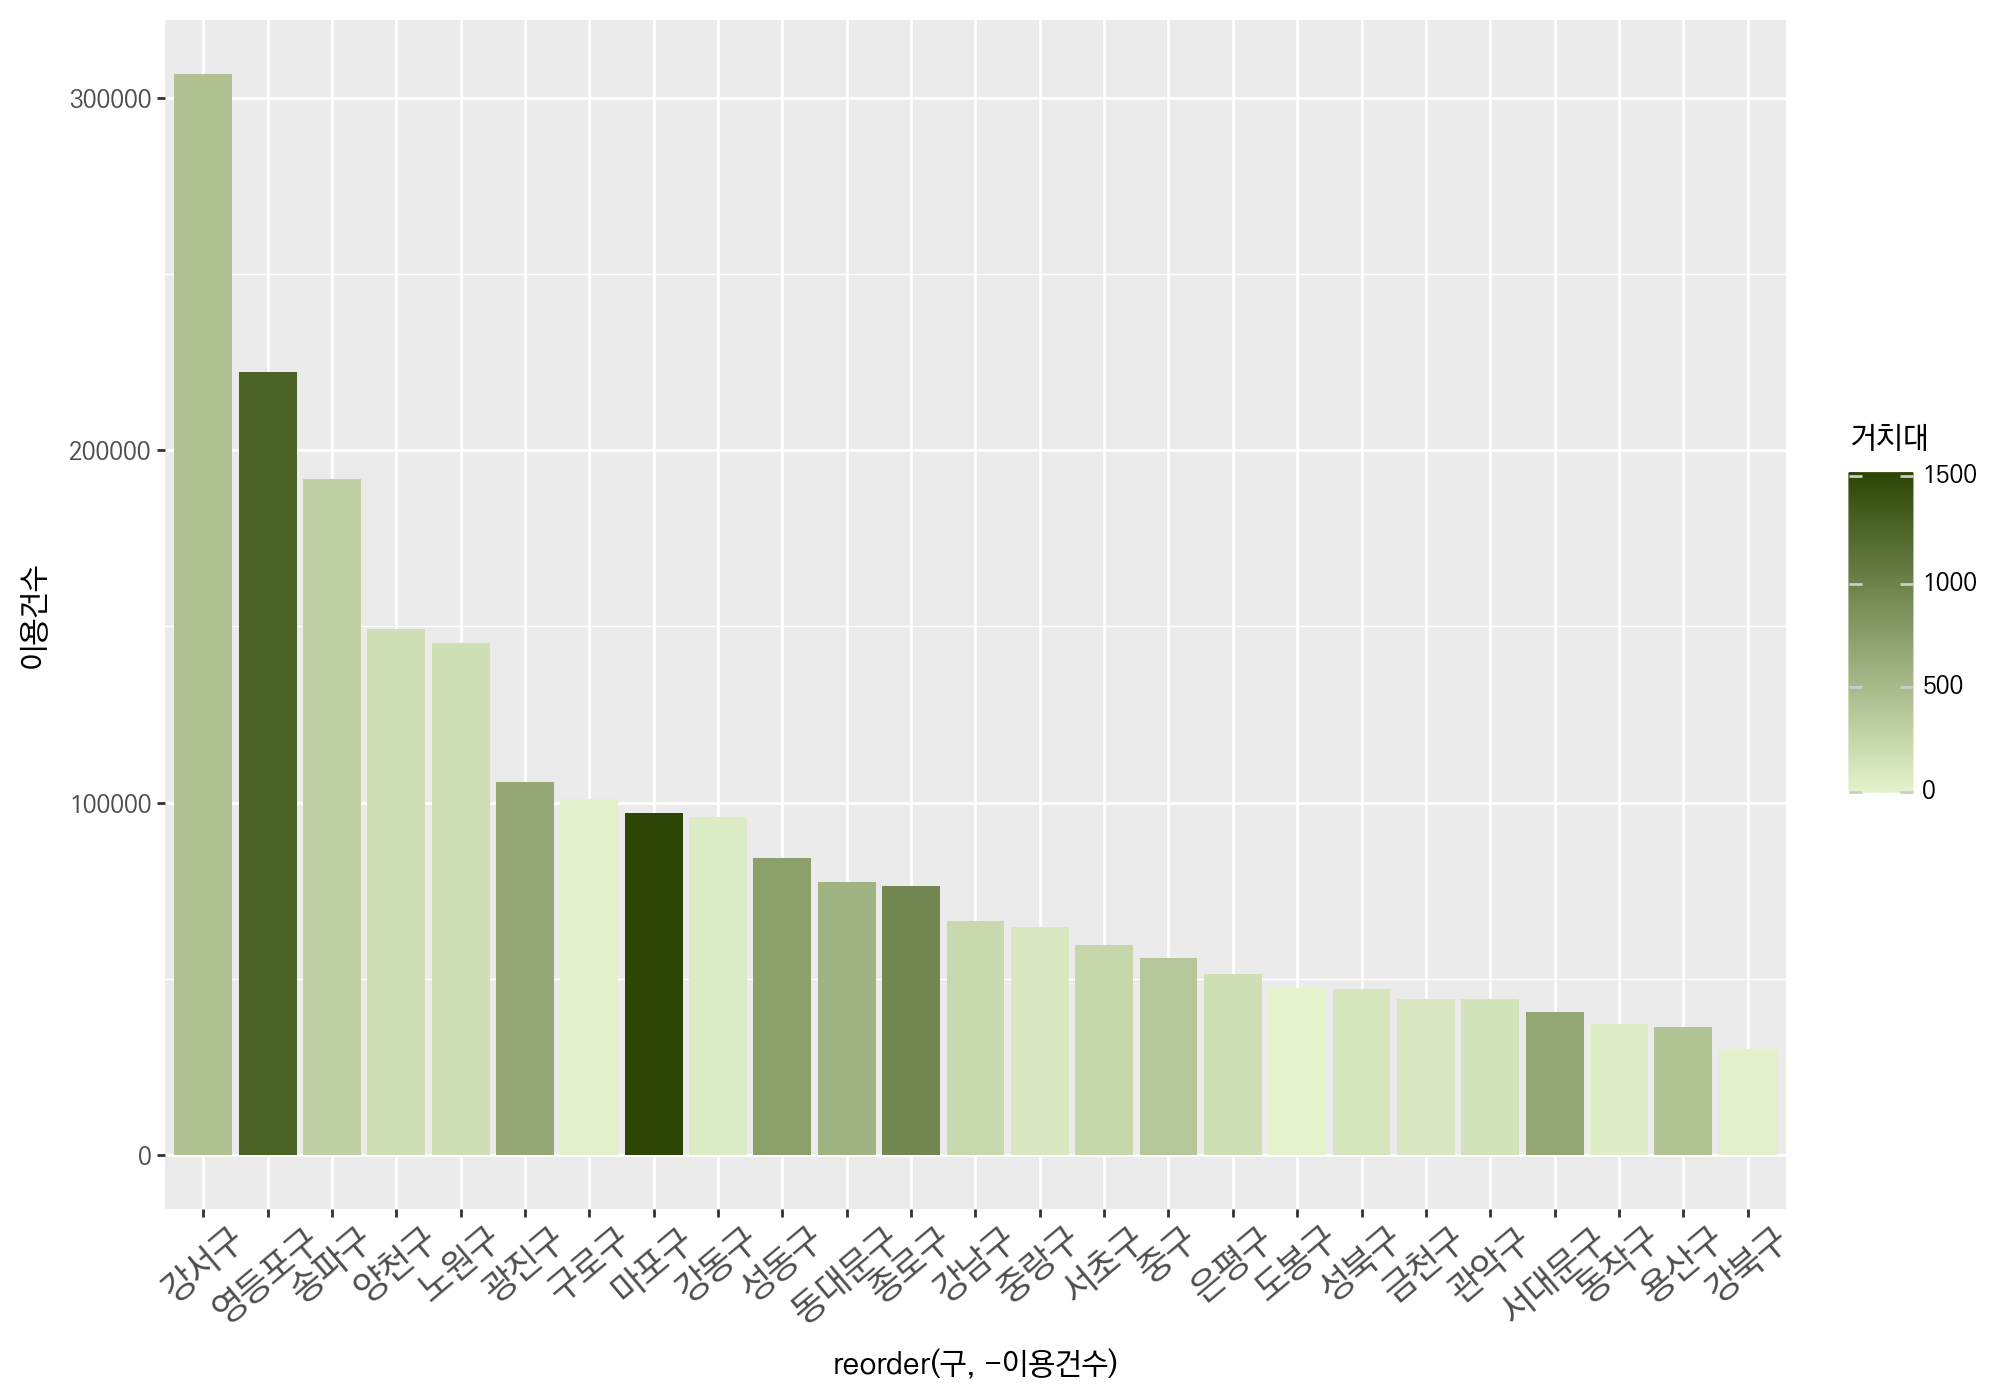

In [ ]:
# 구별 이용 건수, 별 거치대 수

# ggplot 생성 시 figsize를 설정
(ggplot(num_use)
 + aes(x='reorder(구, -이용건수)', y='이용건수', fill='거치대')
 + geom_col()
 + scale_fill_gradient(low='#e4f3cc', high='#2d4606')
 + theme(text=element_text(family='KoPubDotum_Pro'),
         axis_text_x=element_text(rotation=40, size=13),
         figure_size=(10, 7))  # 그래프 크기 설정
)

###  따릉이 세권(영등포구, 마포구, 종로구)과 비 따릉이 세권(송파, 강서, 강북, 동작)의 반납 횟수 비율¶

In [ ]:
# 대여소별 이용량(24.7).csv
bike_usage_data = pd.read_csv("../대여소별 이용량(24.7).csv", encoding='cp949')
bike_usage_data.head()

자치구              대여소명    기준년월  대여건수  반납건수
0  강남구  2301. 현대고등학교 건너편  202407  1100  1215
1  강남구  2301. 현대고등학교 건너편  202408  1602  1688
2  강남구  2301. 현대고등학교 건너편  202409  2398  2473
3  강남구  2301. 현대고등학교 건너편  202410  2415  2511
4  강남구  2301. 현대고등학교 건너편  202411  1119  1165

In [ ]:
# 대여소별 이용량 info()
bike_usage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     16404 non-null  object
 1   대여소명    16404 non-null  object
 2   기준년월    16404 non-null  int64 
 3   대여건수    16404 non-null  int64 
 4   반납건수    16404 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 640.9+ KB


In [ ]:
# 대여소별 이용량 전처리

bike_usage_data[['대여소번호', '대여소명']] = bike_usage_data['대여소명'].str.split('.', expand=True, n=1)
bike_usage_data = bike_usage_data[['자치구', '대여소번호', '대여소명', '기준년월', '대여건수', '반납건수']]
bike_usage_data['대여소번호'] = pd.to_numeric(bike_usage_data['대여소번호'], errors='coerce')

bike_usage_data.head()

자치구   대여소번호         대여소명    기준년월  대여건수  반납건수
0  강남구  2301.0   현대고등학교 건너편  202407  1100  1215
1  강남구  2301.0   현대고등학교 건너편  202408  1602  1688
2  강남구  2301.0   현대고등학교 건너편  202409  2398  2473
3  강남구  2301.0   현대고등학교 건너편  202410  2415  2511
4  강남구  2301.0   현대고등학교 건너편  202411  1119  1165

In [ ]:
# 대여소별 대여, 반납 건수, 구, 거치대 수, 이용반납비율 최종 정리 데이터

bike_usage_data_tmp = bike_usage_data.groupby(['대여소번호', '대여소명'])[['대여건수', '반납건수']].sum()
result_bike_usage_data_tmp = pd.DataFrame(bike_usage_data_tmp)
result_bike_usage_data_tmp.reset_index(inplace=True)
result_bike_usage_data_tmp_merge = pd.merge(result_bike_usage_data_tmp, temp_bike_station, on=['대여소번호', '대여소명'], how='left')
result_bike_usage_data_tmp_merge['이용반납비율'] = (result_bike_usage_data_tmp_merge['반납건수'] / result_bike_usage_data_tmp_merge['대여건수'].round(2))

result_bike_usage_data_tmp_merge.head()

대여소번호         대여소명   대여건수   반납건수    구                 주소   거치대         위도  \
0  102.0   망원역 1번출구 앞  21419  22229  마포구  서울특별시 마포구 월드컵로 72  35.0  37.555649   
1  103.0   망원역 2번출구 앞  17499  18584  마포구  서울특별시 마포구 월드컵로 79  28.0  37.554951   
2  104.0   합정역 1번출구 앞   9754   8576  마포구   서울특별시 마포구 양화로 59  26.0  37.550629   
3  105.0   합정역 5번출구 앞   5212   4585  마포구   서울특별시 마포구 양화로 48  10.0  37.550007   
4  106.0   합정역 7번출구 앞  13585  13367  마포구    서울특별시 마포구 독막로 4  24.0  37.548645   

           경도    이용반납비율  
0  126.910629  1.037817  
1  126.910835  1.062004  
2  126.914986  0.879229  
3  126.914825  0.879701  
4  126.912827  0.983953

### 지역별 대여량 비교

In [ ]:
# 대여이력 정보(24.12).csv
bike_rental_history = pd.read_csv("../대여이력 정보(24.12).csv", encoding='cp949')
bike_rental_history.head()

자전거번호                 대여일시 대여 대여소번호           대여 대여소명 대여거치대  \
0  SPB-38138  2024-12-01 00:00:13    00228       선유도역 3번출구 앞     0   
1  SPB-54015  2024-12-01 00:01:22    01192  마곡수명산파크 209동 건너편     0   
2  SPB-59421  2024-12-01 00:00:24    00245       삼성생명 당산사옥 앞     0   
3  SPB-32929  2024-12-01 00:00:34    01117    등촌5단지아파트 버스정류장     0   
4  SPB-39202  2024-12-01 00:01:15    01264      천호역 10번 출구 앞     0   

                  반납일시 반납대여소번호         반납대여소명 반납거치대  이용시간(분)  이용거리(M)    생년  \
0  2024-12-01 00:02:41   04560       양평동성원아파트     0        2   625.10  1997   
1  2024-12-01 00:03:31   02732    마곡수명산 1-2단지     0        2     0.00  1983   
2  2024-12-01 00:04:11   00280   양평동6차현대아파트 앞     0        3   890.00  1991   
3  2024-12-01 00:04:50   01174  강서구청사거리(부민병원)     0        4   671.61  1994   
4  2024-12-01 00:04:54   02611     송파지역자활센터 뒤     0        3    49.16    \N   

    성별 이용자종류  대여대여소ID  반납대여소ID  자전거구분  
0    M   내국인   ST-278  ST-2811  일반자전거  
1  NaN   내국인  ST-1710  ST-2049  일반자전거  
2   \N   내국인   ST-294  ST-1539  일반자전거  
3   \N   내국인   ST-834  ST-1511  일반자전거  
4    M   내국인  ST-1083  ST-1684  일반자전거

In [ ]:
# 대여이력 정보 전처리

# 1. 날짜 형식 변경
bike_rental_history['대여일시'] = pd.to_datetime(bike_rental_history['대여일시'])
bike_rental_history['반납일시'] = pd.to_datetime(bike_rental_history['반납일시'])

# 2. 생년의 '\N'을 NaN으로 처리하고, 숫자로 변환 후 나이 계산
bike_rental_history['생년'] = pd.to_numeric(bike_rental_history['생년'], errors='coerce')
bike_rental_history['나이'] = 2024 - bike_rental_history['생년']

# 3. 결측치 처리
bike_rental_history['대여거치대'].fillna(0, inplace=True)  # 결측치를 0으로 채움
bike_rental_history['반납거치대'].fillna(0, inplace=True)  # 결측치를 0으로 채움
bike_rental_history['이용시간(분)'].fillna(bike_rental_history['이용시간(분)'].mean(), inplace=True)  # 평균으로 채움
bike_rental_history['이용거리(M)'].fillna(bike_rental_history['이용거리(M)'].mean(), inplace=True)  # 평균으로 채움

# 4. 필요 없는 열 삭제
bike_rental_history.drop(columns=['자전거번호', '이용자종류', '대여대여소ID', '반납대여소ID', '자전거구분'], inplace=True)

bike_rental_history_first = bike_rental_history.copy()

bike_rental_history_first['대여 대여소번호'] = pd.to_numeric(bike_rental_history_first['대여 대여소번호'], errors='coerce')
bike_rental_history_first['반납대여소번호'] = pd.to_numeric(bike_rental_history_first['반납대여소번호'], errors='coerce')

bike_rental_history_first.head()

대여일시  대여 대여소번호           대여 대여소명 대여거치대                반납일시  \
0 2024-12-01 00:00:13     228.0       선유도역 3번출구 앞     0 2024-12-01 00:02:41   
1 2024-12-01 00:01:22    1192.0  마곡수명산파크 209동 건너편     0 2024-12-01 00:03:31   
2 2024-12-01 00:00:24     245.0       삼성생명 당산사옥 앞     0 2024-12-01 00:04:11   
3 2024-12-01 00:00:34    1117.0    등촌5단지아파트 버스정류장     0 2024-12-01 00:04:50   
4 2024-12-01 00:01:15    1264.0      천호역 10번 출구 앞     0 2024-12-01 00:04:54   

   반납대여소번호         반납대여소명 반납거치대  이용시간(분)  이용거리(M)      생년   성별    나이  
0   4560.0       양평동성원아파트     0        2   625.10  1997.0    M  27.0  
1   2732.0    마곡수명산 1-2단지     0        2     0.00  1983.0  NaN  41.0  
2    280.0   양평동6차현대아파트 앞     0        3   890.00  1991.0   \N  33.0  
3   1174.0  강서구청사거리(부민병원)     0        4   671.61  1994.0   \N  30.0  
4   2611.0     송파지역자활센터 뒤     0        3    49.16     NaN    M   NaN

In [ ]:
# 대여소별 정보 전처리
temp_bike_station['대여소번호'] = pd.to_numeric(temp_bike_station['대여소번호'], errors='coerce')
temp_bike_station.head()

구  대여소번호          대여소명                               주소   거치대         위도  \
0  종로구    301   경복궁역 7번출구 앞  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞  40.0  37.575794   
1  종로구    302   경복궁역 4번출구 뒤  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤  24.0  37.575947   
2  종로구    303   광화문역 1번출구 앞       서울특별시 종로구 세종대로 지하189 세종로공원  16.0  37.571770   
3  종로구    305        종로구청 옆               서울특별시 종로구 세종로 84-1  32.0  37.572559   
4  종로구    307     서울역사박물관 앞      서울특별시 종로구 새문안로 55 서울역사박물관 앞  22.0  37.570000   

           경도  
0  126.971451  
1  126.974060  
2  126.974663  
3  126.978333  
4  126.971100

In [ ]:
# 대여이력, 대여소별 정보 merge

# bike_rental_history_first와 temp_bike_station을 대여소번호를 기준으로 merge하여 '구' 추가
bike_rental_history_first_merge = bike_rental_history_first.merge(
    temp_bike_station[['대여소번호', '구']],
    left_on='대여 대여소번호',
    right_on='대여소번호',
    how='left'
).rename(columns={'구': '대여구'}).drop(columns=['대여소번호'])

# 반납구 추가: 반납대여소번호를 기준으로 다시 merge
bike_rental_history_first_merge = bike_rental_history_first_merge.merge(
    temp_bike_station[['대여소번호', '구']],
    left_on='반납대여소번호',
    right_on='대여소번호',
    how='left'
).rename(columns={'구': '반납구'}).drop(columns=['대여소번호'])

bike_rental_history_first_merge.head()

대여일시  대여 대여소번호           대여 대여소명 대여거치대                반납일시  \
0 2024-12-01 00:00:13     228.0       선유도역 3번출구 앞     0 2024-12-01 00:02:41   
1 2024-12-01 00:01:22    1192.0  마곡수명산파크 209동 건너편     0 2024-12-01 00:03:31   
2 2024-12-01 00:00:24     245.0       삼성생명 당산사옥 앞     0 2024-12-01 00:04:11   
3 2024-12-01 00:00:34    1117.0    등촌5단지아파트 버스정류장     0 2024-12-01 00:04:50   
4 2024-12-01 00:01:15    1264.0      천호역 10번 출구 앞     0 2024-12-01 00:04:54   

   반납대여소번호         반납대여소명 반납거치대  이용시간(분)  이용거리(M)      생년   성별    나이   대여구  \
0   4560.0       양평동성원아파트     0        2   625.10  1997.0    M  27.0  영등포구   
1   2732.0    마곡수명산 1-2단지     0        2     0.00  1983.0  NaN  41.0   강서구   
2    280.0   양평동6차현대아파트 앞     0        3   890.00  1991.0   \N  33.0  영등포구   
3   1174.0  강서구청사거리(부민병원)     0        4   671.61  1994.0   \N  30.0   강서구   
4   2611.0     송파지역자활센터 뒤     0        3    49.16     NaN    M   NaN   송파구   

    반납구  
0  영등포구  
1   강서구  
2  영등포구  
3   강서구  
4   송파구

### 지역별 시간에 따른 평균 대여, 반납량

In [ ]:
# 피봇 테이블로 시간별 정리
bike_rental_history_first_merge['대여시간'] = bike_rental_history_first_merge['대여일시'].dt.hour

# 대여구와 대여시간을 기준으로 대여건수 집계
pivot_table = pd.pivot_table(
    bike_rental_history_first_merge,
    values='대여거치대',
    index='대여구',
    columns='대여시간',
    aggfunc='count',
    fill_value=0
)

pivot_table

대여시간    0     1     2     3     4     5     6      7      8      9      10  \
대여구                                                                          
강남구   1392  1236   899   635   480   653  1401   2896   5454   3351   2596   
강동구   1976  1453  1065   816   578  1253  2262   5383   7853   4624   3729   
강북구   1005   887   678   592   299   426   564   1133   2013   1235   1145   
강서구   4591  3014  1941  1416  1473  3254  8962  21793  32421  15844  10759   
관악구   1271  1205   898   659   521   772  1146   2170   3388   2195   1756   
광진구   2350  1734  1208   931   609  1204  2200   5285  10586   6081   4146   
구로구   1961  1314   926   776   659  1293  2203   6641  10150   4979   3517   
금천구    655   534   334   233   272   536  1060   3249   6399   2583   1285   
노원구   3246  2166  1743  1088   953  1760  3200   7473   9305   6430   5958   
도봉구   1059   748   536   481   457   757   945   2523   3425   2105   1965   
동대문구  1455  1018   791   730   465   797  1770   4646   7102   3370   3025   
동작구    899   892   687   437   432   691   971   2253   3107   1597   1420   
마포구   1937  1594  1100   727   480  1105  1814   3771   7818   4934   3713   
서대문구   894   711   556   398   344   496  1085   3101   4289   2154   1790   
서초구   1093   810   625   440   263   681  1312   2830   4931   3171   2309   
성동구   1708  1275   822   563   460   779  1874   3598   8038   4847   3161   
성북구   1235  1007   759   585   354   578  1004   2596   3913   2191   1923   
송파구   3650  3008  1955  1161  1120  2024  4709   9683  16247  10097   7494   
양천구   2898  1805  1128   902   701  1386  3222   9813  11824   6711   5660   
영등포구  3575  2367  1608  1066   971  2477  4539  13289  22350   9799   7389   
용산구    965   753   524   369   387   421   613   1519   3079   1754   1298   
은평구   1268   970   640   417   381   531  1104   2705   4233   2476   2067   
종로구   1247  1151   690   572   626   709  1628   3621   6635   4044   3436   
중구    1037   839   636   550   529   464   893   2213   5048   2624   2232   
중랑구   1704  1311   984   721   573   821  1317   3368   4664   2740   2437   

대여시간     11     12     13     14     15     16     17     18     19     20  \
대여구                                                                          
강남구    2726   3085   3045   3324   3731   4213   5685   6493   3648   2746   
강동구    4007   4541   4783   4667   5128   5931   6434   7692   5612   4684   
강북구    1295   1512   1449   1537   1821   1878   1995   2217   1693   1454   
강서구   12537  13334  13134  13344  14999  17757  25460  29215  17948  13257   
관악구    1708   2047   2060   2073   2241   2411   2822   3261   2529   2076   
광진구    4394   4519   4816   5034   5350   5908   6572   8176   5760   4571   
구로구    3452   3953   4296   4650   4964   5720   7591   9775   5668   4279   
금천구    1428   1589   1571   1545   1692   2103   4059   5214   2772   1821   
노원구    6450   7504   7945   8371   9266  10761  10469  10601   8183   6756   
도봉구    1994   2184   2576   2841   2909   3276   3374   3870   2535   2072   
동대문구   3078   3539   3523   3414   3784   4386   4929   5373   3689   3043   
동작구    1430   1670   1715   2205   2348   2169   2411   2705   2008   1621   
마포구    4450   4855   4741   5399   5658   6042   7512   9237   5809   4361   
서대문구   1654   1839   1933   2058   2156   2250   2714   2989   1943   1527   
서초구    2602   2800   2780   3021   3264   3823   5293   5695   3385   2470   
성동구    3387   3653   3697   3733   4136   4636   7431   8586   4609   3435   
성북구    1971   2189   2341   2451   2607   2890   3218   3416   2679   1996   
송파구    8127   9149   9335   9462  10503  11963  14906  17720  11402   9194   
양천구    6117   7097   7526   7981   9039  10299  11190  13107   8682   6669   
영등포구   9757   9513   9209   9895  10973  12488  19317  22364  12122   8737   
용산구    1515   1682   1729   1945   2218   2541   3075   3113   1789   1424   
은평구    2224   2552   2639   2787   3062   3164   3385   4034   2945   2285   
종로구    4555   4072   

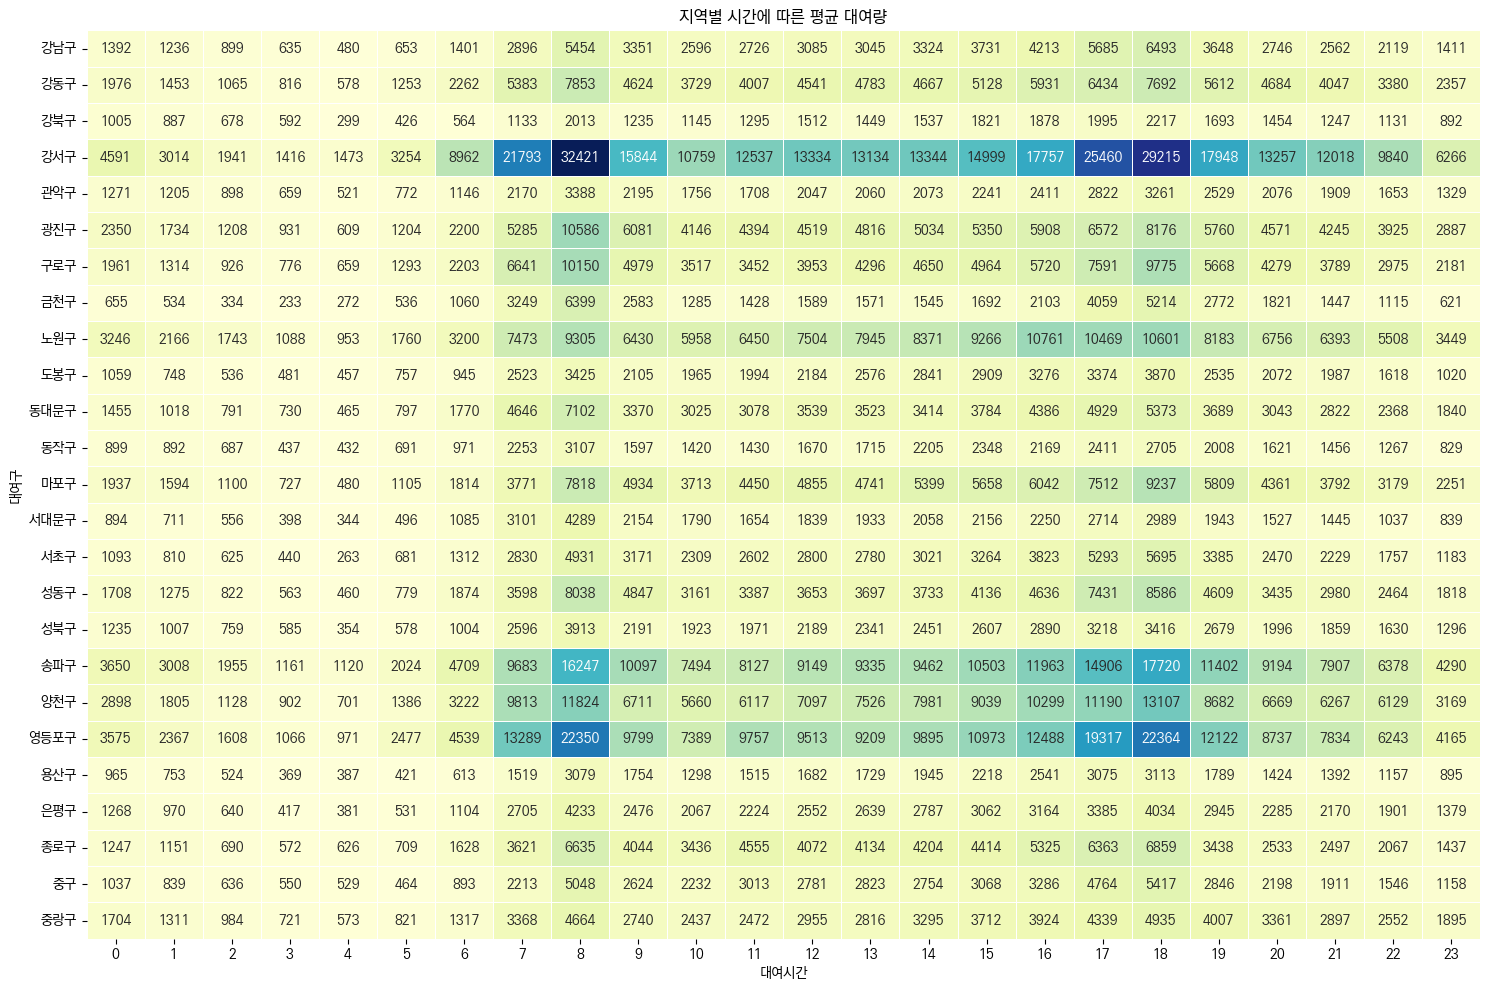

In [ ]:
# 지역별 시간에 따른 평균 대여량 히트맵

_, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(
    pivot_table,  # 피벗 테이블을 사용
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("지역별 시간에 따른 평균 대여량")
ax.set_ylabel("대여구")
plt.tight_layout()
plt.show();


In [ ]:
# 피봇 테이블로 시간별 정리
bike_rental_history_first_merge['반납시간'] = bike_rental_history_first_merge['반납일시'].dt.hour

# 대여구와 반납시간을 기준으로 대여건수 집계
pivot_table_return = pd.pivot_table(
    bike_rental_history_first_merge,
    values='대여거치대',  # 대여거치대가 대여건수를 나타낸다고 가정
    index='대여구',
    columns='반납시간',  # 반납시간을 기준으로 집계
    aggfunc='count',  # 반납시간 별로 대여 건수 세기
    fill_value=0
)

pivot_table_return

반납시간    0     1     2     3     4     5     6      7      8      9      10  \
대여구                                                                          
강남구   1412  1281   964   726   485   627  1195   2389   5298   3509   2507   
강동구   2039  1530  1142   880   591  1099  1960   4567   7962   4696   3671   
강북구    992   952   743   589   361   417   518    873   2025   1281   1019   
강서구   4972  3174  2107  1530  1394  2940  8204  19183  33163  16429  10822   
관악구   1255  1268   979   736   519   737  1035   1902   3364   2191   1755   
광진구   2389  1850  1325   985   679  1037  1939   4398  10562   6234   4129   
구로구   2025  1405   990   827   668  1115  1953   5222  10569   5436   3560   
금천구    644   567   346   266   268   467   980   2732   6435   2906   1264   
노원구   3216  2390  1852  1237   991  1483  2935   6502   9617   6173   5703   
도봉구   1061   816   578   499   407   744   876   2024   3515   2121   1934   
동대문구  1559  1081   828   779   444   707  1474   3675   7475   3535   3008   
동작구    854   908   772   458   412   652   895   1830   3105   1831   1310   
마포구   1897  1745  1252   801   533   932  1568   3214   7536   5120   3693   
서대문구   833   816   576   439   401   428   952   2337   4714   2179   1731   
서초구   1143   840   679   490   275   626  1040   2475   4784   3256   2245   
성동구   1662  1464   895   624   467   678  1642   3058   7650   5004   3211   
성북구   1234  1034   821   629   403   488   817   2128   4032   2227   1936   
송파구   3758  3168  2182  1310  1073  1800  4158   8293  16046  10358   7467   
양천구   2964  1984  1283   925   742  1158  2784   8102  12386   6845   5726   
영등포구  3693  2562  1763  1237   960  2102  4055  11341  22475  10350   7117   
용산구    925   815   606   392   390   428   542   1206   3036   1795   1304   
은평구   1273  1067   707   461   390   460   953   2297   4306   2412   2008   
종로구   1268  1132   831   593   599   662  1359   3185   6522   4014   3173   
중구    1059   890   683   582   456   533   795   1866   4808   2641   2114   
중랑구   1692  1419  1096   716   599   759  1118   2781   4871   2869   2345   

반납시간     11     12     13     14     15     16     17     18     19     20  \
대여구                                                                          
강남구    2434   2988   3106   3117   3620   3957   5290   6713   4289   3032   
강동구    3743   4452   4792   4538   5061   5801   6275   7694   6025   4985   
강북구    1207   1412   1462   1452   1758   1869   2014   2261   1775   1555   
강서구   11364  13380  13386  12941  14549  17524  23959  29566  19873  14011   
관악구    1658   1886   2101   2075   2101   2364   2716   3221   2728   2231   
광진구    4081   4444   4756   4890   5262   5812   6412   8029   6364   4922   
구로구    3350   3815   4148   4512   4912   5468   7166   9731   6410   4587   
금천구    1296   1581   1553   1563   1634   1933   3655   5272   3209   2022   
노원구    6069   7228   7793   8120   9019  10616  10618  10877   8797   7027   
도봉구    1940   2085   2354   2760   2912   3177   3475   3995   2733   2137   
동대문구   2874   3443   3509   3429   3615   4190   4932   5516   3973   3199   
동작구    1367   1602   1685   1801   2386   2274   2379   2800   2156   1779   
마포구    3783   4735   4697   5039   5634   5825   7352   9170   6670   4835   
서대문구   1638   1761   1899   1960   2094   2308   2602   3055   2123   1727   
서초구    2250   2892   2756   2839   3086   3727   4870   5924   4059   2741   
성동구    3063   3523   3715   3677   3970   4529   6944   8652   5483   3804   
성북구    1927   2061   2304   2312   2612   2857   3155   3442   2854   2198   
송파구    7394   8868   9230   9315  10167  11632  14273  17899  12578   9939   
양천구    5734   6887   7416   7662   8875  10087  10772  13415   9516   7055   
영등포구   8552   9778   9492   9464  10613  11690  16999  23100  14615   9851   
용산구    1368   1654   1682   1780   2064   2447   2985   3252   2246   1516   
은평구    2154   2367   2596   2717   2891   3284   3419   4092   3082   2483   
종로구    3915   4273   

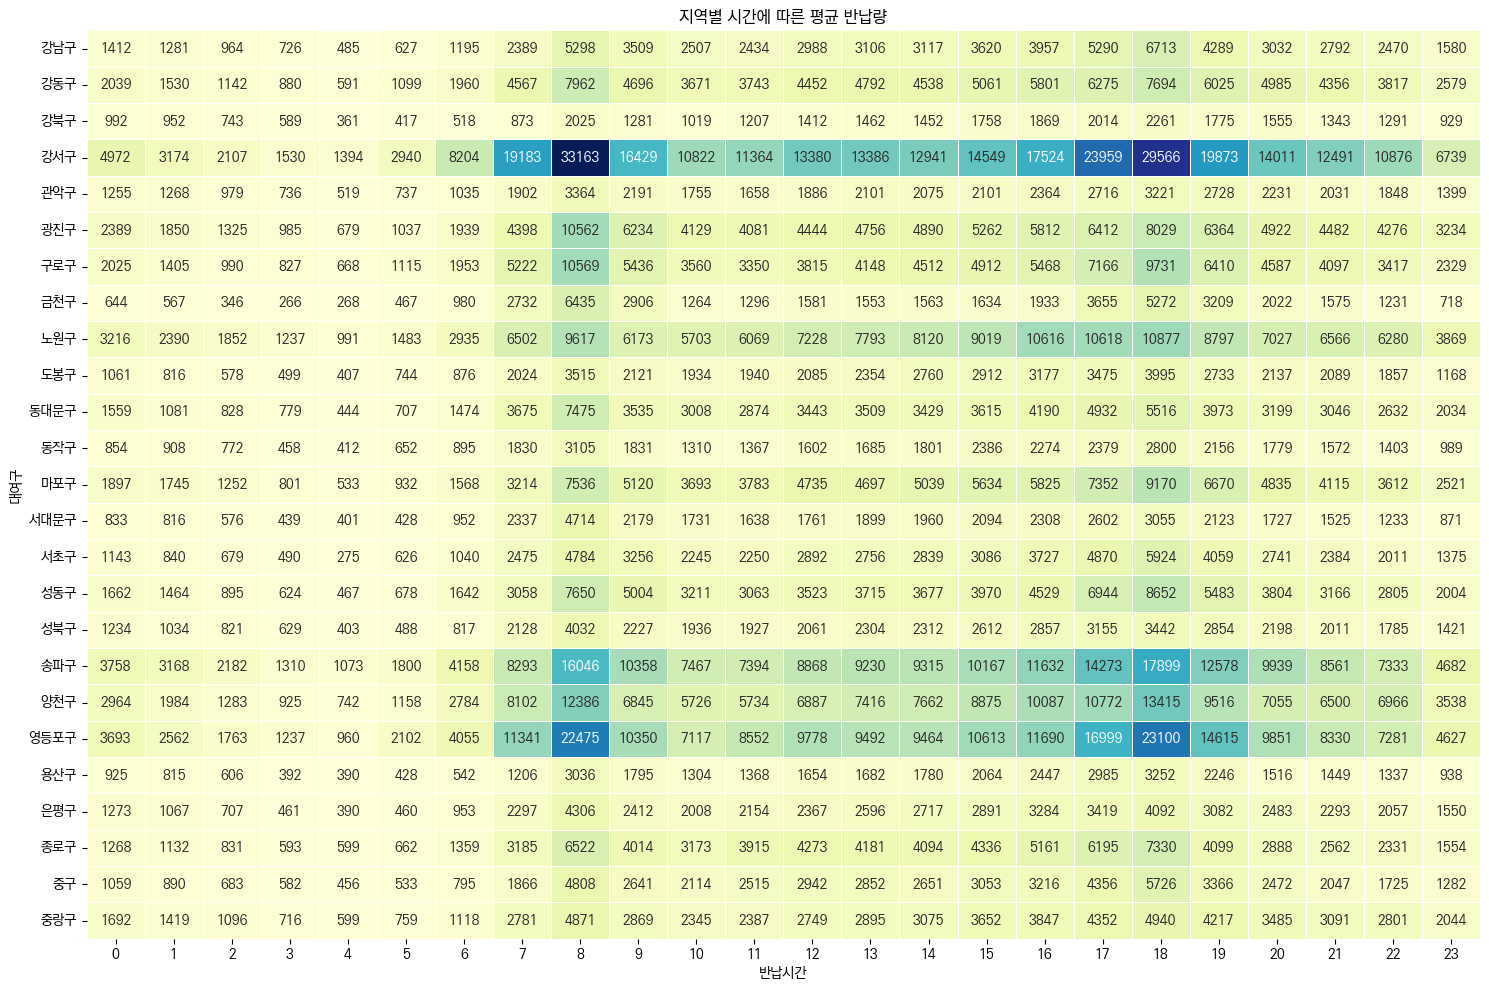

In [ ]:
# 지역별 시간에 따른 평균 반납량 히트맵

_, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(
    pivot_table_return,  # 피벗 테이블을 사용
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("지역별 시간에 따른 평균 반납량")
ax.set_ylabel("대여구")
plt.tight_layout()
plt.show();

#### 강서구, 송파구, 영등포구가 공통적으로 대여와 반납이 많았다.
출퇴근 시간에 공통적으로 많이 그려져 있는 것을 확인하였다.

### 지역구별 대여소 시각화

In [ ]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
# 지역구별 대여소 시각화 지도
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

choropleth = folium.Choropleth(
    geo_data=geo_str,
    data=sum_temp_bike_station,
    columns=['구', '거치대'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    legend_name='거치대 수'

)

choropleth.add_to(map)

map

#### 지역구별로  대여소 설치 분포를 시각화한 결과, 편중되어 있다는 점을 확인하였습니다.

In [ ]:
# 대여소 위치 세부적 시각화

map = folium.Map(location=[temp_bike_station['위도'].mean(), temp_bike_station['경도'].mean()], zoom_start=12, tiles='OpenStreetMap')

for n in temp_bike_station.index:
    # 팝업에 들어갈 텍스트
    popup_name = temp_bike_station['구'][n] + ' - ' + temp_bike_station['대여소명'][n]

    folium.features.CircleMarker(
        location=[temp_bike_station['위도'][n], temp_bike_station['경도'][n]],
        radius=3,
        popup=popup_name,

        fill=True,
        fill_color='BuGn',
        color='green',
        fill_opacity=0.3,
        weight=1
    ).add_to(map)
map

#### 대부분의 대여소가 도로 인근에 위치하고 있음을 확인하였다.
위치데이터를 이용하여 살펴본 결과, 대부분이 도로를 따라 설치되어 있었다. 버스나 지하철 등, 대중교통과 인접한 지역에 설치되었는데, 이는 공공자전거 대여소 입지 요건 중 '대중교통과의 연계성'을 반영한 결과다.

대여 입지 요건

> 대여소 상호연계성 / 대중교통 다중이용시설 주요 생활거점 지역성 / 교통환경, 주변상권 및 민원 등의 환경성 / 전기 인입 가능 시설 위치 지역 / 보도폭 4m 이상 필요

### 따릉이 운영수지 연도별 비교

In [ ]:
minus_df = pd.read_csv('따릉이 운영수지.csv', encoding='cp949')
minus_df.head()

년도      요금수입(A)   운영비 집행액(B)   운영수지(A-B)
0  2016    875000000   3421000000 -2546000000
1  2017   2786000000   6985000000 -4199000000
2  2018   5262000000  11979000000 -6717000000
3  2019   9057000000  18013000000 -8956000000
4  2020  11830000000  21730000000 -9900000000

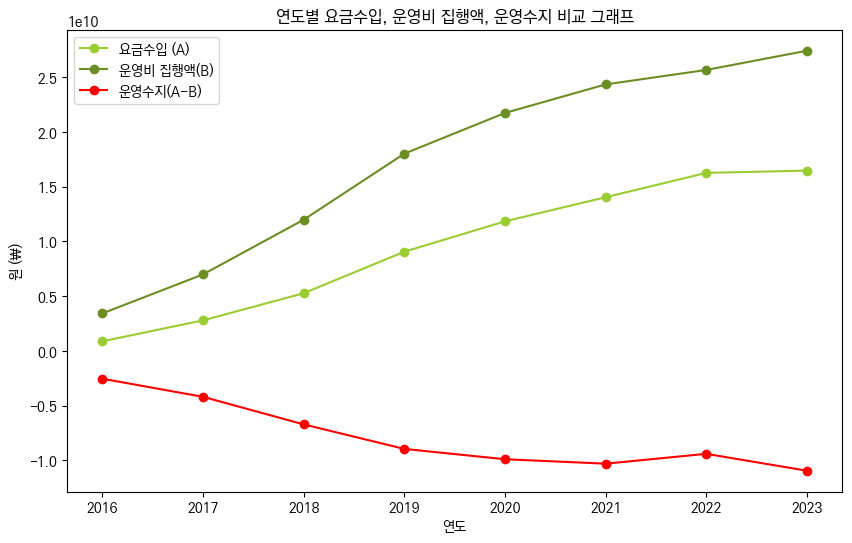

In [ ]:
# 연도별 요금수입, 운영비 집행액, 운영수지 비교 그래프

minus_df.rename(columns= {'년도': '연도'}, inplace=True)
# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(minus_df['연도'], minus_df['요금수입(A)'], marker='o', label='요금수입 (A)', color = 'yellowgreen')
plt.plot(minus_df['연도'], minus_df['운영비 집행액(B)'], marker='o', label='운영비 집행액(B)', color = 'olivedrab')
plt.plot(minus_df['연도'], minus_df['운영수지(A-B)'], marker='o', label='운영수지(A-B)', color = 'red')
plt.title('연도별 요금수입, 운영비 집행액, 운영수지 비교 그래프')
plt.xlabel('연도')
plt.ylabel('원 (₩)')
plt.legend()
plt.show()

#### 요금수입도 상승하고 있으나, 동시에 운영비 집행액이 더 큰 폭으로 상승하며 운영수지는 매년 마이너스를 기록하고 있다.

결론적으로, 따릉이는 요금 수입이 지속적으로 증가하고 있으나 운영비 진행액도 큰 폭으로 증가하여 운영 수지는 해가 갈수록 높은 적자를 보이고 있다. 2023년 기준 적자 100억을 넘기는 모습도 보이고 있다.

### 따릉이 노동자 1인당 관리 자전거 수

In [ ]:
#1인당 관리 자전거 수
management_df = pd.read_csv('따릉이 운영인력.csv', encoding='cp949')
management_df.head()

연도  자전거 대수  관리 인력 수  1인당 관리 자전거 수
0  2016    5698       71            80
1  2017   11600      106           109
2  2018   20000      143           140
3  2019   29500      185           159
4  2020   37500      185           203

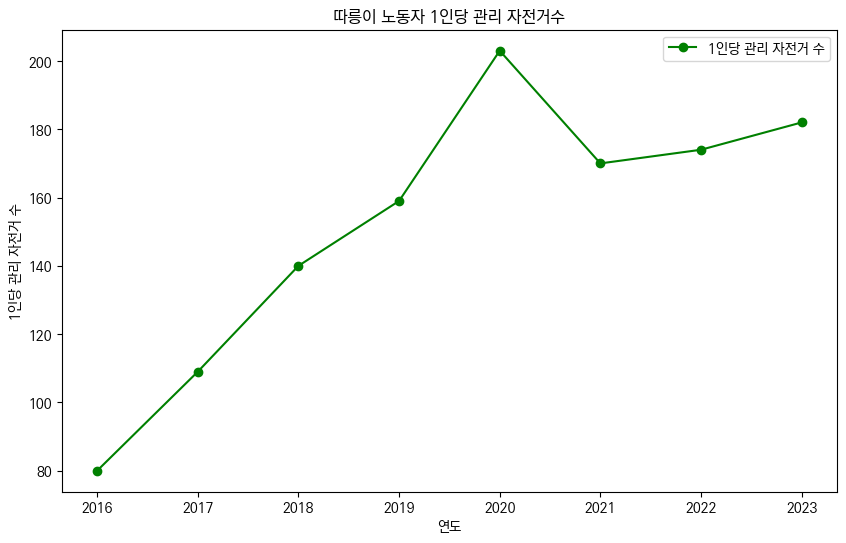

In [ ]:
# 따릉이 노동자 1인당 관리 자전거 수
plt.figure(figsize=(10, 6))
plt.plot(management_df['연도'], management_df['1인당 관리 자전거 수'], marker='o', label='1인당 관리 자전거 수', color='green')
plt.title('따릉이 노동자 1인당 관리 자전거수')
plt.xlabel('연도')
plt.ylabel('1인당 관리 자전거 수')
plt.legend()
plt.show()

매년 따릉이의 수가 늘어나는 것 대비 노동자 인력 충원은 그 속도를 따라잡지 못하고 있는 상황이다. 이로인해 2016년 1인당 따릉이 관리 대수가 80대에서 2023년 1인당 180대로 크게 증가한 것을 그래프를 통해 알 수 있다. 관리대수가 늘어남에 따라 따릉이의 퀄리티 저하 및 근무자 1인당 노동량의 증가를 야기하거나 인력 충원이 필요한 상황이라 추측하였다.

### 따릉이 회전율
    회전율 : 일평균 사용량 / 따릉이 전체 대수

In [ ]:
# 년도별 따릉이 운영대수.csv
count_rent_df = pd.read_csv("따릉이 운영대수.csv", encoding='cp949')
count_rent_df.head(20)

년도  따릉이_대수  일평균_사용량       회전율
0  2015     440     1093  2.484091
1  2016    5600     4403  0.786250
2  2017   20000    13784  0.689200
3  2018   25000    27566  1.102640
4  2019   29500    52260  1.771525
5  2020   37500    64768  1.727147
6  2021   40500    87817  2.168321
7  2022   43500   112189  2.579057
8  2023   45000   123028  2.733956
9  2024   45000   109645  2.436556

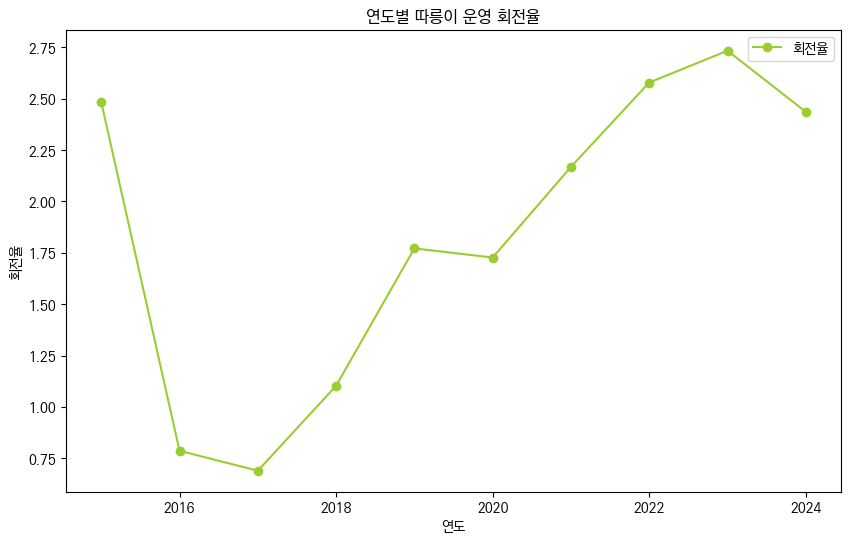

In [ ]:
# 연도별 따릉이 운영 회전율
plt.figure(figsize=(10, 6))
plt.plot(count_rent_df['년도'], count_rent_df['회전율'], marker='o', label='회전율', c= 'yellowgreen')
plt.title('연도별 따릉이 운영 회전율')
plt.xlabel('연도')
plt.ylabel('회전율')
plt.legend()
plt.show()

회전율은 1을 기준으로 1보다 높으면 자전거 대수만큼 사용량이 충분한 것으로 보고, 1보다 낮으면 사용량보다 보유량이 많은 것이므로 유지, 관리 비용이 추가적으로 발생한다.

2022년 이후 약 2.5의 높은 회전율을 보이고 있다.
자전거 사용량이 많음을 뜻하고, 이는 유지 관리 비용의 증가를 일으킬 수 있으며 동시에 운영비 증가 부담으로 이어질 수 있다.

####  결론적으로 적자 발생
현재 따릉이는 요금 수입 대비 운영비용의 증가로 인하여 적자 발생하고 있음을 알 수 있다. 이를 전체 운영 수지를 통해서와 노동자 1인당 관리하는 따릉이 대수, 전체 따릉이 수량의 회전율을 통해서 살펴보았다.

### 타 공공 이동수단 물가상승률 확인

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/코드잇부트캠프/프로젝트/초급 프로젝트/data/품목별_소비자물가지수_품목성질별_2020100__20250317104841.xlsx')

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df.head(10)

시도별         품목별     2015     2016     2017     2018     2019  2020    2021  \
0  전국         총지수   94.861   95.783   97.645   99.086   99.466   100  102.50   
1  전국       농축수산물   83.947   87.169   91.957   95.328   93.733   100  108.73   
2  전국  　　　(농산물)곡물   85.351     78.3   75.708   92.281  101.166   100  109.15   
3  전국     　　　　　　쌀   84.913   76.155   72.025   91.531   99.209   100  109.40   
4  전국    　　　　　　현미   86.384   82.929   77.622   89.188  103.994   100  107.66   
5  전국    　　　　　　찹쌀   86.732   82.972   77.484   90.147  104.652   100  107.00   
6  전국   　　　　　　보리쌀  104.507  105.427  107.395  111.139  109.306   100   99.76   
7  전국     　　　　　　콩   76.602    70.25   90.166  104.443   114.33   100  116.67   
8  전국    　　　　　　땅콩     88.8    89.31   88.016   87.997   94.228   100  105.15   
9  전국   　　　　　　혼식곡   97.706   90.929   86.955   93.364  100.858   100  105.74   

     2022    2023    2024  
0  107.72  111.59  114.18  
1  112.82  116.28  123.10  
2   98.86   99.34  102.63  
3   97.08   98.71  100.33  
4  103.11   97.55  103.87  
5   98.92   94.11  101.79  
6  106.03  115.09  132.27  
7  104.30   99.29  104.53  
8  106.21  109.63  117.41  
9  104.41  106.76  109.86

In [ ]:
# 이상한 공백/문자 지우기

df['품목별'] = df['품목별'].str.replace(r'\s+', '', regex=True)

In [ ]:
row_list = ['도시철도료', '시내버스료', '택시료']

tran_df = df[df['품목별'].isin(row_list)]
tran_df

시도별    품목별    2015    2016    2017    2018    2019  2020    2021    2022  \
345  전국  도시철도료  92.653  98.156   99.67     100     100   100  100.00  100.00   
346  전국  시내버스료  89.846  94.282  95.156  94.939   96.14   100  100.62  100.27   
348  전국    택시료  85.499  85.499  85.867  86.624  97.396   100  100.05  100.93   

       2023    2024  
345  102.26  111.78  
346  104.35  112.33  
348  114.04  121.89

In [ ]:
tran_df = tran_df.drop('시도별', axis = 1)

In [ ]:
new_df = tran_df.transpose()

In [ ]:
new_df.columns = ['도시철도료', '시내버스료', '택시료']

In [ ]:
new_df

도시철도료   시내버스료     택시료
품목별    도시철도료   시내버스료     택시료
2015  92.653  89.846  85.499
2016  98.156  94.282  85.499
2017   99.67  95.156  85.867
2018     100  94.939  86.624
2019     100   96.14  97.396
2020     100     100     100
2021   100.0  100.62  100.05
2022   100.0  100.27  100.93
2023  102.26  104.35  114.04
2024  111.78  112.33  121.89

In [ ]:
new_df = new_df.drop('품목별', axis = 0)

In [ ]:
new_df['따릉이'] = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

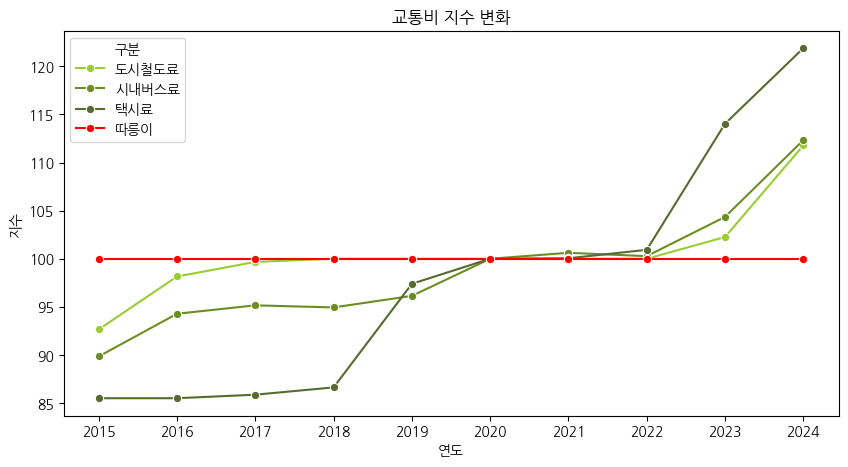

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 변환 (연도를 컬럼에서 인덱스로)
df_reset = new_df.reset_index().melt(id_vars='index', var_name='구분', value_name='지수')

# 그래프 그리기
plt.figure(figsize=(10,5))
sns.lineplot(data=df_reset, x='index', y='지수', hue='구분', marker='o', palette=['yellowgreen', 'olivedrab', 'darkolivegreen', 'red'])


# 스타일 설정
plt.xlabel('연도')
plt.ylabel('지수')
plt.title('교통비 지수 변화')
plt.legend(title='구분')

plt.show()

### 도시별 공공자전거 대수 비교

In [ ]:
city_bike_df = pd.DataFrame({
    '따릉이': [9597372, 45000], # 2024년
    '뉴욕 씨티바이크': [8258035, 33000], # 뉴욕은 2023년 자료
    '런던 산탄데르사이클': [9748000, 12000] # 2024년
})

In [ ]:
city_bike_df

따릉이  뉴욕 씨티바이크  런던 산탄데르사이클
0  9597372   8258035     9748000
1    45000     33000       12000

In [ ]:
city_bike_df_1 = city_bike_df.transpose()

In [ ]:
city_bike_df_1.columns = ['인구수', '자전거대수']

In [ ]:
city_bike_df_1

인구수  자전거대수
따릉이         9597372  45000
뉴욕 씨티바이크    8258035  33000
런던 산탄데르사이클  9748000  12000

In [ ]:
city_bike_df_1['자전거대비 사람'] = city_bike_df_1['인구수']/city_bike_df_1['자전거대수']

In [ ]:
city_bike_df_1

인구수  자전거대수     인구대비 대수    자전거대비 사람
따릉이         9597372  45000  213.274933  213.274933
뉴욕 씨티바이크    8258035  33000  250.243485  250.243485
런던 산탄데르사이클  9748000  12000  812.333333  812.333333

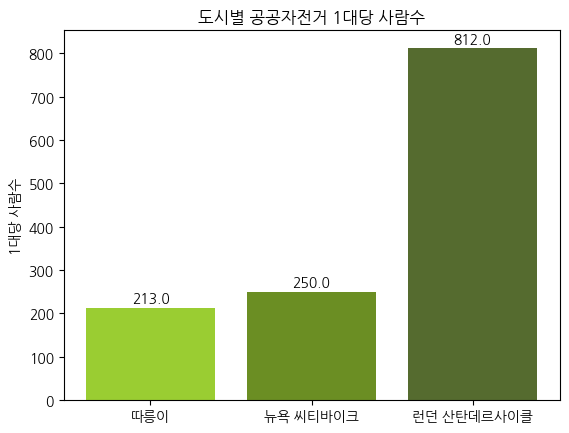

In [ ]:
plt.bar(x = city_bike_df_1.index, height = city_bike_df_1['자전거대비 사람'], color = ['yellowgreen', 'olivedrab','darkolivegreen'])

for i, value in enumerate(city_bike_df_1['자전거대비 사람'].round(0)):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')  # va는 value 위치 조정

# 그래프 제목과 라벨 설정
plt.title('도시별 공공자전거 1대당 사람수')
plt.ylabel('1대당 사람수')

# 그래프 표시
plt.show()

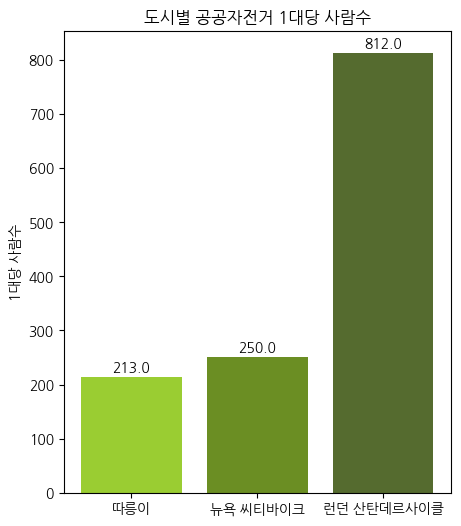

In [ ]:
plt.figure(figsize=(5,6))
plt.bar(x = city_bike_df_1.index, height = city_bike_df_1['자전거대비 사람'], color = ['yellowgreen', 'olivedrab','darkolivegreen'])

for i, value in enumerate(city_bike_df_1['자전거대비 사람'].round(0)):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')  # va는 value 위치 조정

# 그래프 제목과 라벨 설정
plt.title('도시별 공공자전거 1대당 사람수')
plt.ylabel('1대당 사람수')

# 그래프 표시
plt.show()

### 따릉이 누적대수 및 운영비 비교

In [ ]:
tax_df = pd.read_excel('/content/drive/MyDrive/코드잇부트캠프/프로젝트/초급 프로젝트/data/따릉이세입세출예산.xlsx', index_col = 0)

In [ ]:
tax_df

누적대수        이용실적  \
2024년 1월                                              45000         NaN   
2023년                                                 45000  44905313.0   
2022년                                                 43500  40948900.0   
2021년                                                 40500  32053367.0   
2020년                                                 37500  23705176.0   
2019년                                                 29500  19074794.0   
2018년                                                 25000  10061684.0   
2017년                                                 20000   5031039.0   
2016년                                                  5600   1611631.0   
NaN                                                     NaN         NaN   
NaN                                                     NaN         NaN   
NaN                                                     NaN         NaN   
NaN       https://news.mt.co.kr/mtview.php?no=2024013009...         NaN   

                  요금수입           운영비  
2024년 1월  1.718900e+10  3.237800e+10  
2023년     1.646700e+10  2.741600e+10  
2022년     1.625500e+10  2.566100e+10  
2021년     1.403400e+10  2.433900e+10  
2020년     1.183000e+10  2.173000e+10  
2019년     9.057000e+09  1.801300e+10  
2018년     5.262000e+09  1.197900e+10  
2017년     2.786000e+09  6.985000e+09  
2016년     8.750000e+08  3.421000e+09  
NaN                NaN           NaN  
NaN                NaN           NaN  
NaN                NaN           NaN  
NaN                NaN           NaN

In [ ]:
tax_df = tax_df.dropna(how='any') # 하나라도 NaN 제거
tax_df

누적대수        이용실적          요금수입           운영비
2023년  45000  44905313.0  1.646700e+10  2.741600e+10
2022년  43500  40948900.0  1.625500e+10  2.566100e+10
2021년  40500  32053367.0  1.403400e+10  2.433900e+10
2020년  37500  23705176.0  1.183000e+10  2.173000e+10
2019년  29500  19074794.0  9.057000e+09  1.801300e+10
2018년  25000  10061684.0  5.262000e+09  1.197900e+10
2017년  20000   5031039.0  2.786000e+09  6.985000e+09
2016년   5600   1611631.0  8.750000e+08  3.421000e+09

In [ ]:
tax_df_1 = tax_df.iloc[::-1]  # 인덱스 순서를 뒤집기
tax_df_1

누적대수        이용실적          요금수입           운영비
2016년   5600   1611631.0  8.750000e+08  3.421000e+09
2017년  20000   5031039.0  2.786000e+09  6.985000e+09
2018년  25000  10061684.0  5.262000e+09  1.197900e+10
2019년  29500  19074794.0  9.057000e+09  1.801300e+10
2020년  37500  23705176.0  1.183000e+10  2.173000e+10
2021년  40500  32053367.0  1.403400e+10  2.433900e+10
2022년  43500  40948900.0  1.625500e+10  2.566100e+10
2023년  45000  44905313.0  1.646700e+10  2.741600e+10

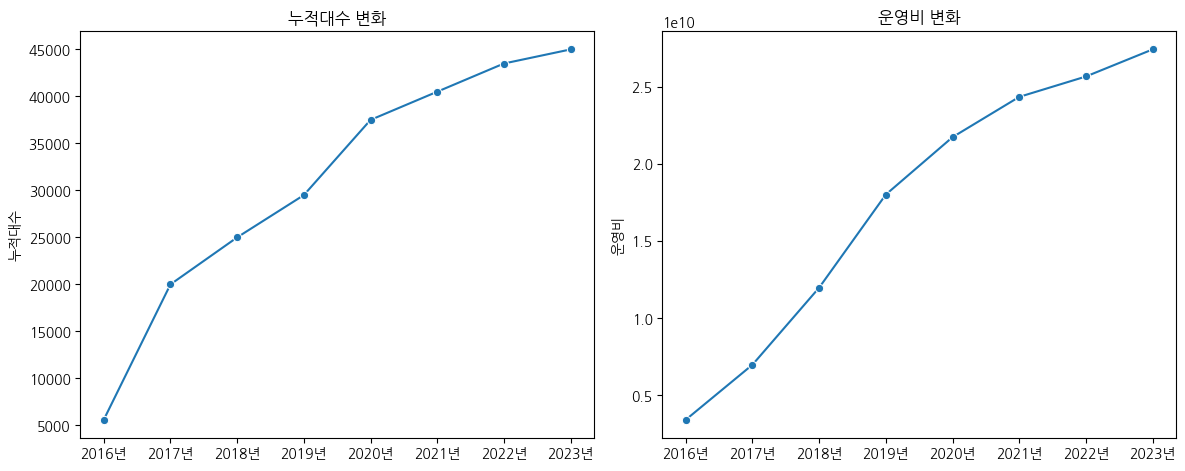

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1행 2열 서브플롯 생성


# 첫 번째 그래프: 누적대수
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='누적대수', marker='o', ax=axes[0])
axes[0].set_title('누적대수 변화')
axes[0].set_xlabel('')


# 두 번째 그래프: 운영비
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='운영비', marker='o', ax=axes[1])
axes[1].set_title('운영비 변화')
axes[0].set_xlabel('')

plt.tight_layout()  # 그래프 간격 조정
plt.xlabel('')
plt.show()

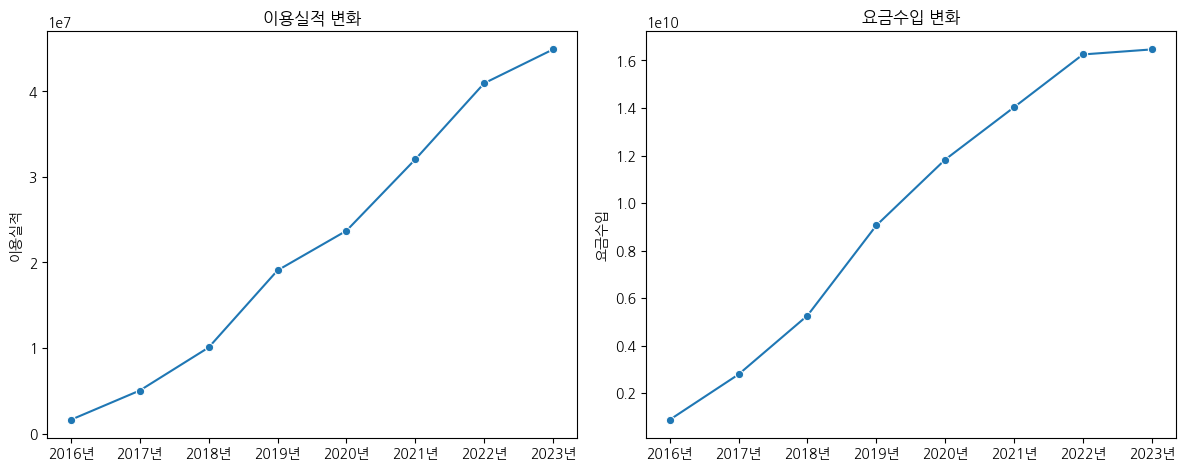

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1행 2열 서브플롯 생성

# 첫 번째 그래프: 누적대수
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='이용실적', marker='o', ax=axes[0])
axes[0].set_title('이용실적 변화')
axes[0].set_xlabel('')

# 두 번째 그래프: 운영비
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='요금수입', marker='o', ax=axes[1])
axes[1].set_title('요금수입 변화')
axes[0].set_xlabel('')

plt.tight_layout()  # 그래프 간격 조정
plt.xlabel('')
plt.show()

# 이용패턴과 가격체계

## 데이터 확인

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지
sns.set_theme(font = 'Malgun Gothic',style='white')
plt.rc('font', family='Malgun Gothic')

In [ ]:
dtype_dic = {
    '대여소번호' : 'str',
    '대여시간' : 'str'
}

df = pd.read_csv("C:/Users/USER/OneDrive/바탕 화면/고이/codeit/3. 초급 프로젝트/data/\
서울특별시 공공자전거 이용정보(시간대별)_2024.csv", dtype = dtype_dic, encoding = 'cp949')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28073653 entries, 0 to 28073652
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    object 
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   이동거리(M)  float64
 9   이용시간(분)  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ GB


In [ ]:
df.shape

(28073653, 10)

In [ ]:
df.head(30)

대여일자 대여시간  대여소번호                           대여소명 대여구분코드 성별 연령대코드  \
0   2024-01-01    0  02608                     2608. 송파구청    정기권  F  ~10대   
1   2024-01-01    0  04515                   4515. 동문굿모닝탑    정기권  F  ~10대   
2   2024-01-01    0  00703               703. 오목교역 7번출구 앞    정기권  F  ~10대   
3   2024-01-01    0  01426           1426. 면목도시개발아파트 1동 앞    정기권  F  ~10대   
4   2024-01-01    0  01153        1153. 발산역 1번, 9번 인근 대여소    정기권  F   20대   
5   2024-01-01    0  01153        1153. 발산역 1번, 9번 인근 대여소    정기권  F   20대   
6   2024-01-01    0  01251                 1251. 석촌역 2번출구    정기권  F   20대   
7   2024-01-01    0  01447                 1447. 면목역 3번출구    정기권  F   20대   
8   2024-01-01    0  00513           513. 뚝섬역 5번 출구 정류소 옆    정기권  F   20대   
9   2024-01-01    0  01643               1643. 태릉입구역 8번출구    정기권  F   20대   
10  2024-01-01    0  01656             1656. 중앙하이츠 아파트 입구    정기권  F   20대   
11  2024-01-01    0  01337                   1337. 돈암성당 옆    정기권  F   20대   
12  2024-01-01    0  01984                     1984. 구로구청    정기권  F   20대   
13  2024-01-01    0  00329                329. 청계2가 사거리 옆    정기권  F   20대   
14  2024-01-01    0  01737                     1737. 신창시장    정기권  F   20대   
15  2024-01-01    0  00339                  339. 종로4가 사거리    정기권  F   20대   
16  2024-01-01    0  02000  2000. 신도림4차 e편한세상 아파트 1109동 앞    정기권  F   20대   
17  2024-01-01    0  00361               361. 동묘앞역 1번출구 뒤    정기권  F   20대   
18  2024-01-01    0  00361               361. 동묘앞역 1번출구 뒤    정기권  F   20대   
19  2024-01-01    0  00441                     441.염천교사거리    정기권  F   20대   
20  2024-01-01    0  03421                  3421.혜화역 1번출구    정기권  F   20대   
21  2024-01-01    0  02656           2656.풍납동 아이파크 107동 앞    정기권  F   20대   
22  2024-01-01    0  00779               779. 신정1동 주민센터 앞    정기권  F   20대   
23  2024-01-01    0  02733               2733.마곡13단지 정문 앞    정기권  F   20대   
24  2024-01-01    0  01774               1774.정의여중고 버스정류소    정기권  F   20대   
25  2024-01-01    0  01381                1381.석계역 4번출구 뒤    정기권  F   20대   
26  2024-01-01    0  00540           540. 군자역 7번출구 베스트샵 앞    정기권  F   20대   
27  2024-01-01    0  04509                4509. 서울영상고교 입구    정기권  F   20대   
28  2024-01-01    0  04041                  4041. 공릉역3번출구    정기권  F   20대   
29  2024-01-01    0  04220                  4220. 신촌 청년주택    정기권  F   20대   

    이용건수  이동거리(M)  이용시간(분)  
0      1  3406.28       23  
1      1  4110.00       20  
2      3  3662.23       32  
3      1   384.66        4  
4      1  1024.90        7  
5      1  2433.93       16  
6      1  1380.00       19  
7      1  5766.42       35  
8      1  1184.02        9  
9      1  2098.74       12  
10     1  1237.05        8  
11     1   514.30        3  
12     1  1150.75       97  
13     1  1721.11       21  
14     1  1270.00        7  
15     1  1448.35       11  
16     1  1474.81       13  
17     1   957.26        8  
18     1  1631.62       10  
19     1  2907.29       22  
20     1   380.00        3  
21     1  1201.04       11  
22     1   913.13        5  
23     1  1230.00        7  
24     1  2048.97       11  
25     1  1540.00       12  
26     1   642.13        3  
27     1  1833.15       14  
28     1  2670.10       18  
29     1   846.36        7

In [ ]:
df.describe().round(0)

이용건수     이동거리(M)     이용시간(분)
count  28073653.0  28073653.0  28073653.0
mean          1.0      2664.0        23.0
std           0.0      3373.0        30.0
min           1.0         0.0         1.0
25%           1.0       900.0         6.0
50%           1.0      1569.0        12.0
75%           1.0      2976.0        28.0
max          39.0    371662.0     11436.0

기존가격을 이용한 수익(기존) 컬럼 추가

In [ ]:
rev_df = df.copy()

rev_df.describe().round(0)

이용건수     이동거리(M)     이용시간(분)
count  28073653.0  28073653.0  28073653.0
mean          1.0      2664.0        23.0
std           0.0      3373.0        30.0
min           1.0         0.0         1.0
25%           1.0       900.0         6.0
50%           1.0      1569.0        12.0
75%           1.0      2976.0        28.0
max          39.0    371662.0     11436.0

## 공공자전거 이용형태 분석

### 공공자전거 이용 유형별(정기권/일일권) 수익 분석(이상치 제거 전)

In [ ]:
# 일일권(비회원)을 일일권으로 통합

rev_df.loc[rev_df['대여구분코드'] == '일일권(비회원)', '대여구분코드'] = '일일권'

rev_df['대여구분코드'].unique()

array(['정기권', '일일권'], dtype=object)

In [ ]:
# 정기권인 경우와 아닌 경우에 따라 수익 계산
rev_df['수익(기존)'] = np.where(
    rev_df['대여구분코드'] == '정기권',  # '정기권'인 경우
    np.where(
        rev_df['이용시간(분)'] <= 60, 430,
        np.where(
            rev_df['이용시간(분)'] <= 120, 571,
            571 + np.ceil((rev_df['이용시간(분)'] - 120) / 5) * 200  # 120분 초과, 올림 처리
        )
    ),
    np.where(                                  # '정기권'이 아닌 경우
        rev_df['이용시간(분)'] <= 60, 1000,
        np.where(
            rev_df['이용시간(분)'] <= 120, 2000,
            2000 + np.ceil((rev_df['이용시간(분)'] - 120) / 5) * 200  # 120분 초과, 올림 처리
        )
    )
)

In [ ]:
rev_df.describe().round(1)

이용건수     이동거리(M)     이용시간(분)      수익(기존)
count  28073653.0  28073653.0  28073653.0  28073653.0
mean          1.1      2663.8        23.4       582.4
std           0.4      3372.7        29.7       545.3
min           1.0         0.1         1.0       430.0
25%           1.0       900.0         6.0       430.0
50%           1.0      1569.2        12.0       430.0
75%           1.0      2976.4        28.0       430.0
max          39.0    371662.1     11436.0    453371.0

In [ ]:
rev_df[rev_df['대여구분코드'] == '일일권']

대여일자 대여시간  대여소번호                대여소명 대여구분코드 성별 연령대코드  이용건수  \
394       2024-01-01    0  01155       1155. 기쁜우리복지관    일일권  F  ~10대     1   
395       2024-01-01    0  01163     1163. 방화동강서기동대앞    일일권  F  ~10대     1   
396       2024-01-01    0  01662       1662. 노원역7번출구    일일권  F  ~10대     1   
397       2024-01-01    0  02647  2647.잠실 자전거 수리센터 앞    일일권  F  ~10대     1   
398       2024-01-01    0  03211    3211.신길 래미안 프레비뉴    일일권  F  ~10대     1   
...              ...  ...    ...                 ...    ... ..   ...   ...   
28073400  2024-12-31   23  04629    4629. 한강초교보도육교 앞    일일권  M  ~10대     2   
28073401  2024-12-31   23  03517         3517. 용마사거리    일일권  M   20대     1   
28073402  2024-12-31   23  00379        379. 서울역9번출구    일일권  M   30대     1   
28073403  2024-12-31   23  06059         6059. 덕수중학교    일일권  M   30대     1   
28073404  2024-12-31   23  02703      2703.서울도시가스 앞     일일권  M    기타     1   

           이동거리(M)  이용시간(분)  수익(기존)  
394        1040.00        8  1000.0  
395        1113.62       11  1000.0  
396        4173.13       26  1000.0  
397         350.00       25  1000.0  
398         707.36        4  1000.0  
...            ...      ...     ...  
28073400  20842.48      271  8200.0  
28073401   6996.34       72  2000.0  
28073402   3740.00       70  2000.0  
28073403   3305.36       61  2000.0  
28073404    730.00       57  1000.0  

[4683591 rows x 11 columns]

In [ ]:
rev_df[rev_df['대여구분코드'] == '정기권']

대여일자 대여시간  대여소번호                     대여소명 대여구분코드 성별 연령대코드  \
0         2024-01-01    0  02608               2608. 송파구청    정기권  F  ~10대   
1         2024-01-01    0  04515             4515. 동문굿모닝탑    정기권  F  ~10대   
2         2024-01-01    0  00703         703. 오목교역 7번출구 앞    정기권  F  ~10대   
3         2024-01-01    0  01426     1426. 면목도시개발아파트 1동 앞    정기권  F  ~10대   
4         2024-01-01    0  01153  1153. 발산역 1번, 9번 인근 대여소    정기권  F   20대   
...              ...  ...    ...                      ...    ... ..   ...   
28073648  2024-12-31   23  02732        2732.마곡수명산 1-2단지     정기권  M    기타   
28073649  2024-12-31   23  02547         2547. 반포래미안 리오센트    정기권  M    기타   
28073650  2024-12-31   23  00240          240. 문래역 4번출구 앞    정기권  M    기타   
28073651  2024-12-31   23  05773         5773. 송파시그니처롯데캐슬    정기권  M    기타   
28073652  2024-12-31   23  01911         1911. 구로디지털단지역 앞    정기권  M    기타   

          이용건수  이동거리(M)  이용시간(분)  수익(기존)  
0            1  3406.28       23   430.0  
1            1  4110.00       20   430.0  
2            3  3662.23       32   430.0  
3            1   384.66        4   430.0  
4            1  1024.90        7   430.0  
...        ...      ...      ...     ...  
28073648     1  2242.45      166  2571.0  
28073649     1  4528.32       68   571.0  
28073650     1   710.00        9   430.0  
28073651     1  1544.25       18   430.0  
28073652     1   634.55        5   430.0  

[23390062 rows x 11 columns]

In [ ]:
# 그룹 1: 대여구분코드에 따른 수익의 총합 계산
group_1 = rev_df.groupby('대여구분코드')['수익(기존)'].sum()

# 그룹 2: 대여구분코드에 따른 수익의 비율 계산
total_sum = rev_df['수익(기존)'].sum()  # 전체 수익 합계를 구합니다.
group_2 = (rev_df.groupby('대여구분코드')['수익(기존)'].sum() * 100) / total_sum  # 각 그룹 수익 합계를 전체 합으로 나눔

# DataFrame으로 합치기
df_result = pd.DataFrame({
    '수익 총계': group_1,
    '수익 비율': group_2.round(2)
})

print(df_result)

               수익 총계  수익 비율
대여구분코드                     
일일권     5.677513e+09  34.72
정기권     1.067339e+10  65.28


In [ ]:
# 총계 행 추가하기
total_row = pd.DataFrame({
    '수익 총계': [df_result['수익 총계'].sum()],
    '수익 비율': [100.0]  # 비율은 전체 합이므로 100%로 설정
}, index=['총계'])

# 결과 DataFrame에 총계 추가
df_result_2 = pd.concat([df_result, total_row])

# 출력 결과 확인
print(df_result_2)

            수익 총계   수익 비율
일일권  5.677513e+09   34.72
정기권  1.067339e+10   65.28
총계   1.635091e+10  100.00


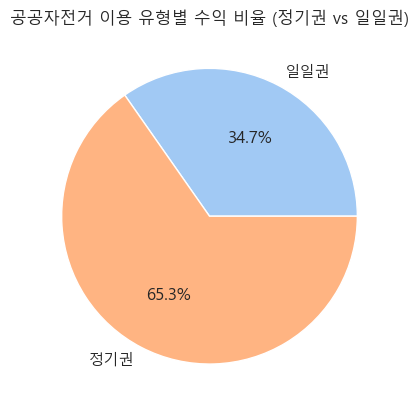

In [ ]:
colors = sns.color_palette("pastel",  len(df_result))

plt.pie(df_result['수익 비율'], labels=df_result.index, autopct='%.1f%%', colors = colors)

plt.title('공공자전거 이용 유형별 수익 비율 (정기권 vs 일일권)')
plt.show()

### 이상치 제거 - 이동거리(M) & 이용시간(M)

In [ ]:
q1 = df['이동거리(M)'].quantile(0.25)
q3 = df['이동거리(M)'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - iqr*1.5
upper_limit = q3 + iqr*1.5

print(lower_limit,upper_limit)

-2214.57 6090.950000000001


In [ ]:
# 이용시간은 최대 4시간까지 정상범위, 이동거리는 사분위수 기준으로 이상치 제거

four_hours_df = rev_df[(rev_df['이용시간(분)'] > 0) & (rev_df['이용시간(분)'] <= 240) & \
                (rev_df['이동거리(M)'] > 0) & (rev_df['이동거리(M)'] <= 6090.950000000001)]

In [ ]:
four_hours_df.describe().round(0)

이용건수       이동거리(M)       이용시간(분)        수익(기존)
count 25,418,688.00 25,418,688.00 25,418,688.00 25,418,688.00
mean           1.00      1,811.00         19.00        536.00
std            0.00      1,293.00         22.00        270.00
min            1.00          0.00          1.00        430.00
25%            1.00        850.00          6.00        430.00
50%            1.00      1,416.00         11.00        430.00
75%            1.00      2,408.00         22.00        430.00
max           13.00      6,091.00        240.00      6,800.00

In [ ]:
four_hours_df.shape

(25418688, 11)

### 공공자전거 대여시간별 이용량 분석

EDA

In [ ]:
print(four_hours_df['대여시간'].unique())
print(four_hours_df['대여시간'].dtype)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23']
object


In [ ]:
# 대여시간 카테고리화
four_hours_df['대여시간'] = pd.Categorical(
    four_hours_df['대여시간'], 
    categories=[str(i) for i in range(24)],  # 0~23까지 모든 시간 포함
    ordered=True
)

In [ ]:
four_hours_df.head(10)

대여일자 대여시간  대여소번호                     대여소명 대여구분코드 성별 연령대코드  이용건수  \
0  2024-01-01    0  02608               2608. 송파구청    정기권  F  ~10대     1   
1  2024-01-01    0  04515             4515. 동문굿모닝탑    정기권  F  ~10대     1   
2  2024-01-01    0  00703         703. 오목교역 7번출구 앞    정기권  F  ~10대     3   
3  2024-01-01    0  01426     1426. 면목도시개발아파트 1동 앞    정기권  F  ~10대     1   
4  2024-01-01    0  01153  1153. 발산역 1번, 9번 인근 대여소    정기권  F   20대     1   
5  2024-01-01    0  01153  1153. 발산역 1번, 9번 인근 대여소    정기권  F   20대     1   
6  2024-01-01    0  01251           1251. 석촌역 2번출구    정기권  F   20대     1   
7  2024-01-01    0  01447           1447. 면목역 3번출구    정기권  F   20대     1   
8  2024-01-01    0  00513     513. 뚝섬역 5번 출구 정류소 옆    정기권  F   20대     1   
9  2024-01-01    0  01643         1643. 태릉입구역 8번출구    정기권  F   20대     1   

   이동거리(M)  이용시간(분)  수익(기존)  
0 3,406.28       23  430.00  
1 4,110.00       20  430.00  
2 3,662.23       32  430.00  
3   384.66        4  430.00  
4 1,024.90        7  430.00  
5 2,433.93       16  430.00  
6 1,380.00       19  430.00  
7 5,766.42       35  430.00  
8 1,184.02        9  430.00  
9 2,098.74       12  430.00

In [ ]:
# 샘플 추출하기
f_sample_df = four_hours_df.sample(n=2000)

<Axes: xlabel='대여시간', ylabel='count'>

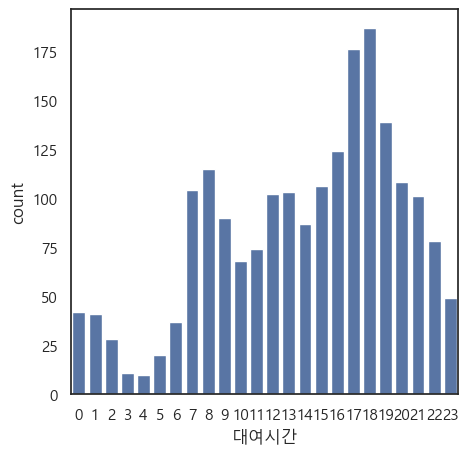

In [ ]:
sns.countplot(data = f_sample_df, x = '대여시간')

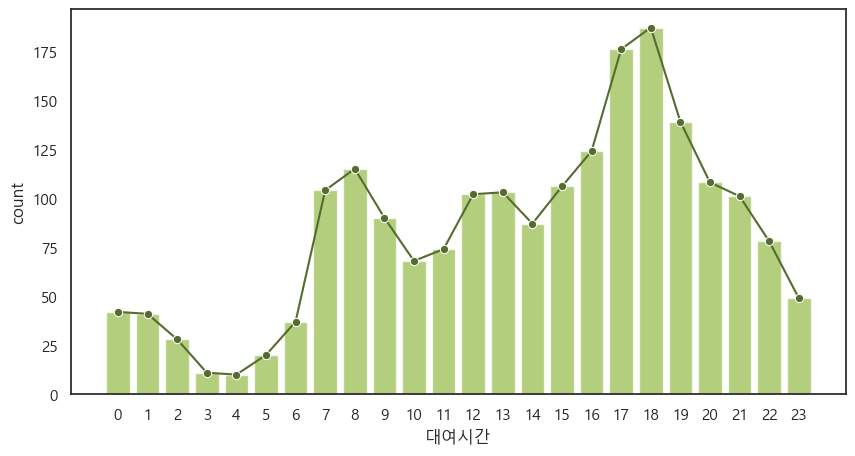

In [ ]:
# 데이터 개수 구하기 (countplot과 동일한 데이터)
count_data = f_sample_df['대여시간'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 5))

# countplot (막대 그래프)
sns.countplot(data=f_sample_df, x='대여시간', color='yellowgreen', alpha=0.7)

# lineplot (카운트 데이터를 선으로 표시)
sns.lineplot(x=count_data.index, y=count_data.values, marker='o', color='darkolivegreen')

plt.show()

### 공공자전거 이용 유형별(정기권/일일권) 비율 및 대여시간 분석

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

grouped = four_hours_df.groupby('대여구분코드')[['이동거리(M)', '이용시간(분)']].agg(['mean', 'size'])

grouped.loc['Total'] = grouped.sum()

grouped

이동거리(M)               이용시간(분)              
           mean          size    mean          size
대여구분코드                                             
일일권    2,154.65  3,844,969.00   21.88  3,844,969.00
정기권    1,749.78 21,573,719.00   17.91 21,573,719.00
Total  3,904.43 25,418,688.00   39.79 25,418,688.00

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

four_hours_df.groupby('대여구분코드')['이용시간(분)'].mean()


대여구분코드
일일권   21.88
정기권   17.91
Name: 이용시간(분), dtype: float64

In [ ]:
f_summary_df = four_hours_df.groupby('대여구분코드').size().reset_index(name='건수')

# 전체 건수 대비 비율(%) 추가
f_summary_df['비율(%)'] = round((f_summary_df['건수'] / f_summary_df['건수'].sum()) * 100, 2)

# 최종 결과 출력
f_summary_df

대여구분코드        건수  비율(%)
0    일일권   3844969  15.13
1    정기권  21573719  84.87

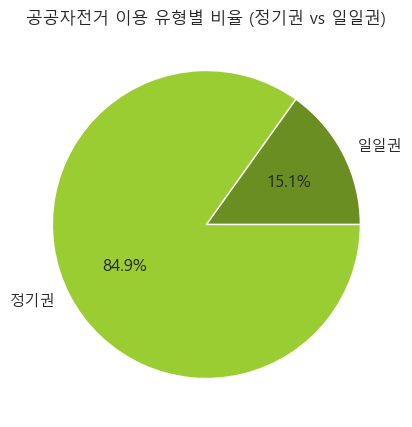

In [ ]:
plt.pie(f_summary_df['비율(%)'], labels=['일일권', '정기권'], autopct='%.1f%%', colors =['olivedrab', 'yellowgreen'])

plt.title('공공자전거 이용 유형별 비율 (정기권 vs 일일권)')
plt.show()

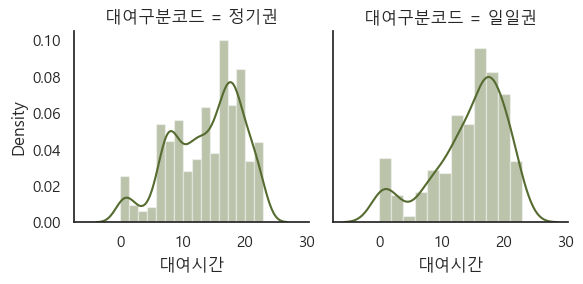

In [ ]:
sns.FacetGrid(f_sample_df,  col = '대여구분코드').map(sns.distplot, '대여시간',color='darkolivegreen')

plt.show()

### 공공자전거 이용시간/이동거리 분석

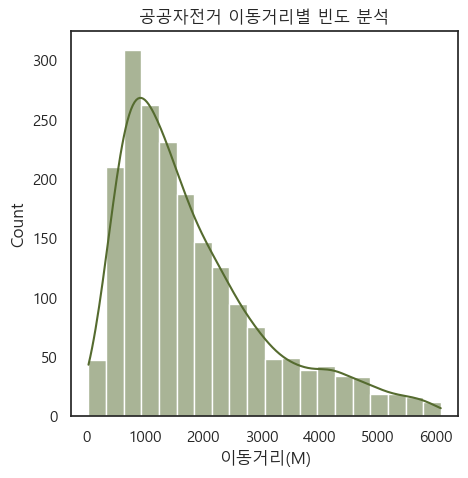

In [ ]:
sns.histplot(x='이동거리(M)', data = f_sample_df, kde =True,bins=20,color='darkolivegreen')

plt.title('공공자전거 이동거리별 빈도 분석')
plt.show()

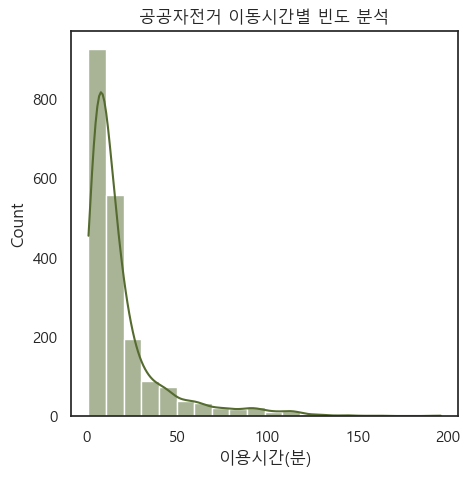

In [ ]:
sns.histplot(x='이용시간(분)', data = f_sample_df, kde =True,bins=20,color='darkolivegreen')

plt.title('공공자전거 이동시간별 빈도 분석')
plt.show()

In [ ]:
# 이용시간(분)을 구간으로 나누어서 새로운 컬럼 추가 (20분 단위)
f_sample_df['이용시간대'] = pd.cut(f_sample_df['이용시간(분)'], 
                                    bins=[0, 20, 40, 60, 80, 100, 120, 140, 240],
                                    labels=['20분 미만', '20~40분', '40~60분', '60~80분', '80~100분', '100~120분', '120~140분', '140분 이상'], 
                                    right=False)

In [ ]:
# 이용수 계산
group_1 = f_sample_df['이용시간대'].value_counts()

# 이용비율 계산
group_2 = (f_sample_df['이용시간대'].value_counts() * 100) / f_sample_df['이용시간대'].size

# DataFrame 생성
result = pd.DataFrame({
    '이용수': group_1,
    '이용비율': group_2.round(2)  # 소수점 2자리로 반올림
})

# 인덱스를 정렬하여 깔끔한 출력
result = result.sort_index()

# 결과 출력
result

이용수  이용비율
이용시간대               
20분 미만    1441 72.05
20~40분     345 17.25
40~60분     115  5.75
60~80분      42  2.10
80~100분     19  0.95
100~120분    26  1.30
120~140분     3  0.15
140분 이상      9  0.45

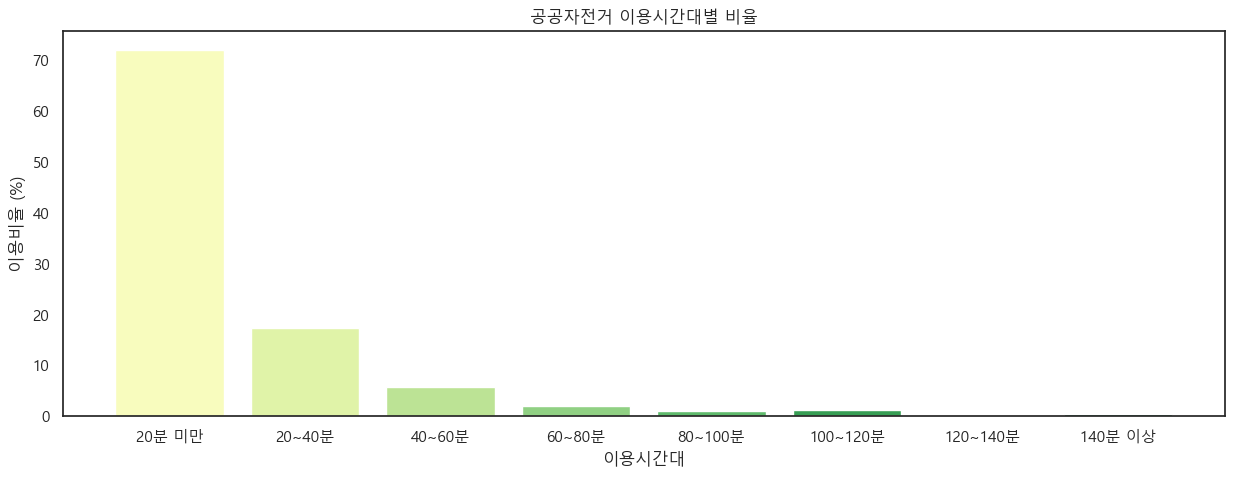

In [ ]:
colors = sns.color_palette("YlGn", len(result))

plt.figure(figsize=(15,5))

# 막대그래프를 그리기 위한 x, y 값이 제대로 전달되도록
plt.bar(x=result.index, height=result['이용비율'], color=colors)


plt.title('공공자전거 이용시간대별 비율')
plt.xlabel('이용시간대')
plt.ylabel('이용비율 (%)')

plt.show()

In [ ]:
# 이용시간(분)을 구간으로 나누어서 새로운 컬럼 추가 (10분 단위)
label_list = ['10분 미만', '10~20분', '20~30분', '30~40분', '40~50분', '50~60분', '60~70분', '70~80분','80~90분','90~100분','100~110분',\
              '110~120분','120~130분','130~140분','140분 이상']

f_sample_df['이용시간대_10분단위'] = pd.cut(f_sample_df['이용시간(분)'], 
                                    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 240],
                                    labels=label_list, 
                                    right=False)

In [ ]:
# 이용수 계산
group_1 = f_sample_df['이용시간대_10분단위'].value_counts()

# 이용비율 계산
group_2 = (f_sample_df['이용시간대_10분단위'].value_counts() * 100) / f_sample_df['이용시간대_10분단위'].size

# DataFrame 생성
result = pd.DataFrame({
    '이용수': group_1,
    '이용비율': group_2.round(2)  # 소수점 2자리로 반올림
})

# 인덱스를 정렬하여 깔끔한 출력
result = result.sort_index()

# 결과 출력
result

이용수  이용비율
이용시간대_10분단위           
10분 미만       871 43.55
10~20분       570 28.50
20~30분       224 11.20
30~40분       121  6.05
40~50분        64  3.20
50~60분        51  2.55
60~70분        18  0.90
70~80분        24  1.20
80~90분        11  0.55
90~100분        8  0.40
100~110분       9  0.45
110~120분      17  0.85
120~130분       2  0.10
130~140분       1  0.05
140분 이상        9  0.45

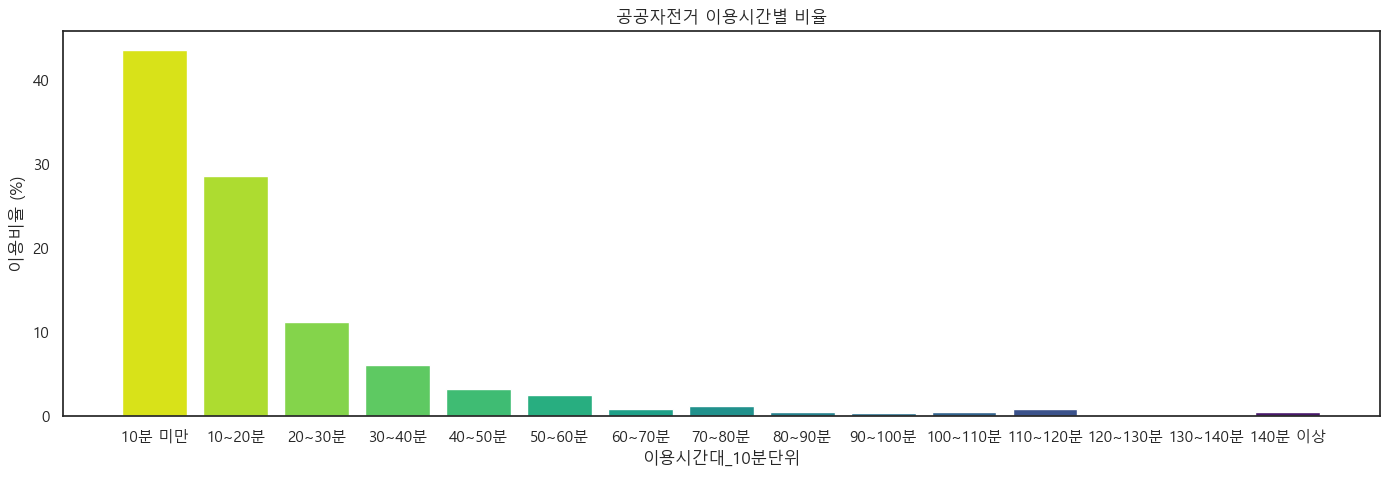

In [ ]:
colors = sns.color_palette("viridis", len(result))  
colors.reverse()  # 색상 순서 뒤집기

plt.figure(figsize=(17,5))

# 막대그래프를 그리기 위한 x, y 값이 제대로 전달되도록
plt.bar(x=result.index, height=result['이용비율'], color=colors)


plt.title('공공자전거 이용시간별 비율')
plt.xlabel('이용시간대_10분단위')
plt.ylabel('이용비율 (%)')

plt.show()

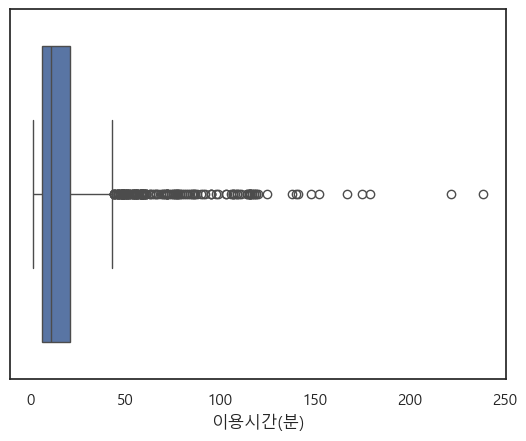

In [ ]:
sns.boxplot(data=f_sample_df, x='이용시간(분)')

plt.show()

#### 이용 유형별(정기권/일일권) 이용시간/이동거리 분석

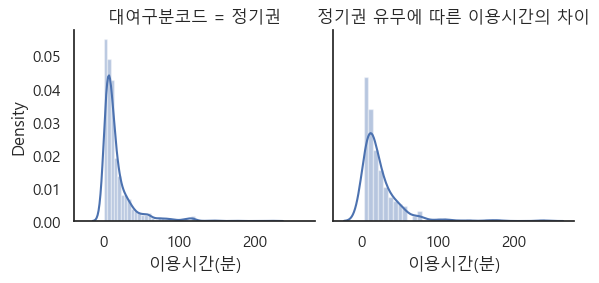

In [ ]:
sns.FacetGrid(f_sample_df,  col = '대여구분코드').map(sns.distplot, '이용시간(분)')

plt.title('정기권 유무에 따른 이용시간의 차이')
plt.show()

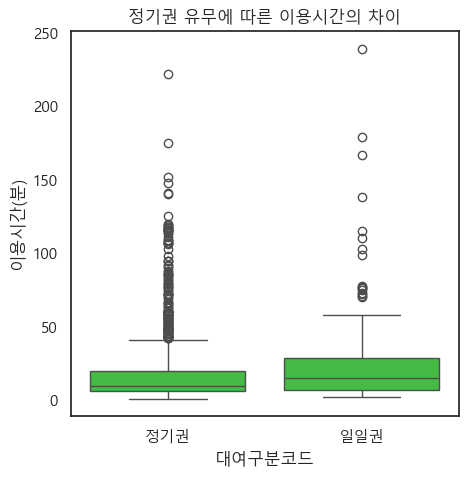

In [ ]:
sns.set(rc={'figure.figsize':(5,5)},font = 'Malgun Gothic',style='white')
sns.boxplot(data=f_sample_df, y='이용시간(분)', x='대여구분코드', color = "limegreen")

plt.title('정기권 유무에 따른 이용시간의 차이')
plt.show()

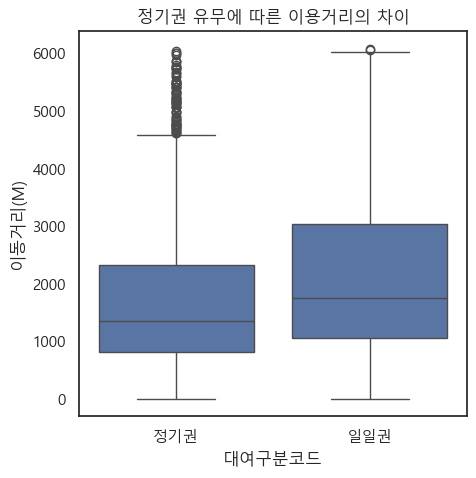

In [ ]:
sns.set(rc={'figure.figsize':(5,5)},font = 'Malgun Gothic',style='white')
sns.boxplot(data=f_sample_df, y='이동거리(M)', x='대여구분코드')

plt.title('정기권 유무에 따른 이용거리의 차이')
plt.show()

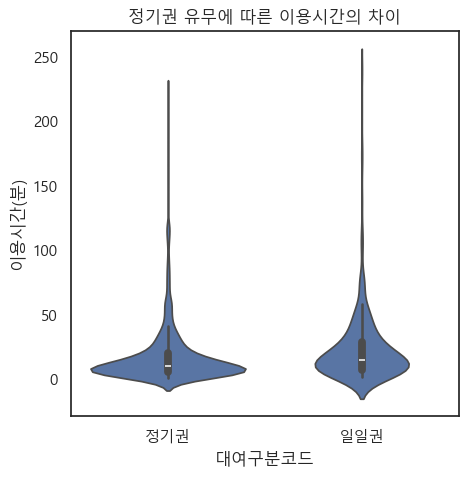

In [ ]:
sns.violinplot(data=f_sample_df, y='이용시간(분)', x='대여구분코드')

plt.title('정기권 유무에 따른 이용시간의 차이')
plt.show()

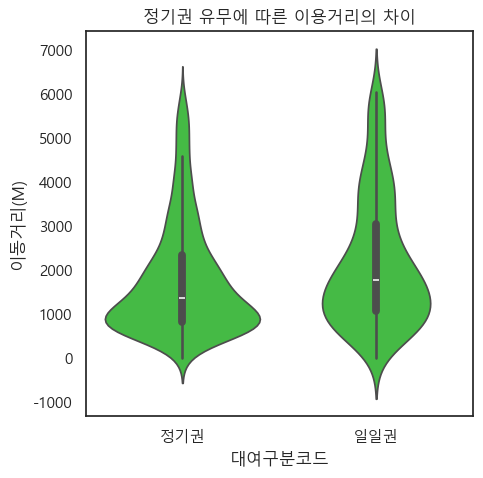

In [ ]:
sns.violinplot(data=f_sample_df, y='이동거리(M)', x='대여구분코드', color = "limegreen")

plt.title('정기권 유무에 따른 이용거리의 차이')
plt.show()

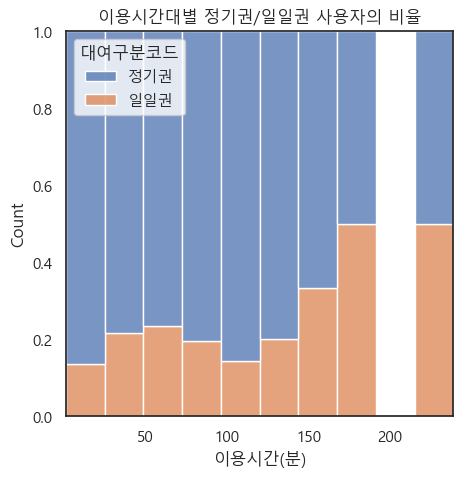

In [ ]:
sns.histplot(data=f_sample_df, x='이용시간(분)', hue='대여구분코드', multiple='fill', bins=10)

plt.title('이용시간대별 정기권/일일권 사용자의 비율')
plt.show()

### 정기권/일일권 사용자간의 이용시간 및 이용거리 검정(T-TEST)

정기권과 일일권 사용자의 이용시간 및 이용거리에 차이가 있는가(T-TEST)

In [ ]:
import scipy.stats as stats

In [ ]:
# 이동거리 평균 차이 분석

group_0 = f_sample_df[f_sample_df['대여구분코드'] == '정기권']['이동거리(M)']
group_1 = f_sample_df[f_sample_df['대여구분코드'] == '일일권']['이동거리(M)']

In [ ]:
#  F-검정 (Levene's Test)
stat, p_value = stats.levene(group_0, group_1)

print(f"Levene's test statistic: {stat}")
print(f"Levene's test p-value: {p_value}")

if p_value < 0.05:
    print("분산이 동일하지 않다고 할 수 있습니다. (이분산)")
else:
    print("분산이 동일하다고 할 수 있습니다. (등분산)")

Levene's test statistic: 10.601869473907547
Levene's test p-value: 0.0011486339150916182
분산이 동일하지 않다고 할 수 있습니다. (이분산)


In [ ]:
# t-검정 수행 (등분산/이분산에 따라 다르게 설정)

if p_value >= 0.05:  # 등분산 (분산이 동일할 경우)
    t_stat, t_p_value = stats.ttest_ind(group_0, group_1, equal_var=True)
else:  # 이분산 (분산이 동일하지 않으면)
    t_stat, t_p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {t_p_value}")

# p-value에 따라 해석
if t_p_value < 0.05:
    print("두 그룹 간에 평균 차이가 있습니다.")
else:
    print("두 그룹 간에 평균 차이가 없습니다.")

t-statistic: -4.516249708264122
p-value: 8.346780604188682e-06
두 그룹 간에 평균 차이가 있습니다.


In [ ]:
# 이용시간 평균 차이 분석

group_0 = f_sample_df[f_sample_df['대여구분코드'] == '정기권']['이용시간(분)']
group_1 = f_sample_df[f_sample_df['대여구분코드'] == '일일권']['이용시간(분)']

In [ ]:
#  F-검정 (Levene's Test)
stat, p_value = stats.levene(group_0, group_1)

print(f"Levene's test statistic: {stat}")
print(f"Levene's test p-value: {p_value}")

if p_value < 0.05:
    print("분산이 동일하지 않다고 할 수 있습니다. (이분산)")
else:
    print("분산이 동일하다고 할 수 있습니다. (등분산)")

Levene's test statistic: 7.90851090847231
Levene's test p-value: 0.004968342112623891
분산이 동일하지 않다고 할 수 있습니다. (이분산)


In [ ]:
# t-검정 수행 (등분산/이분산에 따라 다르게 설정)

if p_value >= 0.05:  # 등분산 (분산이 동일할 경우)
    t_stat, t_p_value = stats.ttest_ind(group_0, group_1, equal_var=True)
else:  # 이분산 (분산이 동일하지 않으면)
    t_stat, t_p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {t_p_value}")

# p-value에 따라 해석
if t_p_value < 0.05:
    print("두 그룹 간에 평균 차이가 있습니다.")
else:
    print("두 그룹 간에 평균 차이가 없습니다.")

t-statistic: -3.647812022258336
p-value: 0.0003016453025018051
두 그룹 간에 평균 차이가 있습니다.


### 공공자전거 이용 유형별(정기권/일일권) 수익 분석(이상치 제거 후)

이상치 제거 후 수익 다시 계산

In [ ]:
# 지수법 끄기
pd.set_option('display.float_format', '{:,.2f}'.format)

four_hours_df.groupby('대여구분코드')['수익(기존)'].agg(['mean', 'sum'])

mean              sum
대여구분코드                          
일일권    1,055.62 4,058,838,000.00
정기권      443.08 9,558,829,775.00

In [ ]:
four_hours_df.describe().round(0)

이용건수       이동거리(M)       이용시간(분)        수익(기존)
count 25,418,688.00 25,418,688.00 25,418,688.00 25,418,688.00
mean           1.00      1,811.00         19.00        536.00
std            0.00      1,293.00         22.00        270.00
min            1.00          0.00          1.00        430.00
25%            1.00        850.00          6.00        430.00
50%            1.00      1,416.00         11.00        430.00
75%            1.00      2,408.00         22.00        430.00
max           13.00      6,091.00        240.00      6,800.00

In [ ]:
# 그룹 1: 대여구분코드에 따른 수익의 총합 계산
group_1 = four_hours_df.groupby('대여구분코드')['수익(기존)'].sum()

# 그룹 2: 대여구분코드에 따른 수익의 비율 계산
total_sum = four_hours_df['수익(기존)'].sum()  # 전체 수익 합계를 구합니다.
group_2 = (four_hours_df.groupby('대여구분코드')['수익(기존)'].sum() * 100) / total_sum  # 각 그룹 수익 합계를 전체 합으로 나눕니다.

# DataFrame으로 합치기
df_result = pd.DataFrame({
    '수익 총계': group_1,
    '수익 비율': group_2.round(2)
})

# 출력 결과 확인
print(df_result)

                  수익 총계  수익 비율
대여구분코드                        
일일권    4,058,838,000.00  29.81
정기권    9,558,829,775.00  70.19


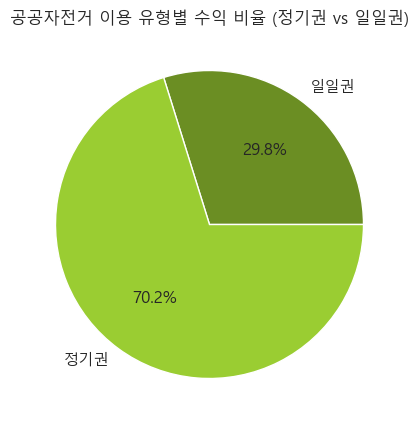

In [ ]:
plt.pie(df_result['수익 비율'], labels=['일일권', '정기권'], autopct='%.1f%%', colors =['olivedrab', 'yellowgreen'])

plt.title('공공자전거 이용 유형별 수익 비율 (정기권 vs 일일권)')
plt.show()

### 기존 수익 모델과 비교

In [ ]:
# 정기권인 경우와 아닌 경우에 따라 수익 계산, 정기권만 30분기준으로 변경, 일일권은 2시간권 삭제
four_hours_df['수익_30분단위과금'] = np.where(
    four_hours_df['대여구분코드'] == '정기권',  # '정기권'인 경우
    np.where(
        four_hours_df['이용시간(분)'] <= 30, 430,
            430 + np.ceil((four_hours_df['이용시간(분)'] - 30) / 5) * 200  # 30분 초과, 올림 처리
        ),
    np.where(
        four_hours_df['이용시간(분)'] <= 60, 1000,
            1000 + np.ceil((four_hours_df['이용시간(분)'] - 60) / 5) * 200  # 60분 초과, 올림 처리
        )
    )

In [ ]:
four_hours_df.head(5)

대여일자 대여시간  대여소번호                     대여소명 대여구분코드 성별 연령대코드  이용건수  \
0  2024-01-01    0  02608               2608. 송파구청    정기권  F  ~10대     1   
1  2024-01-01    0  04515             4515. 동문굿모닝탑    정기권  F  ~10대     1   
2  2024-01-01    0  00703         703. 오목교역 7번출구 앞    정기권  F  ~10대     3   
3  2024-01-01    0  01426     1426. 면목도시개발아파트 1동 앞    정기권  F  ~10대     1   
4  2024-01-01    0  01153  1153. 발산역 1번, 9번 인근 대여소    정기권  F   20대     1   

   이동거리(M)  이용시간(분)  수익(기존)  수익_30분단위과금  
0 3,406.28       23  430.00      430.00  
1 4,110.00       20  430.00      430.00  
2 3,662.23       32  430.00      630.00  
3   384.66        4  430.00      430.00  
4 1,024.90        7  430.00      430.00

In [ ]:
sum_1 = four_hours_df['수익(기존)'].sum()
sum_2 = four_hours_df['수익_30분단위과금'].sum()

print(sum_1, sum_2, sum_2 - sum_1)

13617667775.0 17397164570.0 3779496795.0


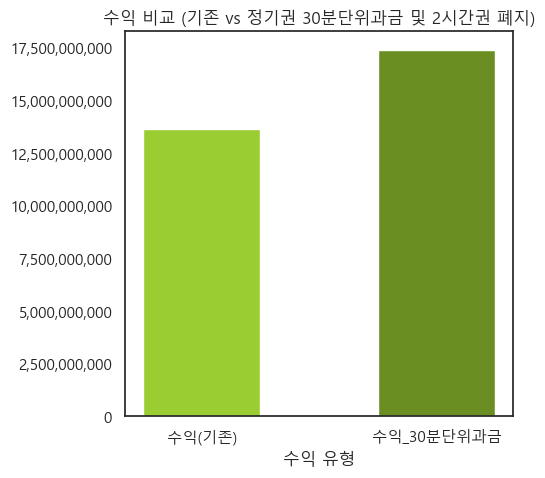

In [ ]:
# 데이터를 리스트로 저장
data = [sum_1, sum_2]
labels = ['수익(기존)', '수익_30분단위과금']


# 바 차트 그리기
plt.figure(figsize = (5,5))
plt.bar(labels, data, color =['yellowgreen', 'olivedrab'], width=0.5)


# Y축 값 포맷팅: 천 단위로 표시
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# 제목과 라벨 설정
plt.title('수익 비교 (기존 vs 정기권 30분단위과금 및 2시간권 폐지)')
plt.xlabel('수익 유형')

# 그래프 표시
plt.show()

(가격모델2) 일일권,정기권 모두 30분 단위 과금이었다면?, 2시간권이 없다면?

In [ ]:
# 정기권인 경우와 아닌 경우에 따라 수익 계산, 정기권만 30분기준으로 변경, 일일권은 2시간권 삭제
four_hours_df['수익_가격모델2'] = np.where(
    four_hours_df['대여구분코드'] == '정기권',  # '정기권'인 경우
    np.where(
        four_hours_df['이용시간(분)'] <= 30, 430,
            430 + np.ceil((four_hours_df['이용시간(분)'] - 30) / 5) * 200  # 30분 초과, 올림 처리
        ),
    np.where(
        four_hours_df['이용시간(분)'] <= 30, 1000,
            1000 + np.ceil((four_hours_df['이용시간(분)'] - 30) / 5) * 200  # 60분 초과, 올림 처리
        )
    )

In [ ]:
sum_3 = four_hours_df['수익_가격모델2'].sum()

print(sum_1, sum_2, sum_3)

13617667775.0 17397164570.0 18006260370.0


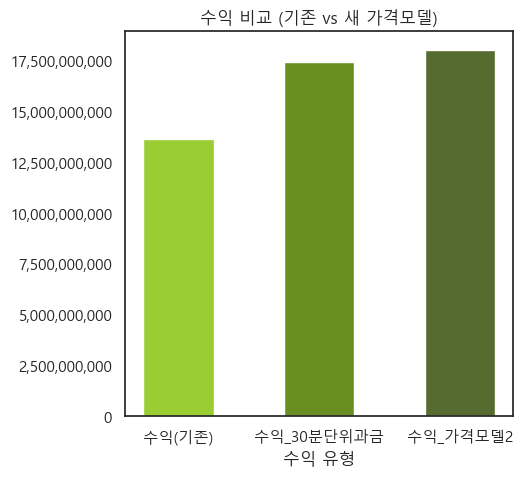

In [ ]:
# 데이터를 리스트로 저장
data = [sum_1, sum_2, sum_3]
labels = ['수익(기존)', '수익_30분단위과금','수익_가격모델2']


# 바 차트 그리기
plt.figure(figsize = (5,5))
plt.bar(labels, data, color =['yellowgreen', 'olivedrab','darkolivegreen'], width=0.5)


# Y축 값 포맷팅: 천 단위로 표시
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# 제목과 라벨 설정
plt.title('수익 비교 (기존 vs 새 가격모델)')
plt.xlabel('수익 유형')

# 그래프 표시
plt.show()

# 불균형한 반납/대여

## 데이터 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings
import folium
warnings.filterwarnings(action='ignore')

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

color_match = ['yellowgreen', 'olivedrab','darkolivegreen','darkgreen','seagreen', 'green']

In [ ]:
df_2024_대여이력 = pd.read_csv('C:\lsh\Codeit\스프린트 미션\초급 프로젝트\서울특별시 공공자전거 대여이력 정보_2024.csv', encoding='utf-8-sig')
df_2024_대여이력

대여일시  대여 대여소번호                   대여 대여소명  \
0         2024-01-01 00:03:13       540           군자역 7번출구 베스트샵 앞   
1         2024-01-01 00:03:02      3416                 동묘앞역 6번출구   
2         2024-01-01 00:06:16       226                샛강역 1번출구 앞   
3         2024-01-01 00:00:50      3912                   삼호아파트 앞   
4         2024-01-01 00:06:18       214                   금융감독원 앞   
...                       ...       ...                       ...   
27173314  2024-12-31 22:36:10      1662                   노원역7번출구   
27173315  2024-12-31 23:39:17       525                  한양대병원사거리   
27173316  2024-12-31 22:57:07       624               전농동 동아아파트 앞   
27173317  2024-12-31 23:33:26      4684  응암2동주민센터 버스정류장(영락중학교 방면)   
27173318  2024-12-31 23:14:10      4032                   불암주유소 앞   

                         반납일시  반납대여소번호        반납대여소명  이용시간(분)   이용거리(M)    생년  \
0         2024-01-01 00:06:33     3509      세종사이버대학교        3    642.13  2004   
1         2024-01-01 00:07:33      346        맥스타일 앞        4    791.08  1995   
2         2024-01-01 00:07:35      226    샛강역 1번출구 앞        1     20.00  1991   
3         2024-01-01 00:08:09     1941     오류동역 2번출구        7   1227.24  2006   
4         2024-01-01 00:08:13      213           KT앞        1    200.00  1994   
...                       ...      ...           ...      ...       ...   ...   
27173314  2025-01-01 01:21:04     4026    상계주공1단지아파트      164   1620.00  2006   
27173315  2025-01-01 01:29:37      525      한양대병원사거리      110  10229.51  2007   
27173316  2025-01-01 01:30:24      624   전농동 동아아파트 앞      153   1570.00  1971   
27173317  2025-01-01 01:33:52     4678   백련산로 녹번센트레빌      120   1061.11  1981   
27173318  2025-01-01 01:49:08     1656  중앙하이츠 아파트 입구      155   1563.69  1979   

         성별 이용자종류  대여대여소ID  반납대여소ID  
0         F   내국인   ST-253  ST-1194  
1         M   내국인  ST-1813   ST-162  
2         M   내국인    ST-72    ST-72  
3         F   내국인  ST-2855   ST-871  
4         M   내국인    ST-60    ST-59  
...      ..   ...      ...      ...  
27173314  M   내국인  ST-1279  ST-2716  
27173315  M   내국인   ST-241   ST-241  
27173316  F   내국인   ST-392   ST-392  
27173317  M   내국인  ST-3076  ST-2956  
27173318  F   내국인  ST-2719  ST-1124  

[27173319 rows x 13 columns]

In [ ]:
df_2024_대여이력.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27173319 entries, 0 to 27173318
Data columns (total 13 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   int64  
 5   반납대여소명    object 
 6   이용시간(분)   int64  
 7   이용거리(M)   float64
 8   생년        int64  
 9   성별        object 
 10  이용자종류     object 
 11  대여대여소ID   object 
 12  반납대여소ID   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.6+ GB


In [ ]:
df_2024_대여이력.isna().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간(분)     0
이용거리(M)     0
생년          0
성별          0
이용자종류       0
대여대여소ID     0
반납대여소ID     0
dtype: int64

In [ ]:
df_2024_대여이력.loc[df_2024_대여이력['성별'] == 'f', '성별'] = 'F'
df_2024_대여이력.loc[df_2024_대여이력['성별'] == 'm', '성별'] = 'M'

df_2024_대여이력['나이'] = 2024 - df_2024_대여이력['생년'].astype(int)
df_2024_대여이력 = df_2024_대여이력[(df_2024_대여이력['나이'] >= 13) & (df_2024_대여이력['나이'] <= 100)]
df_2024_대여이력['나이대'] = (df_2024_대여이력['나이'] // 10) * 10
df_2024_대여이력['나이대'] = df_2024_대여이력['나이대'].astype(str) + '대'

In [ ]:
df_대여소정보 = pd.read_csv('C:/lsh/Codeit/스프린트 미션/초급 프로젝트/공공자전거 대여소 정보(24.12월 기준).csv', encoding='cp949')
df_대여소정보['보관소(대여소)명'] = df_대여소정보['보관소(대여소)명'].str.strip()
df_대여소정보.head()

대여소번호    보관소(대여소)명  자치구                             상세주소         위도  \
0    301  경복궁역 7번출구 앞  종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞  37.575794   
1    302  경복궁역 4번출구 뒤  종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤  37.575947   
2    303  광화문역 1번출구 앞  종로구       서울특별시 종로구 세종대로 지하189 세종로공원  37.571770   
3    305       종로구청 옆  종로구               서울특별시 종로구 세종로 84-1  37.572559   
4    307    서울역사박물관 앞  종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞  37.570000   

           경도  설치년도        설치시기  LCD 거치대수  QR 거치대수 운영방식  
0  126.971451  2015  2015-10-07      20.0     20.0   QR  
1  126.974060  2015  2015-10-07      12.0     12.0   QR  
2  126.974663  2015  2015-10-07       8.0      8.0   QR  
3  126.978332  2015  2015-01-07      16.0     16.0   QR  
4  126.971100  2015  2015-10-07      11.0     11.0   QR

In [ ]:
# df_대여이력과 df_대여소정보 병합 (대여소 기준)
df_2024_대여이력 = df_2024_대여이력.merge(df_대여소정보[['대여소번호', '자치구', '상세주소', '위도', '경도']],
                           left_on='대여 대여소번호', right_on='대여소번호',
                           how='left')
df_2024_대여이력 = df_2024_대여이력.drop(['대여소번호', '이용자종류', '대여대여소ID', '반납대여소ID','생년'], axis=1)
df_2024_대여이력.head()

대여일시  대여 대여소번호          대여 대여소명                 반납일시  \
0  2024-01-01 00:03:13       540  군자역 7번출구 베스트샵 앞  2024-01-01 00:06:33   
1  2024-01-01 00:03:02      3416        동묘앞역 6번출구  2024-01-01 00:07:33   
2  2024-01-01 00:06:16       226       샛강역 1번출구 앞  2024-01-01 00:07:35   
3  2024-01-01 00:00:50      3912          삼호아파트 앞  2024-01-01 00:08:09   
4  2024-01-01 00:06:18       214          금융감독원 앞  2024-01-01 00:08:13   

   반납대여소번호      반납대여소명  이용시간(분)  이용거리(M) 성별  나이  나이대   자치구  \
0     3509    세종사이버대학교        3   642.13  F  20  20대   광진구   
1      346      맥스타일 앞        4   791.08  M  29  20대   종로구   
2      226  샛강역 1번출구 앞        1    20.00  M  33  30대  영등포구   
3     1941   오류동역 2번출구        7  1227.24  F  18  10대   구로구   
4      213         KT앞        1   200.00  M  30  30대  영등포구   

                                상세주소         위도          경도  
0  서울특별시 광진구 군자동 499 군자역 7번출구 베스트샵 앞  37.556030  127.078644  
1                서울특별시 종로구 창신동 397-6  37.571533  127.015617  
2             서울특별시 영등포구 의사당대로 지하166  37.517765  126.928413  
3                  서울 구로구 개봉동 204-20  37.493858  126.856468  
4                 서울특별시 영등포구 여의대로 38  37.523022  126.920837

In [ ]:
# 날짜별 평일/주말 구분
df_2024_대여이력['대여일시'] = pd.to_datetime(df_2024_대여이력['대여일시'])

# 요일 정보 추가 (월=0, 화=1, ..., 토=5, 일=6)
df_2024_대여이력['요일'] = df_2024_대여이력['대여일시'].dt.weekday
df_2024_대여이력['요일구분'] = df_2024_대여이력['요일'].apply(lambda x: '주말' if x >= 5 else '평일')

In [ ]:
df_2024_대여이력.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27118164 entries, 0 to 27118163
Data columns (total 17 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  int64         
 2   대여 대여소명   object        
 3   반납일시      object        
 4   반납대여소번호   int64         
 5   반납대여소명    object        
 6   이용시간(분)   int64         
 7   이용거리(M)   float64       
 8   성별        object        
 9   나이        int64         
 10  나이대       object        
 11  자치구       object        
 12  상세주소      object        
 13  위도        float64       
 14  경도        float64       
 15  요일        int32         
 16  요일구분      object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(8)
memory usage: 3.3+ GB


## 대여소 현황 EDA

* 대여소 관련 전반적인 EDA를 수행하여 적자 원인을 탐색했다.

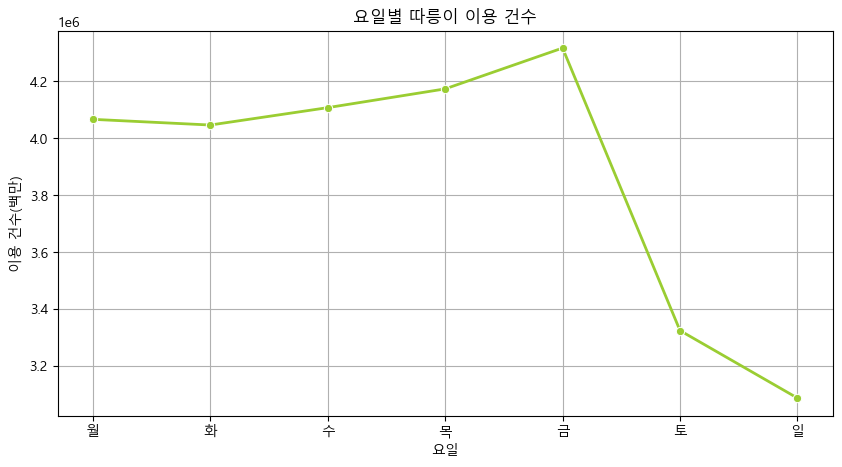

In [ ]:
# 평일/주말 이용 분석
요일_이름 = ['월', '화', '수', '목', '금', '토', '일']

요일별_이용건수 = df_2024_대여이력['요일'].value_counts().reset_index()
요일별_이용건수.columns = ['요일', '이용건수']
요일별_이용건수 = 요일별_이용건수.sort_values('요일')  # 요일 순서 정렬
요일별_이용건수['요일명'] = 요일별_이용건수['요일'].map(lambda x: 요일_이름[x])  # 숫자를 한글 요일로 매핑

# 라인 플롯 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(data=요일별_이용건수, x='요일명', y='이용건수', marker='o', linewidth=2, color=color_match[0])

plt.xlabel('요일')
plt.ylabel('이용 건수(백만)')
plt.title('요일별 따릉이 이용 건수')
plt.grid(True)
plt.show()

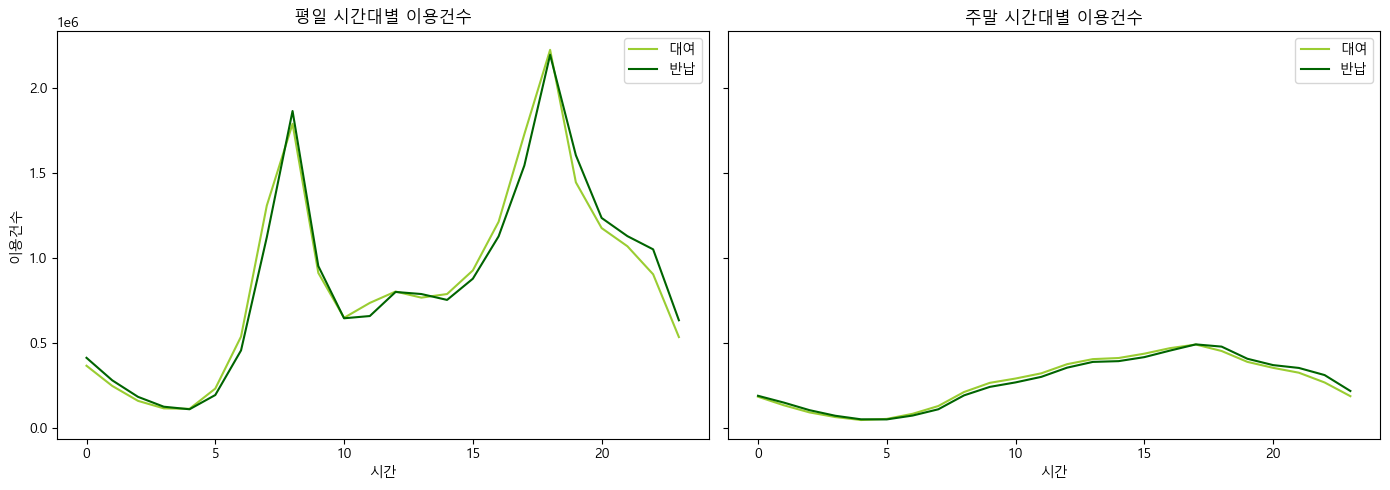

In [ ]:
# 날짜 컬럼을 datetime 변환
test1 = df_2024_대여이력.copy()

test1['대여시간'] = pd.to_datetime(test1['대여일시']).dt.hour
test1['반납시간'] = pd.to_datetime(test1['반납일시']).dt.hour

# 대여/반납 건수 집계 (요일구분 포함)
대여_시간별 = test1.groupby(['대여시간', '요일구분']).size().reset_index(name='대여건수')
반납_시간별 = test1.groupby(['반납시간', '요일구분']).size().reset_index(name='반납건수')

# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# 평일 라인플롯
sns.lineplot(data=대여_시간별[대여_시간별['요일구분'] == '평일'], x='대여시간', y='대여건수', label='대여', ax=axes[0], color=color_match[0])
sns.lineplot(data=반납_시간별[반납_시간별['요일구분'] == '평일'], x='반납시간', y='반납건수', label='반납', ax=axes[0], color=color_match[3])
axes[0].set_title('평일 시간대별 이용건수')
axes[0].set_xlabel('시간')
axes[0].set_ylabel('이용건수')
axes[0].legend()

# 주말 라인플롯
sns.lineplot(data=대여_시간별[대여_시간별['요일구분'] == '주말'], x='대여시간', y='대여건수', label='대여', ax=axes[1], color=color_match[0])
sns.lineplot(data=반납_시간별[반납_시간별['요일구분'] == '주말'], x='반납시간', y='반납건수', label='반납', ax=axes[1], color=color_match[3])
axes[1].set_title('주말 시간대별 이용건수')
axes[1].set_xlabel('시간')

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

- ```절대적인 이용량은 주말보다 평일 이용량이 많은 것으로 확인```
- ```평일 시간대별 이용건수를 보면 출근시간대에 많은 이용량을 보이다가 이후 오후까지 감소 및 상태를 유지하다가 퇴근시간대에 다시 많은 이용량을 보임```
- ```주말 시간대별 이용건수는 출퇴근에 영향을 받지 않다보니 특별한 변곡없이 오전부터 오후까지 점차 증가하다가 밤이 되면서 이용량이 감소하는 추제를 보임```

### 대여소별 대여/반납 횟수 확인

#### 대여/반납 횟수별 상위/하위 대여소 확인

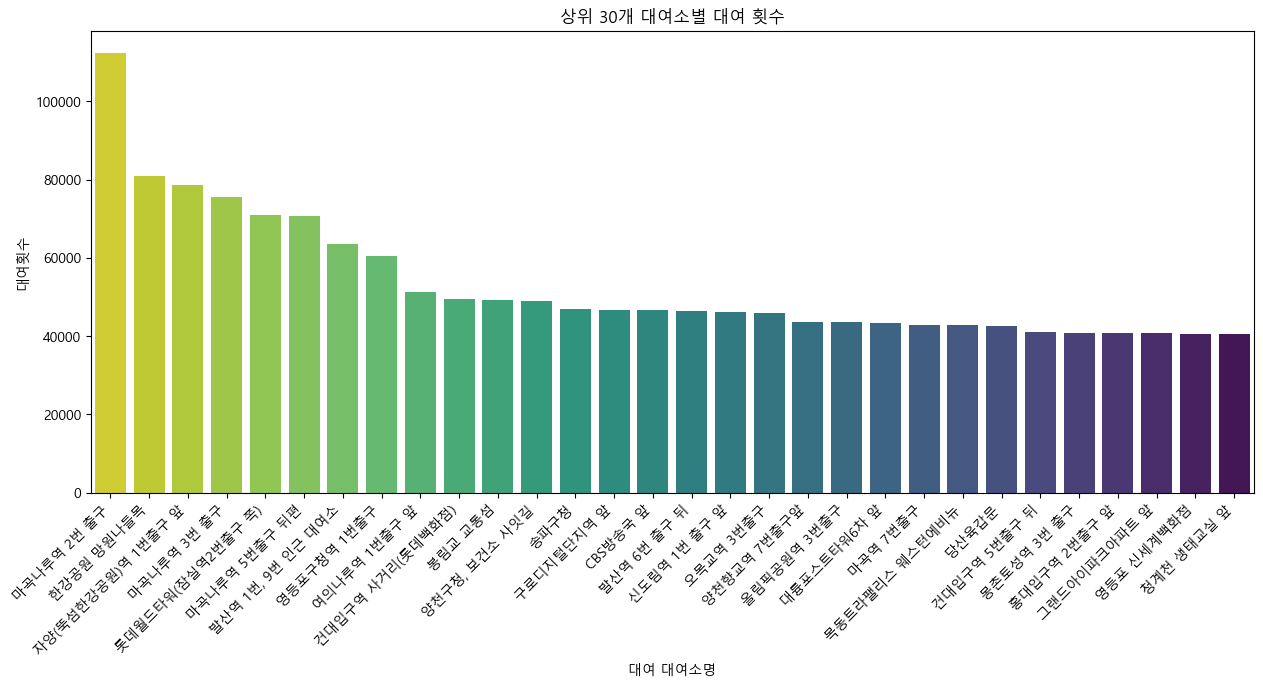

In [ ]:
df_대여횟수 = df_2024_대여이력.groupby('대여 대여소명').size().reset_index(name='대여횟수')
top30대여_df = df_대여횟수.nlargest(30, '대여횟수')

# 그래프 그리기
plt.figure(figsize=(15, 6))
sns.barplot(data=top30대여_df, x='대여 대여소명', y='대여횟수', palette='viridis_r')

# x축 레이블 회전 (너무 길 경우)
plt.xticks(rotation=45, ha='right')

plt.title('상위 30개 대여소별 대여 횟수')
plt.xlabel('대여 대여소명')
plt.ylabel('대여횟수')

plt.show()

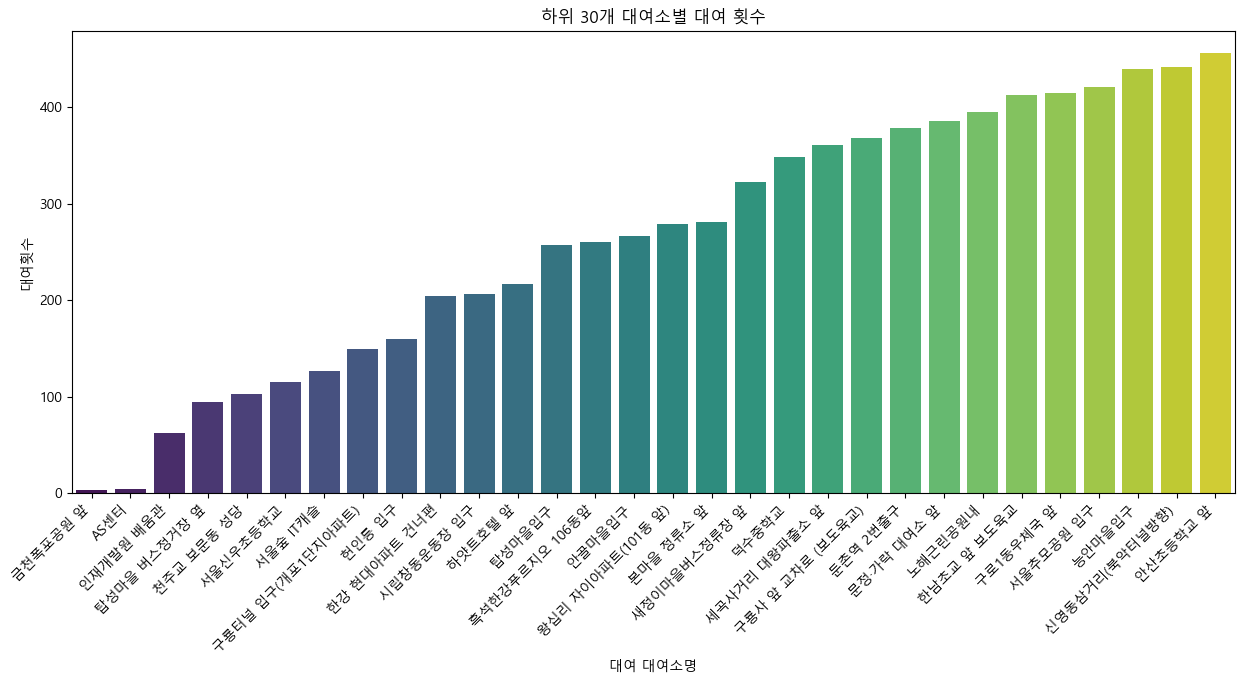

In [ ]:
df_대여횟수 = df_2024_대여이력.groupby('대여 대여소명').size().reset_index(name='대여횟수')
bottom30대여_df = df_대여횟수.nsmallest(30, '대여횟수')

# 그래프 그리기
plt.figure(figsize=(15, 6))
sns.barplot(data=bottom30대여_df, x='대여 대여소명', y='대여횟수', palette='viridis')

# x축 레이블 회전 (너무 길 경우)
plt.xticks(rotation=45, ha='right')

plt.title('하위 30개 대여소별 대여 횟수')
plt.xlabel('대여 대여소명')
plt.ylabel('대여횟수')

plt.show()

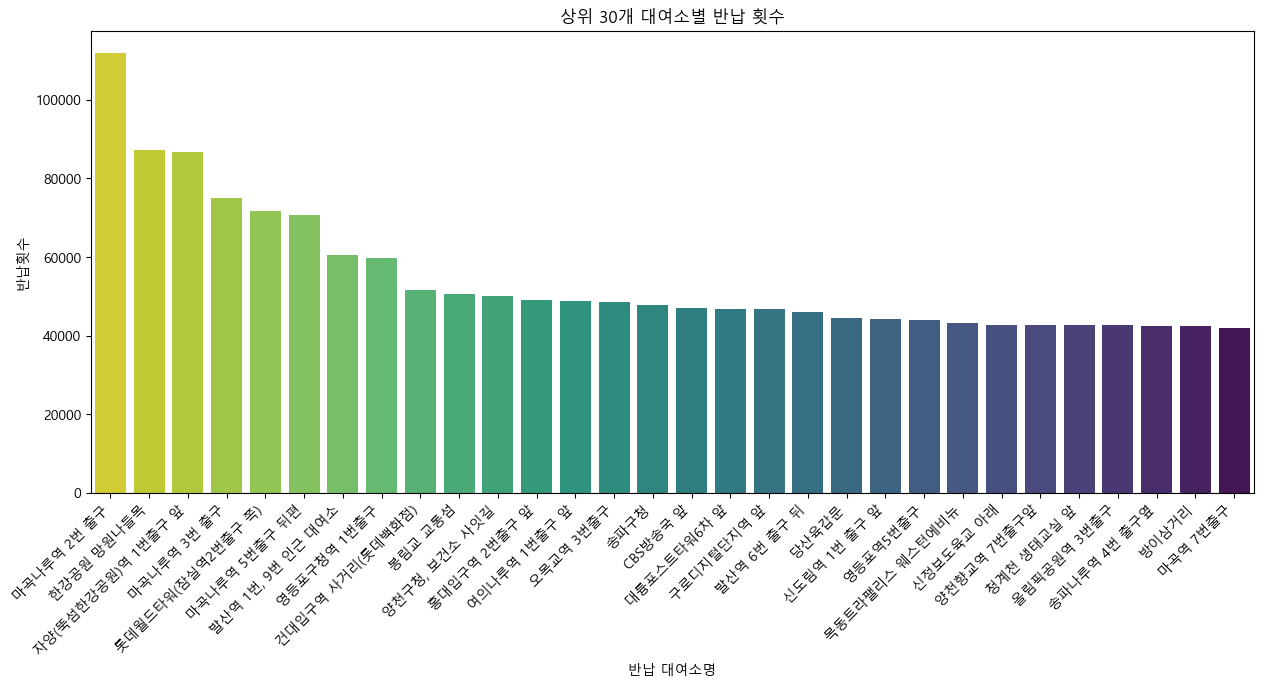

In [ ]:
df_반납횟수 = df_2024_대여이력.groupby('반납대여소명').size().reset_index(name='반납횟수')
top30반납_df = df_반납횟수.nlargest(30, '반납횟수')

# 그래프 그리기
plt.figure(figsize=(15, 6))
sns.barplot(data=top30반납_df, x='반납대여소명', y='반납횟수', palette='viridis_r')

# x축 레이블 회전 (너무 길 경우)
plt.xticks(rotation=45, ha='right')

plt.title('상위 30개 대여소별 반납 횟수')
plt.xlabel('반납 대여소명')
plt.ylabel('반납횟수')

plt.show()

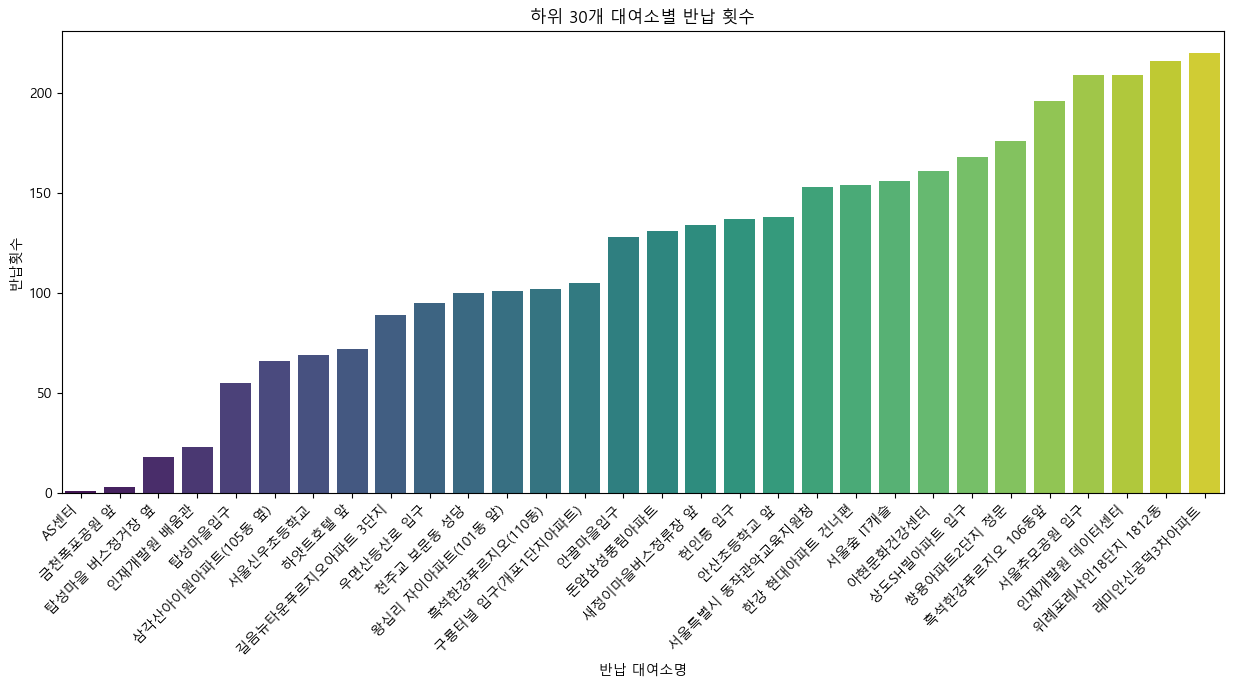

In [ ]:
df_반납횟수 = df_2024_대여이력.groupby('반납대여소명').size().reset_index(name='반납횟수')
bottom30반납_df = df_반납횟수.nsmallest(30, '반납횟수')

# 그래프 그리기
plt.figure(figsize=(15, 6))
sns.barplot(data=bottom30반납_df, x='반납대여소명', y='반납횟수', palette='viridis')

# x축 레이블 회전 (너무 길 경우)
plt.xticks(rotation=45, ha='right')

plt.title('하위 30개 대여소별 반납 횟수')
plt.xlabel('반납 대여소명')
plt.ylabel('반납횟수')

plt.show()

- ```당연한 얘기지만 대여량이 많은 대여소는 반납량도 그만큼 비례하는 것을 확인```

#### 대여/반납 횟수를 통해 초과 대여/반납 대여소 확인

In [ ]:
df_대여소별_대여횟수 = df_2024_대여이력.groupby('대여 대여소명').size().reset_index(name='대여횟수')
df_대여소별_반납횟수 = df_2024_대여이력.groupby('반납대여소명').size().reset_index(name='반납횟수')
대여반납횟수_df = pd.merge(df_대여소별_대여횟수, df_대여소별_반납횟수,
                          left_on='대여 대여소명', right_on='반납대여소명',
                          how='outer')
대여반납횟수_df

대여 대여소명     대여횟수          반납대여소명   반납횟수
0        (시립)고덕평생학습관   7666.0     (시립)고덕평생학습관   7306
1       (재)FITI시험연구원  14704.0    (재)FITI시험연구원  13440
2      3호선 매봉역 3번출구앞  14653.0   3호선 매봉역 3번출구앞  15646
3      419민주묘지 입구사거리   3788.0   419민주묘지 입구사거리   3898
4           419민주묘지역   4711.0        419민주묘지역   4737
...              ...      ...             ...    ...
2773         희훈타워빌 앞  14845.0         희훈타워빌 앞  14315
2774      힐스테이트 신도림역  10462.0      힐스테이트 신도림역   9703
2775         힐스테이트에코  25754.0         힐스테이트에코  25377
2776  힐스테이트창경궁 아파트 앞   8094.0  힐스테이트창경궁 아파트 앞   8273
2777    힐스테이트클래시안아파트   9259.0    힐스테이트클래시안아파트   9108

[2778 rows x 4 columns]

In [ ]:
정비이력df = 대여반납횟수_df[대여반납횟수_df['대여횟수'].isna()==True]['반납대여소명']
정비이력df

149        강남순회정비
233     개화센터\r\\n
1287         상담센터
1311         상암센터
1962         영남배송
1963    영남센터\r\\n
2209    이수센터\r\\n
2380         중랑센터
2437         천왕센터
2753        훈련원센터
Name: 반납대여소명, dtype: object

- 정비이력 데이터가 포함되어있는 것을 확인

In [ ]:
df_2024_대여이력[df_2024_대여이력['반납대여소명']=='강남순회정비']

대여일시  대여 대여소번호    대여 대여소명                 반납일시  \
26429864  2024-12-13 13:26:25       425  DMC첨단산업센터  2024-12-13 13:44:56   

          반납대여소번호  반납대여소명  이용시간(분)  이용거리(M) 성별  나이  나이대  자치구  \
26429864     9994  강남순회정비       18  2505.76  M  46  40대  마포구   

                      상세주소         위도          경도  
26429864  서울특별시 마포구 성암로330  37.584503  126.885597

In [ ]:
# 대여이력 데이터에 정비이력 데이터 제외
정비이력df = 대여반납횟수_df[대여반납횟수_df['대여횟수'].isna()]['반납대여소명'].tolist()
df_2024_대여이력 = df_2024_대여이력[~df_2024_대여이력['반납대여소명'].isin(정비이력df)]

In [ ]:
# 반납횟수에서 대여횟수를 빼서 초과 대여인 경우 (-), 초과 반납인 경우 (+)가 나오도록함. 직관성 높임.
대여반납횟수_df['대여횟수'] = 대여반납횟수_df['대여횟수'].fillna(0).astype(int)
대여반납횟수_df['대여/반납 차이'] =  대여반납횟수_df['반납횟수'] - 대여반납횟수_df['대여횟수']

대여반납횟수_df = 대여반납횟수_df.rename(columns={'대여 대여소명': '대여소명'})
대여반납횟수_df = 대여반납횟수_df.drop(['반납대여소명'], axis=1)
대여반납횟수_df

대여소명   대여횟수   반납횟수  대여/반납 차이
0        (시립)고덕평생학습관   7666   7306      -360
1       (재)FITI시험연구원  14704  13440     -1264
2      3호선 매봉역 3번출구앞  14653  15646       993
3      419민주묘지 입구사거리   3788   3898       110
4           419민주묘지역   4711   4737        26
...              ...    ...    ...       ...
2763         희훈타워빌 앞  14845  14315      -530
2764      힐스테이트 신도림역  10462   9703      -759
2765         힐스테이트에코  25754  25377      -377
2766  힐스테이트창경궁 아파트 앞   8094   8273       179
2767    힐스테이트클래시안아파트   9259   9108      -151

[2768 rows x 4 columns]

In [ ]:
초과대여_자치구_top10 = 대여반납횟수_df.nsmallest(10, '대여/반납 차이')
초과대여_자치구_top10 = 초과대여_자치구_top10.merge(df_대여소정보[['보관소(대여소)명','자치구']],
                                      left_on='대여소명', right_on='보관소(대여소)명',
                                      how='left')
초과대여_자치구_top10 = 초과대여_자치구_top10.drop('보관소(대여소)명', axis=1)
초과대여_자치구_top10

대여소명   대여횟수   반납횟수  대여/반납 차이         위도          경도  \
1317                상왕십리역 1번출구  18240  11033     -7207  37.564610  127.029198   
1761               신일해피트리아파트 앞   9318   2286     -7032  37.517059  126.848488   
1426              서울시립대 정문 앞 B  15603   9320     -6283  37.583698  127.053856   
2081  우장산역 1번출구옆(우장산아이파크105동앞)  16105  10004     -6101  37.548908  126.836563   
333                   광진광장 교통섬  29359  24070     -5289  37.547829  127.072632   
1677                   신길자이아파트   6657   1410     -5247  37.506012  126.915886   
2468                 청담공원앞 교차로   7614   2612     -5002  37.518711  127.050850   
1813                  아차산역4번출구  12169   7389     -4780  37.551849  127.088982   
76                LH강남힐스테이트아파트   6589   1885     -4704  37.470928  127.089706   
2011                  온곡초교 교차로  16116  11436     -4680  37.664188  127.066010   

                     보관소(대여소)명   자치구  
1317                상왕십리역 1번출구   성동구  
1761               신일해피트리아파트 앞   양천구  
1426              서울시립대 정문 앞 B  동대문구  
2081  우장산역 1번출구옆(우장산아이파크105동앞)   강서구  
333                   광진광장 교통섬   광진구  
1677                   신길자이아파트  영등포구  
2468                 청담공원앞 교차로   강남구  
1813                  아차산역4번출구   광진구  
76                LH강남힐스테이트아파트   강남구  
2011                  온곡초교 교차로   노원구

In [ ]:
초과반납_자치구_top10 = 대여반납횟수_df.nlargest(10, '대여/반납 차이')
초과반납_자치구_top10 = 초과반납_자치구_top10.merge(df_대여소정보[['보관소(대여소)명','자치구']],
                                      left_on='대여소명', right_on='보관소(대여소)명',
                                      how='left')
초과반납_자치구_top10 = 초과반납_자치구_top10.drop('보관소(대여소)명', axis=1)
초과반납_자치구_top10 = 초과반납_자치구_top10.fillna('광진구')
초과반납_자치구_top10

대여소명   대여횟수   반납횟수  대여/반납 차이         위도          경도  \
2186      응암역2번출구 국민은행 앞  27545  36110      8565  37.599968  126.915726   
2700        홍대입구역 2번출구 앞  40787  49161      8374  37.557438  126.923821   
2240  자양(뚝섬한강공원)역 1번출구 앞  78700  86623      7923        광진구         광진구   
2578          한강공원 망원나들목  80997  87263      6266  37.555576  126.896889   
65         LG사이언스파크 E14동  24778  30824      6046  37.563496  126.835831   
1976            영등포역5번출구  38120  44089      5969  37.516693  126.908073   
1831     암사역 3번출구(국민은행앞)  22894  27810      4916  37.549355  127.127083   
2278             장안동 사거리  34052  38924      4872  37.572174  127.071388   
70           LG유플러스 마곡사옥  33272  38141      4869  37.561337    126.8339   
877               마곡문화공원  29393  33814      4421  37.561211  126.830345   

            보관소(대여소)명   자치구  
2186   응암역2번출구 국민은행 앞   은평구  
2700     홍대입구역 2번출구 앞   마포구  
2240              광진구   광진구  
2578       한강공원 망원나들목   마포구  
65      LG사이언스파크 E14동   강서구  
1976         영등포역5번출구  영등포구  
1831  암사역 3번출구(국민은행앞)   강동구  
2278          장안동 사거리  동대문구  
70        LG유플러스 마곡사옥   강서구  
877            마곡문화공원   강서구

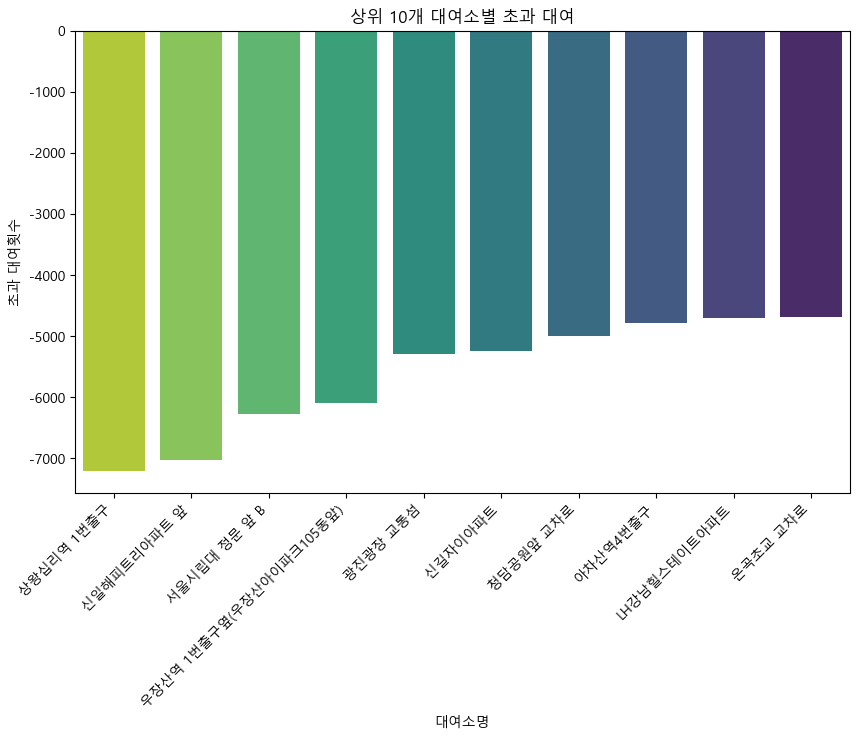

In [ ]:
top10_차이 = 대여반납횟수_df.nsmallest(10, '대여/반납 차이')

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_차이, x='대여소명', y='대여/반납 차이', palette='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('상위 10개 대여소별 초과 대여')
plt.xlabel('대여소명')
plt.ylabel('초과 대여횟수')
plt.show()

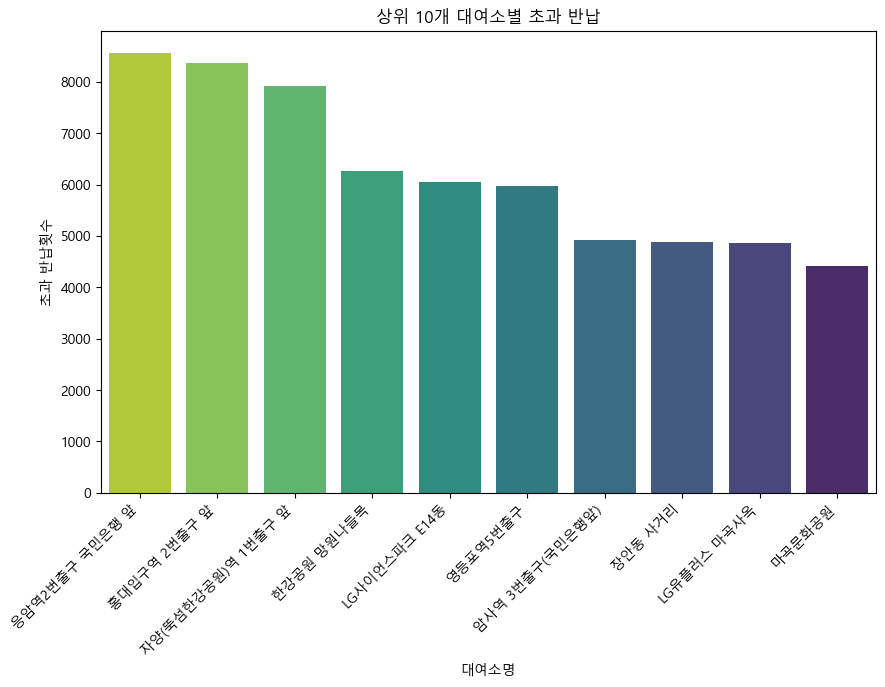

In [ ]:
top10_차이 = 대여반납횟수_df.nlargest(10, '대여/반납 차이')

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_차이, x='대여소명', y='대여/반납 차이', palette='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('상위 10개 대여소별 초과 반납')
plt.xlabel('대여소명')
plt.ylabel('초과 반납횟수')
plt.show()

- ```대여소의 이용(대여/반납)횟수가 많다고 해서 초과대여/반납이 이루어지는 것은 아닌 것으로 보임```

In [ ]:
rental_top = ['상왕십리역 1번출구', '신일해피트리아파트 앞', '서울시립대 정문 앞 B', '응암역2번출구 국민은행 앞', '홍대입구역 2번출구 앞', '자양(뚝섬한강공원)역 1번출구 앞']
df_rental_top = df_2024_대여이력[df_2024_대여이력['대여 대여소명'].isin(rental_top)]
df_rental_top.head()

대여일시  대여 대여소번호             대여 대여소명                 반납일시  \
38  2024-01-01 00:02:47       113        홍대입구역 2번출구 앞  2024-01-01 00:14:47   
83  2024-01-01 00:12:55       113        홍대입구역 2번출구 앞  2024-01-01 00:21:05   
120 2024-01-01 00:21:50       996      응암역2번출구 국민은행 앞  2024-01-01 00:25:29   
121 2024-01-01 00:22:02       996      응암역2번출구 국민은행 앞  2024-01-01 00:25:34   
316 2024-01-01 00:24:55       502  자양(뚝섬한강공원)역 1번출구 앞  2024-01-01 00:43:08   

     반납대여소번호              반납대여소명  이용시간(분)  이용거리(M) 성별  나이  나이대  자치구  \
38       170  DMC파크뷰자이아파트 302동 앞       12  2220.00  M  53  50대  마포구   
83       103          망원역 2번출구 앞        8  1273.72  F  36  30대  마포구   
120      931               역촌파출소        3   444.98  M  30  30대  은평구   
121      931               역촌파출소        3   333.78  F  31  30대  은평구   
316     3575         자양사거리(서원빌딩)       18  1880.00  F  25  20대  광진구   

                               상세주소         위도          경도  요일 요일구분  
38                서울특별시 마포구 양화로 165  37.557438  126.923821   0   평일  
83                서울특별시 마포구 양화로 165  37.557438  126.923821   0   평일  
120           서울특별시 은평구 연서로 9 센타폴리스  37.599968  126.915726   0   평일  
121           서울특별시 은평구 연서로 9 센타폴리스  37.599968  126.915726   0   평일  
316  서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞  37.531860  127.067192   0   평일

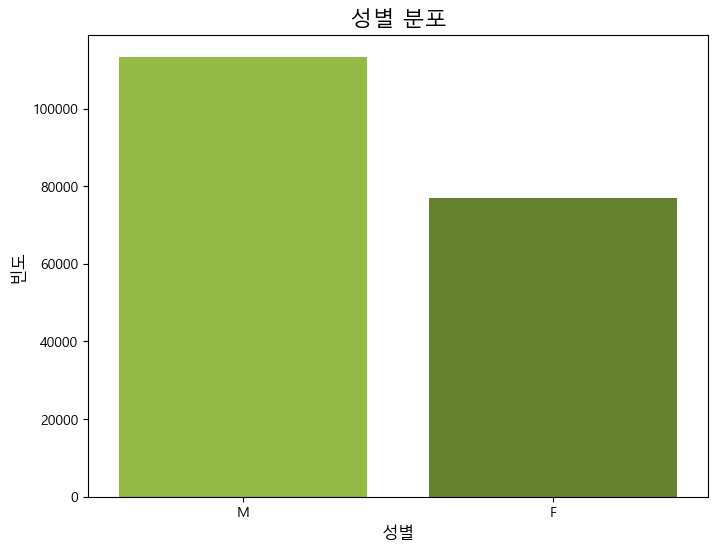

In [ ]:
# 필요한 컬럼만 선택
data_filtered = df_rental_top[['성별', '나이']]

plt.figure(figsize=(8, 6))
sns.countplot(data=data_filtered, x='성별', palette=color_match)
plt.title('성별 분포', fontsize=16)
plt.xlabel('성별', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.show()

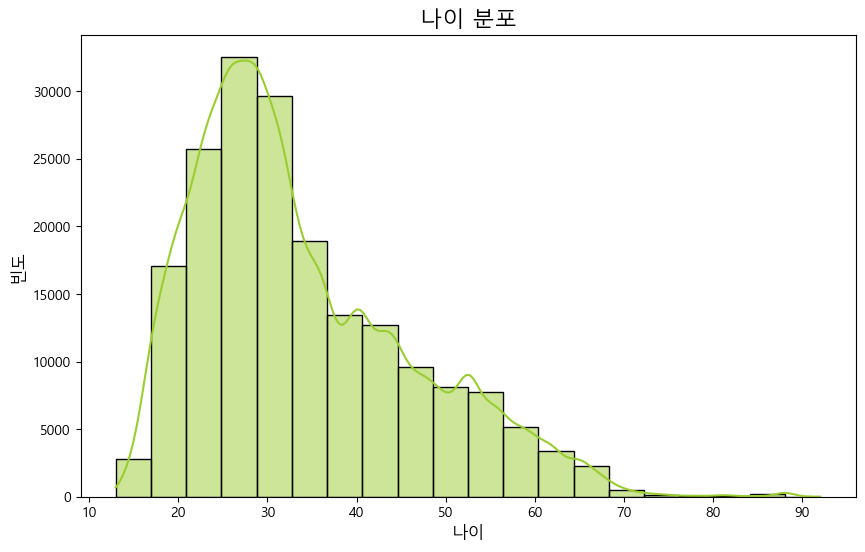

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_filtered, x='나이', bins=20, kde=True, color=color_match[0])
plt.title('나이 분포', fontsize=16)
plt.xlabel('나이', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.show()

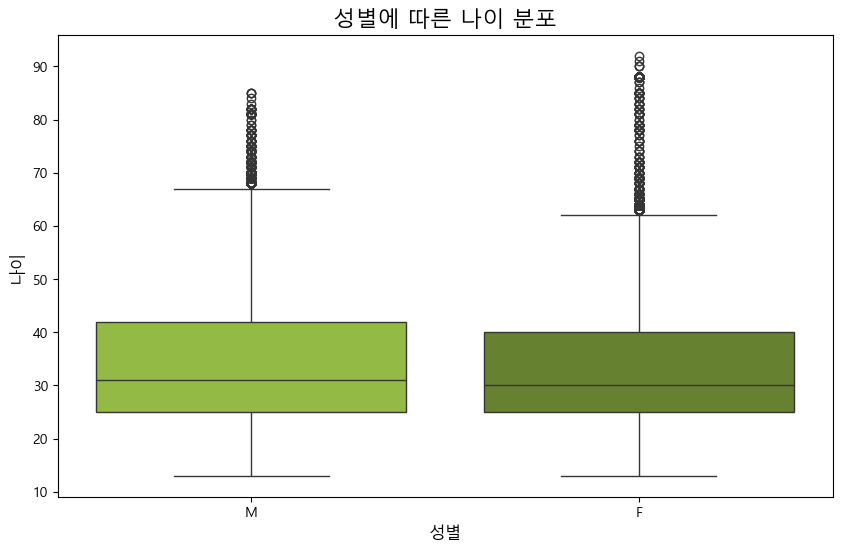

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered, x='성별', y='나이', palette=color_match)
plt.title('성별에 따른 나이 분포', fontsize=16)
plt.xlabel('성별', fontsize=12)
plt.ylabel('나이', fontsize=12)
plt.show()

```성별과 나이 분포를 보면 여성보다는 남성의 이용비율이 높고, 남성과 여성 모두 20~30대에서 가장 많은 이용비율을 차지 하고 있다.```

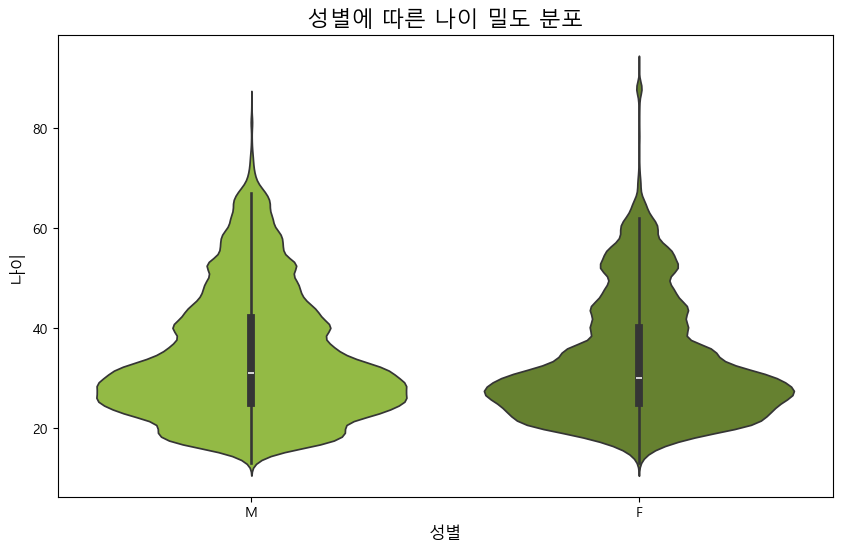

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_filtered, x='성별', y='나이', palette=color_match)
plt.title('성별에 따른 나이 밀도 분포', fontsize=16)
plt.xlabel('성별', fontsize=12)
plt.ylabel('나이', fontsize=12)
plt.show()

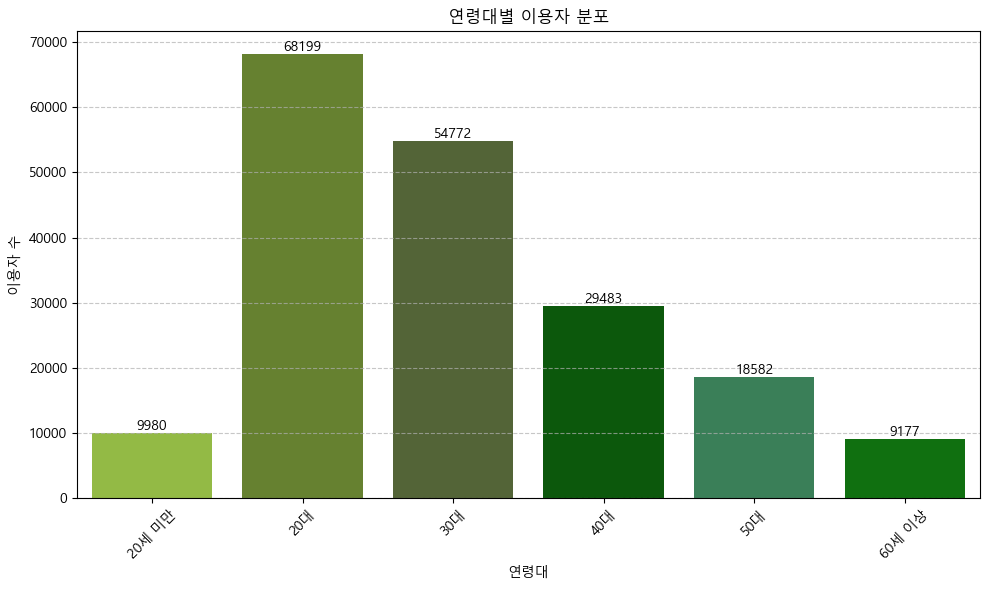

In [ ]:
# 1. Create age bins and labels
bins = [0, 19, 29, 39, 49, 59, 100]  # Define bin edges
labels = ['20세 미만', '20대', '30대', '40대', '50대', '60세 이상']  # Define labels for each bin

# 2. Create a new column with age groups
df_rental_top['연령대'] = pd.cut(df_rental_top['나이'], bins=bins, labels=labels, right=False)

# 3. Show the distribution of age groups
age_distribution = df_rental_top['연령대'].value_counts().sort_index().reset_index(name='이용자 수')

# 4. Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_distribution, x='연령대', y='이용자 수', palette=color_match)
plt.title('연령대별 이용자 분포')
plt.xlabel('연령대')
plt.ylabel('이용자 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(age_distribution['이용자 수']):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.tight_layout()
plt.show()

- 20~30대의 비율이 약 64%정도로 반 이상을 넘는 비율

In [ ]:
age_distribution['이용자 비율'] = (age_distribution['이용자 수'] / len(df_rental_top) * 100).round(2)
age_distribution

연령대  이용자 수  이용자 비율
0  20세 미만   9980    5.25
1     20대  68199   35.86
2     30대  54772   28.80
3     40대  29483   15.50
4     50대  18582    9.77
5  60세 이상   9177    4.83

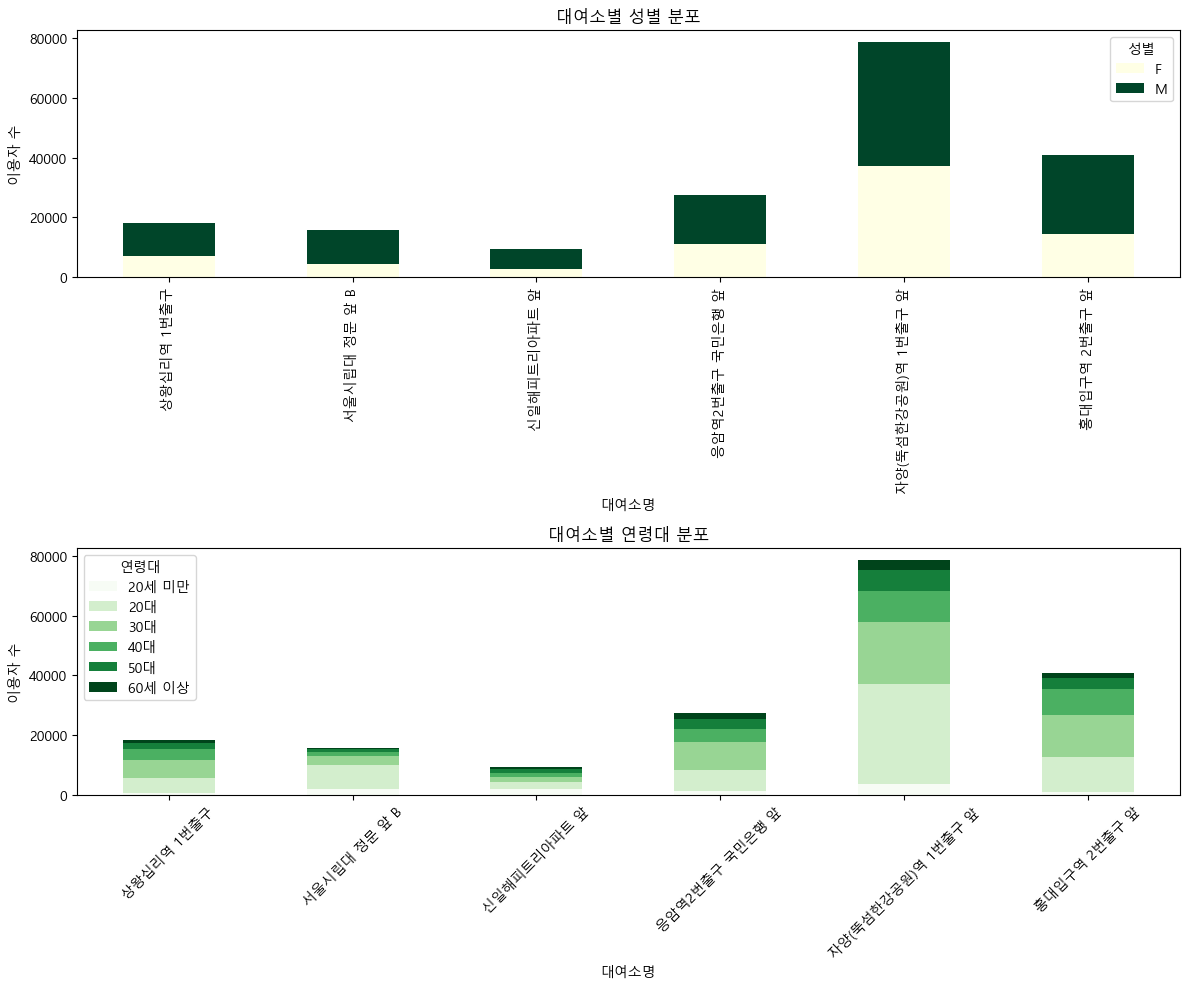

In [ ]:
# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
colormaps = ['summer', 'YlGn', 'Greens', 'BrBG', 'PuBuGn']
# 1. 대여소별 성별 분포
gender_dist = pd.crosstab(df_rental_top['대여 대여소명'], df_rental_top['성별'])
gender_dist.plot(kind='bar', stacked=True, ax=ax1, colormap='YlGn')
ax1.set_title('대여소별 성별 분포')
ax1.set_xlabel('대여소명')
ax1.set_ylabel('이용자 수')
plt.xticks(rotation=45)

# 2. 대여소별 연령대 분포
age_dist = pd.crosstab(df_rental_top['대여 대여소명'], df_rental_top['연령대'])
age_dist.plot(kind='bar', stacked=True, ax=ax2, colormap=colormaps[2])
ax2.set_title('대여소별 연령대 분포')
ax2.set_xlabel('대여소명')
ax2.set_ylabel('이용자 수')
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()
plt.show()

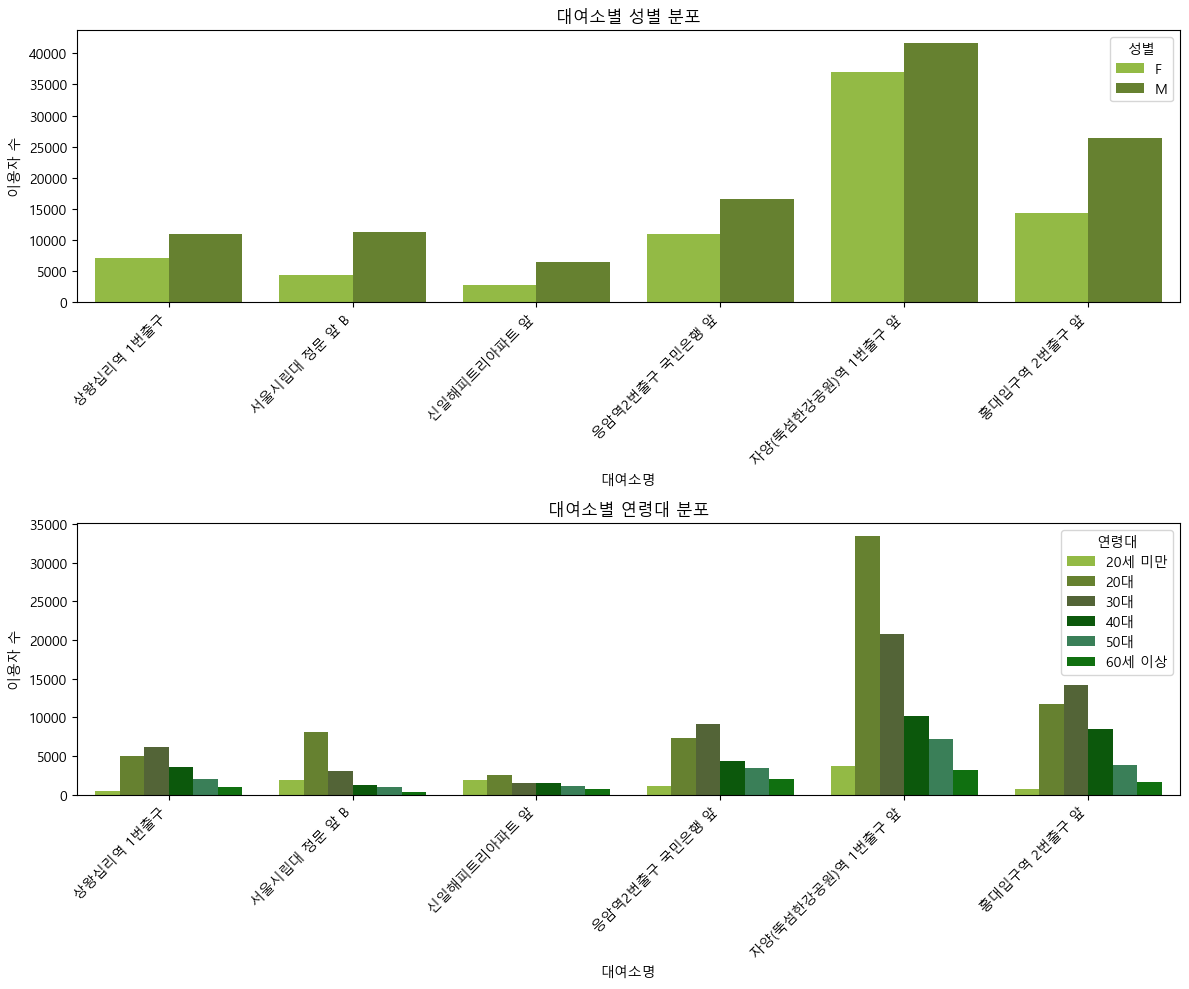

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

gender_dist = pd.crosstab(df_rental_top['대여 대여소명'], df_rental_top['성별']).reset_index()
gender_dist_melted = gender_dist.melt(id_vars='대여 대여소명', var_name='성별', value_name='이용자 수')

sns.barplot(data=gender_dist_melted, x='대여 대여소명', y='이용자 수', hue='성별', palette=color_match, ax=ax1)
ax1.set_title('대여소별 성별 분포')
ax1.set_xlabel('대여소명')
ax1.set_ylabel('이용자 수')
ax1.legend(title="성별")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

age_dist = pd.crosstab(df_rental_top['대여 대여소명'], df_rental_top['연령대']).reset_index()
age_dist_melted = age_dist.melt(id_vars='대여 대여소명', var_name='연령대', value_name='이용자 수')

sns.barplot(data=age_dist_melted, x='대여 대여소명', y='이용자 수', hue='연령대', palette=color_match, ax=ax2)
ax2.set_title('대여소별 연령대 분포')
ax2.set_xlabel('대여소명')
ax2.set_ylabel('이용자 수')
ax2.legend(title="연령대")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


```대여소별로 나누어 봤을 때도 마찬가지로 위에서 본 성별과 나이에 따른 이용 분포와 비슷하게 남성의 비율이 더 많고 20~30대에서 주로 이용하는 모습```

In [ ]:
df_rental_top.head()

대여일시  대여 대여소번호             대여 대여소명                 반납일시  \
38  2024-01-01 00:02:47       113        홍대입구역 2번출구 앞  2024-01-01 00:14:47   
83  2024-01-01 00:12:55       113        홍대입구역 2번출구 앞  2024-01-01 00:21:05   
120 2024-01-01 00:21:50       996      응암역2번출구 국민은행 앞  2024-01-01 00:25:29   
121 2024-01-01 00:22:02       996      응암역2번출구 국민은행 앞  2024-01-01 00:25:34   
316 2024-01-01 00:24:55       502  자양(뚝섬한강공원)역 1번출구 앞  2024-01-01 00:43:08   

     반납대여소번호              반납대여소명  이용시간(분)  이용거리(M) 성별  나이  나이대  자치구  \
38       170  DMC파크뷰자이아파트 302동 앞       12  2220.00  M  53  50대  마포구   
83       103          망원역 2번출구 앞        8  1273.72  F  36  30대  마포구   
120      931               역촌파출소        3   444.98  M  30  30대  은평구   
121      931               역촌파출소        3   333.78  F  31  30대  은평구   
316     3575         자양사거리(서원빌딩)       18  1880.00  F  25  20대  광진구   

                               상세주소         위도          경도  요일 요일구분  연령대  
38                서울특별시 마포구 양화로 165  37.557438  126.923821   0   평일  50대  
83                서울특별시 마포구 양화로 165  37.557438  126.923821   0   평일  30대  
120           서울특별시 은평구 연서로 9 센타폴리스  37.599968  126.915726   0   평일  30대  
121           서울특별시 은평구 연서로 9 센타폴리스  37.599968  126.915726   0   평일  30대  
316  서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞  37.531860  127.067192   0   평일  20대

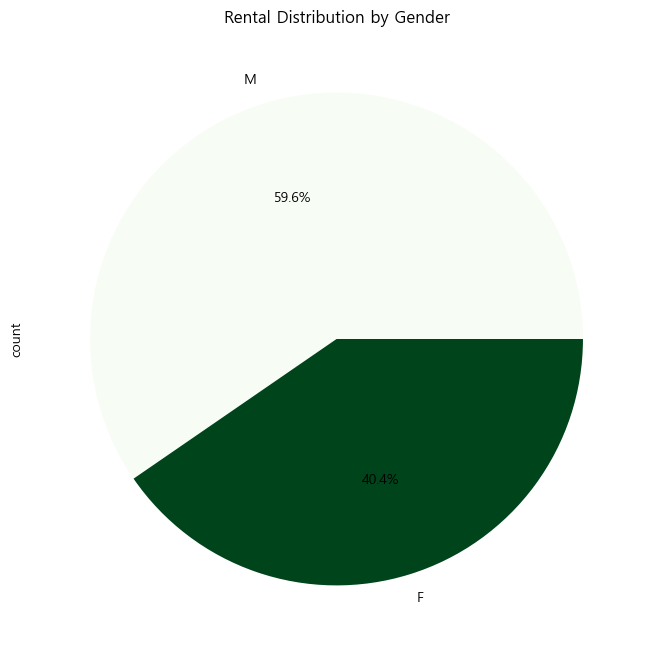

In [ ]:
plt.figure(figsize=(8, 8))
df_rental_top['성별'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Greens')
plt.title('Rental Distribution by Gender')
plt.show()

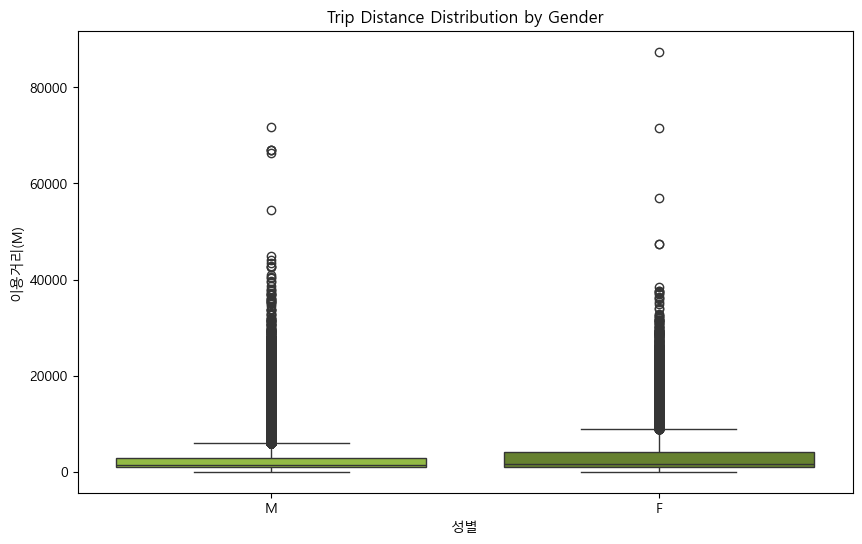

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rental_top, x='성별', y='이용거리(M)', palette=color_match)
plt.title('Trip Distance Distribution by Gender')
plt.show()

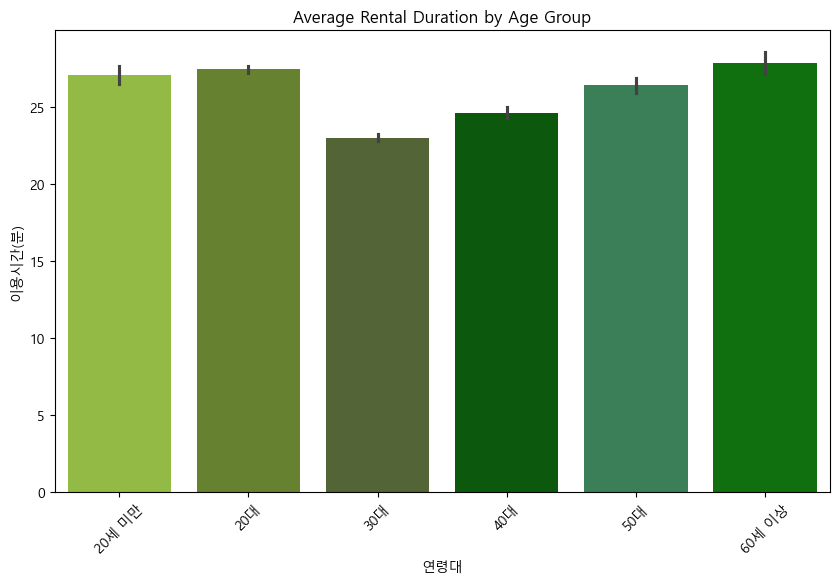

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_rental_top, x='연령대', y='이용시간(분)',  palette=color_match)
plt.title('Average Rental Duration by Age Group')
plt.xticks(rotation=45)
plt.show()

### 초과 대여 대여소 주요 분석

* 초과 이용이 생긴 원인을 분석하기 위해 대여소 1개 단위로 상세 분석 진행

초과 대여 대여소
1. 상왕십리역 1번출구
2. 신일해피트리아파트 앞
3. 서울시립대 정문 앞 B
4. 우장산역 1번출구옆(우장산아이파크105동앞)
5. 광진광장 교통섬

#### 초과 대여 1순위 상왕십리역 1번출구 주요 분석

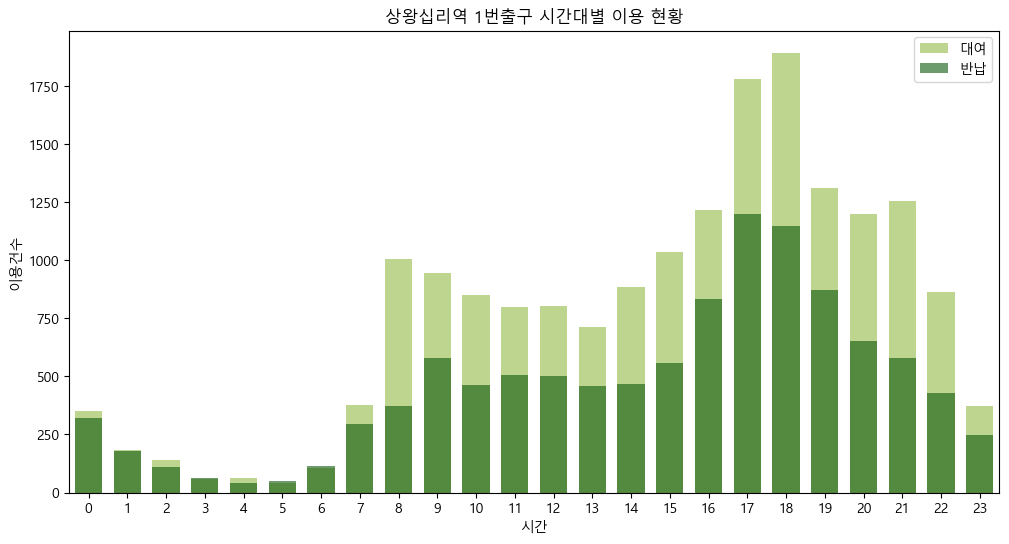

In [ ]:
# 응암역2번출구 국민은행 앞
상왕십리역_1번출구_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '상왕십리역 1번출구']
상왕십리역_1번출구_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '상왕십리역 1번출구']

상왕십리역_1번출구_대여['대여시간'] = pd.to_datetime(상왕십리역_1번출구_대여['대여일시']).dt.hour
상왕십리역_1번출구_반납['반납시간'] = pd.to_datetime(상왕십리역_1번출구_반납['반납일시']).dt.hour

상왕십리역_1번출구_대여 = 상왕십리역_1번출구_대여.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')
상왕십리역_1번출구_반납 = 상왕십리역_1번출구_반납.groupby('반납대여소명')['반납시간'].value_counts().reset_index(name='반납건수')

plt.figure(figsize=(12, 6))
plt.title("상왕십리역 1번출구 시간대별 이용 현황")
sns.barplot(data=상왕십리역_1번출구_대여, x='대여시간', y='대여건수', color=color_match[0], alpha=0.6, label='대여', width=0.7)
sns.barplot(data=상왕십리역_1번출구_반납, x='반납시간', y='반납건수', color=color_match[3], alpha=0.6, label='반납', width=0.7)
plt.legend()
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.show()


```출근(7~9시)/퇴근(17-19) 시간대뿐만 아니라 출퇴근시간 후로도 대여가 반납의 2배가량 차이나는 것으로 초과 대여 문제가 크다```

In [ ]:
# 상왕십리역에서 대여해서 어디로 많이 반납하는지 확인
상왕십리역_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '상왕십리역 1번출구']

# 반납대여소별 반납 횟수 집계
반납_대여소_분포 = 상왕십리역_대여['반납대여소명'].value_counts().reset_index(name='반납횟수')
반납_대여소_분포.head(10)

반납대여소명  반납횟수
0       청계9가교차로 앞  2165
1      청계8가 사거리 B  1637
2      도선동 주민센터 앞  1385
3          왕십리교회옆   936
4      상왕십리역 1번출구   628
5  왕십리역 4번 출구 건너편   611
6       청계벽산아파트 앞   584
7    신당역 12번 출구 뒤   513
8        서울문화재단 앞   509
9           양지사거리   437

In [ ]:
# 어디서 대여해서 상왕십리로 반납하는지 확인
상왕십리역_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '상왕십리역 1번출구']

# 대여 대여소별 대여 횟수 집계
대여_대여소_분포 = 상왕십리역_반납['대여 대여소명'].value_counts().reset_index(name='대여횟수')
대여_대여소_분포.head(10)

대여 대여소명  대여횟수
0          왕십리교회옆   935
1      상왕십리역 1번출구   628
2      청계8가 사거리 B   558
3       청계9가교차로 앞   525
4      도선동 주민센터 앞   514
5    신당역 12번 출구 뒤   459
6  왕십리역 4번 출구 건너편   398
7        서울문화재단 앞   234
8   왕십리역 11번 출구 앞   229
9         청계천 영도교   215

상왕십리역 1번출구에서 대여해서 청계9가교차로 앞에 반납하는 횟수는 2165
<br/>
반대로 청계9가교차로 앞에서 대여해서 상왕십리역 1번출구로 다시 반납되는 횟수는 525
<br/>
-> 상왕십리역과 청계9가교차로 앞의 시간대별 왕복 현황을 보자

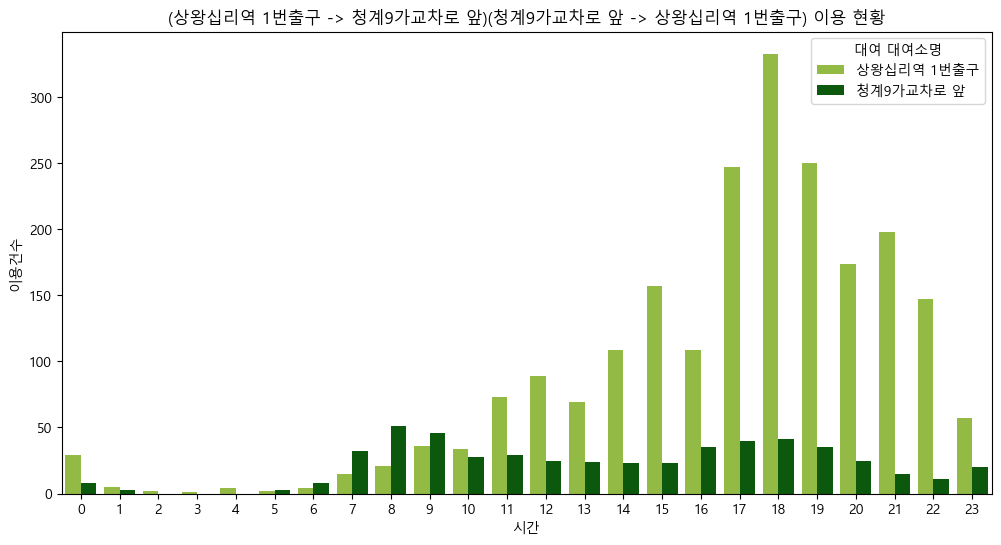

In [ ]:
# (상왕십리역 1번출구 -> 청계9가교차로 앞), (청계9가교차로 앞 -> 상왕십리역 1번출구)되는 이용 정보들을 시간대별 횟수 파악
상왕십리_청계9가 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '상왕십리역 1번출구') & (df_2024_대여이력['반납대여소명'] == '청계9가교차로 앞')) |
             ((df_2024_대여이력['대여 대여소명'] == '청계9가교차로 앞') & (df_2024_대여이력['반납대여소명'] == '상왕십리역 1번출구'))]

상왕십리_청계9가['대여시간'] = pd.to_datetime(상왕십리_청계9가['대여일시']).dt.hour
상왕십리_청계9가_시간별이동 = 상왕십리_청계9가.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(상왕십리역 1번출구 -> 청계9가교차로 앞)(청계9가교차로 앞 -> 상왕십리역 1번출구) 이용 현황")
sns.barplot(data=상왕십리_청계9가_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```지도 상으로 봤을 때 청계9가교차로 앞에 아파트 단지나 주거단지가 많은 것으로 확인```
- ```출근 시간에는 청계 9가에서(아파트 단지 근처)에서 상왕십리역(회사 교통수단)으로 대여하는 사람이 많음```
- ```퇴근 시간에는 상왕십리역에서 청계 9가로(퇴근 후 집으로)대여하는 사람이 수요가 많아 초과 대여 수요가 많은 것으로 보임```
- ```그런데 퇴근 시간대에 수요가 많다면 출근을 목적으로 출근시간대에 청계9가교차로 앞에서 상왕십리역 1번출구로 이용 수요도 많아야 하지 않나```
- ```+ 상가가 많기에 사람들이 퇴근 후 집으로 바로 가기보단 스트레스 풀거나 여가를 목적으로 역에서 핫플레이스까지 자전거를 많이 이용하는 것일수도 있다는 생각```

상왕십리역 1번출구에서 대여해서 청계8가 사거리 B에 반납하는 횟수는 1646
<br/>
반대로 청계8가 사거리 B에서 대여해서 상왕십리역 1번출구로 다시 반납되는 횟수는 559
<br/>
-> 상왕십리역과 청계8가 사거리 B의 시간대별 왕복 현황을 보자

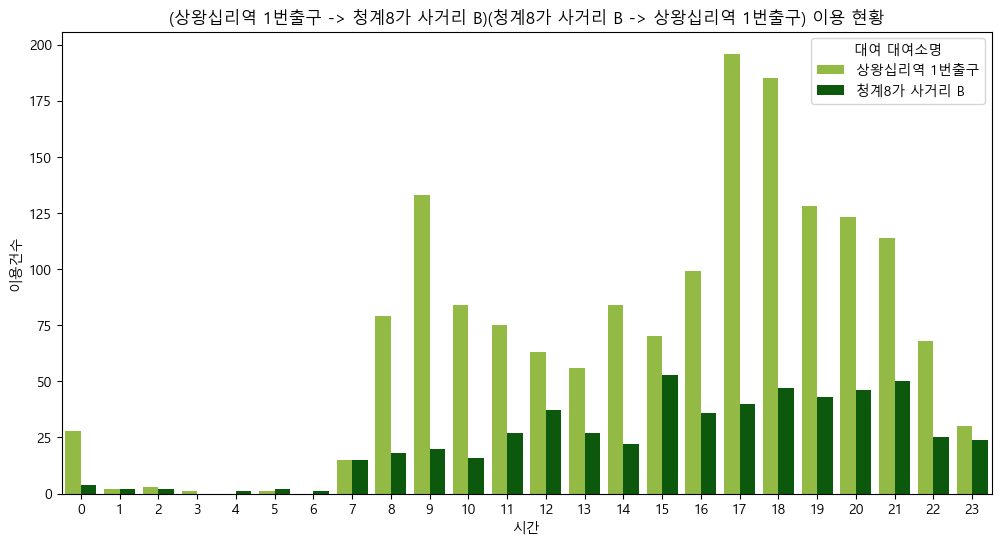

In [ ]:
상왕십리_청계8가 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '상왕십리역 1번출구') & (df_2024_대여이력['반납대여소명'] == '청계8가 사거리 B')) |
             ((df_2024_대여이력['대여 대여소명'] == '청계8가 사거리 B') & (df_2024_대여이력['반납대여소명'] == '상왕십리역 1번출구'))]

상왕십리_청계8가['대여시간'] = pd.to_datetime(상왕십리_청계8가['대여일시']).dt.hour
상왕십리_청계8가_시간별이동 = 상왕십리_청계8가.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(상왕십리역 1번출구 -> 청계8가 사거리 B)(청계8가 사거리 B -> 상왕십리역 1번출구) 이용 현황")
sns.barplot(data=상왕십리_청계8가_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```대여/반납 양상은 청계9가 사거리 앞과 초과대여 양상은 비슷하지만 출퇴근 시간 관계없이 많이 발생하고 있다.```
- ```청계8가 사거리 근처에 상왕십리역을 포함한 역이 4개가 존재하는데 청계 9가보다 출근 시간대에 대여 수요가 많은 것은 목적지에 지하철을 더 타고 가지 않고 상왕십리역에서 일찍 내려서 자전거를 이용?```

#### 초과 대여 2순위 신일해피트리아파트 앞 주요 분석

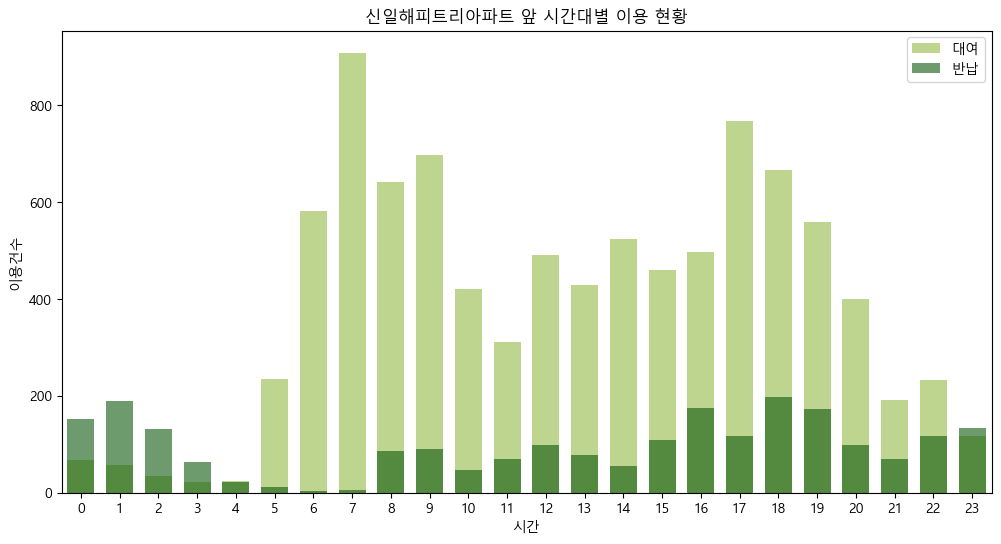

In [ ]:
# 신일해피트리아파트 앞
신일해피트리아파트_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '신일해피트리아파트 앞']
신일해피트리아파트_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '신일해피트리아파트 앞']

신일해피트리아파트_대여['대여시간'] = pd.to_datetime(신일해피트리아파트_대여['대여일시']).dt.hour
신일해피트리아파트_반납['반납시간'] = pd.to_datetime(신일해피트리아파트_반납['반납일시']).dt.hour

신일해피트리아파트_대여 = 신일해피트리아파트_대여.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')
신일해피트리아파트_반납 = 신일해피트리아파트_반납.groupby('반납대여소명')['반납시간'].value_counts().reset_index(name='반납건수')

plt.figure(figsize=(12, 6))
plt.title("신일해피트리아파트 앞 시간대별 이용 현황")
sns.barplot(data=신일해피트리아파트_대여, x='대여시간', y='대여건수', color=color_match[0], alpha=0.6, label='대여', width=0.7)
sns.barplot(data=신일해피트리아파트_반납, x='반납시간', y='반납건수', color=color_match[3], alpha=0.6, label='반납', width=0.7)
plt.legend()
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.show()

- ``` 출퇴근 시간 관계없이 신일해피트리아파트 앞 대여소에 많은 초과 대여 수요가 발생```

In [ ]:
신일해피트리아파트_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '신일해피트리아파트 앞']

# 반납대여소별 반납 횟수 집계
반납_대여소_분포 = 신일해피트리아파트_대여['반납대여소명'].value_counts().reset_index(name='반납횟수')
반납_대여소_분포.head(10)

반납대여소명  반납횟수
0       신정1동 주민센터 앞  1392
1              신곡시장   570
2      신정6동 주민센터 인근   490
3  목동역5번출구 교통정보센터 앞   455
4         서울영상고교 입구   433
5            양천문화회관   299
6          신트리공원 입구   275
7     양천구청, 보건소 사잇길   253
8             청기와빌딩   224
9      곰달래 문화복지센터 A   220

In [ ]:
신일해피트리아파트_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '신일해피트리아파트 앞']

대여_대여소_분포 = 신일해피트리아파트_반납['대여 대여소명'].value_counts().reset_index(name='대여횟수')
대여_대여소_분포.head(10)

대여 대여소명  대여횟수
0   신일해피트리아파트 앞   163
1       청소년음악센터   123
2  목동아파트 703동 앞   119
3   남부법원검찰청 교차로    93
4  신정6동 주민센터 인근    75
5          신곡시장    74
6   신정1동 주민센터 앞    70
7     서울영상고교 입구    68
8  곰달래 문화복지센터 A    66
9  개봉지구대 개봉치안센터    66

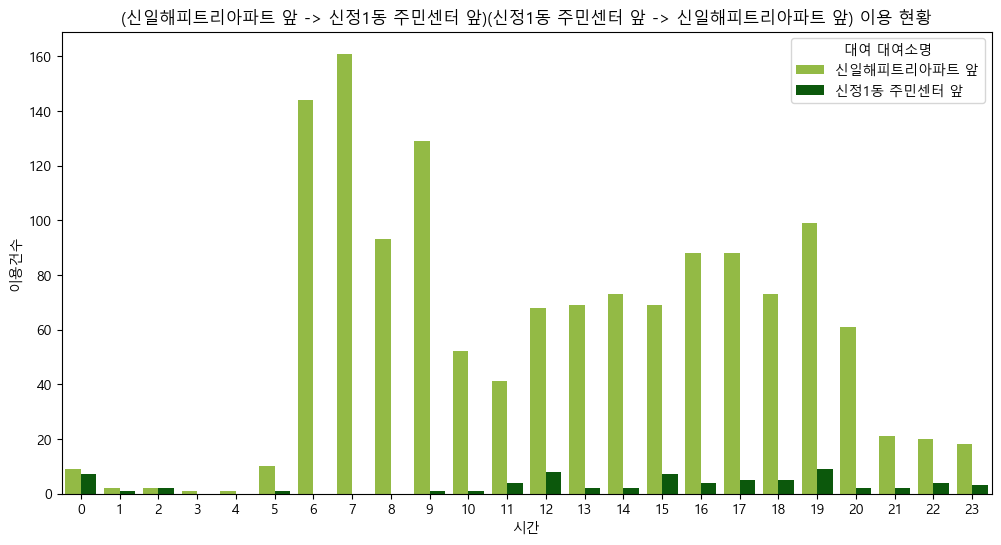

In [ ]:
신일해피트리아파트_신정1동주민센터 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '신일해피트리아파트 앞') & (df_2024_대여이력['반납대여소명'] == '신정1동 주민센터 앞')) |
             ((df_2024_대여이력['대여 대여소명'] == '신정1동 주민센터 앞') & (df_2024_대여이력['반납대여소명'] == '신일해피트리아파트 앞'))]

신일해피트리아파트_신정1동주민센터['대여시간'] = pd.to_datetime(신일해피트리아파트_신정1동주민센터['대여일시']).dt.hour
신일해피트리아파트_신정1동주민센터_시간별이동 = 신일해피트리아파트_신정1동주민센터.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(신일해피트리아파트 앞 -> 신정1동 주민센터 앞)(신정1동 주민센터 앞 -> 신일해피트리아파트 앞) 이용 현황")
sns.barplot(data=신일해피트리아파트_신정1동주민센터_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```신일해피트리아파트 근처에는 많은 주거단지가 위치해있고, 신정1동 주민센터 앞 대여소 바로 옆에는 신정네거리역이 위치해있다.```
- ```많은 사람들이 지하철을 이용하기 위해 신일해피트리아파트 앞 대여소에서 대여해서 신정 1동 주민센터 앞에다가 반납하는 용도로 많은 초과대여가 이루어지고 있는 것으로 보인다```

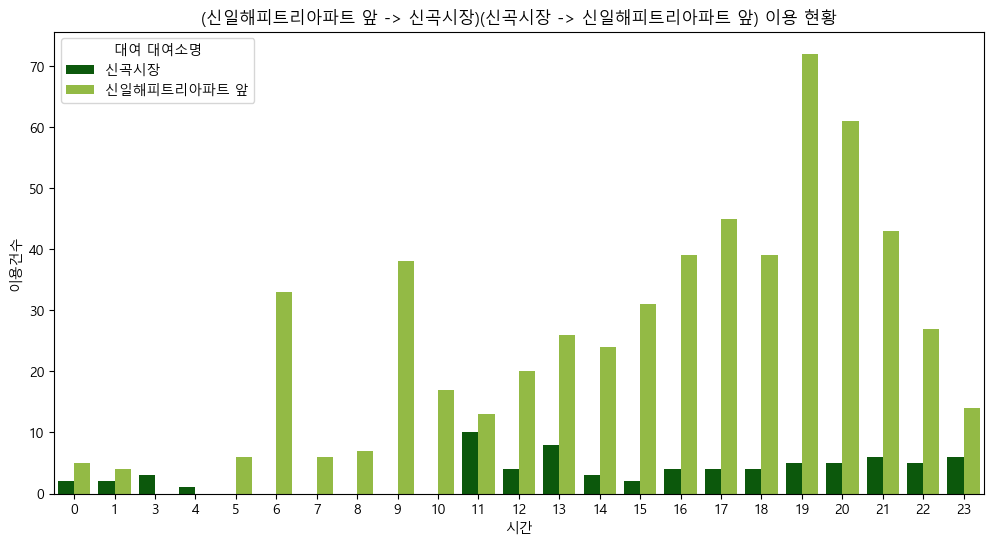

In [ ]:
신일해피트리아파트_신곡시장 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '신일해피트리아파트 앞') & (df_2024_대여이력['반납대여소명'] == '신곡시장')) |
             ((df_2024_대여이력['대여 대여소명'] == '신곡시장') & (df_2024_대여이력['반납대여소명'] == '신일해피트리아파트 앞'))]

신일해피트리아파트_신곡시장['대여시간'] = pd.to_datetime(신일해피트리아파트_신곡시장['대여일시']).dt.hour
신일해피트리아파트_신곡시장_시간별이동 = 신일해피트리아파트_신곡시장.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(신일해피트리아파트 앞 -> 신곡시장)(신곡시장 -> 신일해피트리아파트 앞) 이용 현황")
sns.barplot(data=신일해피트리아파트_신곡시장_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[3],color_match[0]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```아파트에서 시장으로 갈 때 버스를 통한 교통수단이 없는 것을 확인, 장을 보러간다거나 할 때 자전거를 이용해서 갔다가 돌아올 땐 짐이 있으니 걸어서 오는 패턴이 아닐까 ```

### 초과 반납 대여소 주요 분석

초과 반납 대여소
1. 응암역2번출구 국민은행 앞
2. 홍대입구역 2번출구 앞
3. 자양(뚝섬한강공원)역 1번출구 앞
4. 한강공원 망원나들목
5. LG사이언스파크 E14동

#### 초과 반납 1순위 응암역2번출구 국민은행 앞 주요 분석

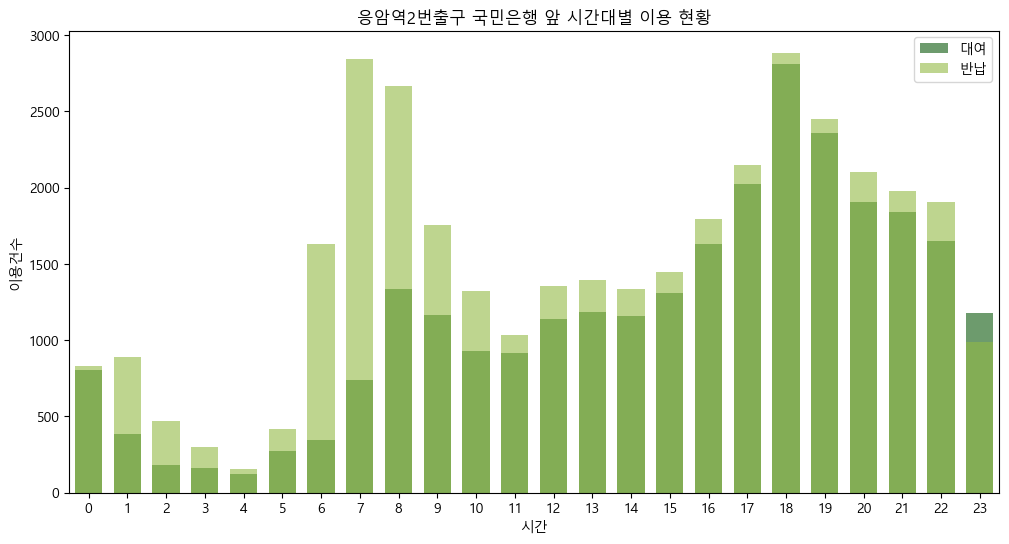

In [ ]:
# 응암역2번출구 국민은행 앞
응암역2번출구_국민은행_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '응암역2번출구 국민은행 앞']
응암역2번출구_국민은행_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '응암역2번출구 국민은행 앞']

응암역2번출구_국민은행_대여['대여시간'] = pd.to_datetime(응암역2번출구_국민은행_대여['대여일시']).dt.hour
응암역2번출구_국민은행_반납['반납시간'] = pd.to_datetime(응암역2번출구_국민은행_반납['반납일시']).dt.hour

응암역2번출구_국민은행_대여 = 응암역2번출구_국민은행_대여.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')
응암역2번출구_국민은행_반납 = 응암역2번출구_국민은행_반납.groupby('반납대여소명')['반납시간'].value_counts().reset_index(name='반납건수')

plt.figure(figsize=(12, 6))
plt.title("응암역2번출구 국민은행 앞 시간대별 이용 현황")
sns.barplot(data=응암역2번출구_국민은행_대여, x='대여시간', y='대여건수', color=color_match[3], alpha=0.6, label='대여', width=0.7)
sns.barplot(data=응암역2번출구_국민은행_반납, x='반납시간', y='반납건수', color=color_match[0], alpha=0.6, label='반납', width=0.7)
plt.legend()
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.show()

``` 오전 이른 출근시간대인 6시부터 9시까지 많은 초과 반납이 이루어지고 있는 것을 확인할 수 있다.```

``` 많은 사람들이 응암역 2번출구 근처 회사에 출근을 많이 하면서 반납을 많이하고, 출근을 위해 지하철로 이동하기 위한 목적으로 이용했다가 응암역 대여소에 반납하는 것으로 추정 ```

In [ ]:
# 응암역2번출구 국민은행 앞에서 대여해서 어디로 많이 반납하는지 확인
응암역2번출구_국민은행_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '응암역2번출구 국민은행 앞']

반납_대여소_분포 = 응암역2번출구_국민은행_대여['반납대여소명'].value_counts().reset_index(name='반납횟수')
반납_대여소_분포.head(10)

반납대여소명  반납횟수
0                  역촌파출소  5239
1         응암역2번출구 국민은행 앞  2637
2          신사두산위브2차아파트 앞  1831
3  역촌종합시장 버스정류장(예일여고 방면)  1076
4             한강공원 망원나들목   972
5              연신내역 5번출구   889
6                   예일여중   742
7   구산역 2번 출구 예일여고 버스정류장   734
8                  응암오거리   674
9               새절역 2번출구   541

In [ ]:
# 어디서 대여해서 응암역2번출구 국민은행 앞으로 반납하는지 확인
응암역2번출구_국민은행_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '응암역2번출구 국민은행 앞']

대여_대여소_분포 = 응암역2번출구_국민은행_반납['대여 대여소명'].value_counts().reset_index(name='대여횟수')
대여_대여소_분포.head(10)

대여 대여소명  대여횟수
0                  역촌파출소  4495
1          신사두산위브2차아파트 앞  3548
2            역촌 센트레빌 아파트  2821
3         응암역2번출구 국민은행 앞  2637
4              연신내역 5번출구  1316
5       역촌센트레빌아파트 101동 앞  1010
6  역촌종합시장 버스정류장(예일여고 방면)  1007
7             한강공원 망원나들목   993
8                   예일여중   965
9               구산역 4번출구   893

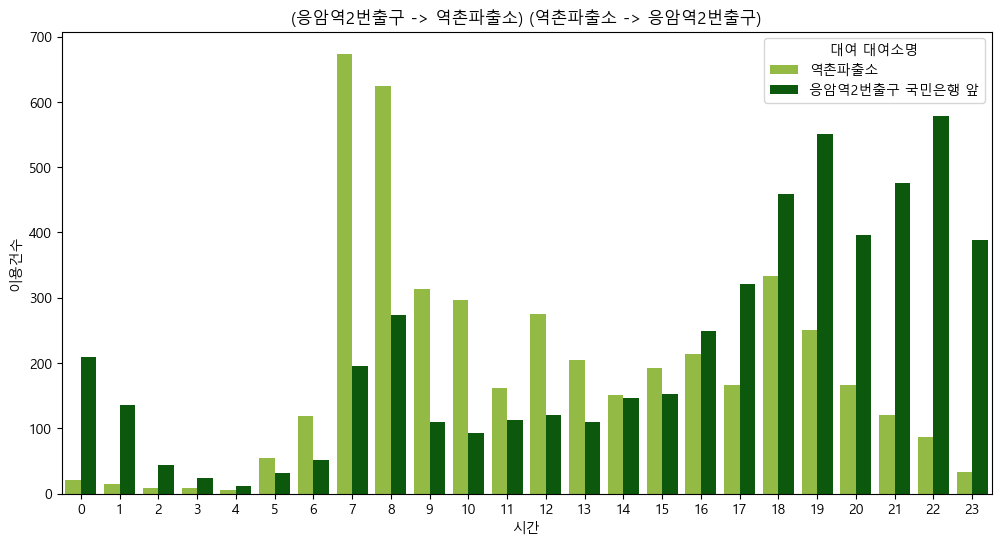

In [ ]:
응암역2번출구_역촌파출소 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '응암역2번출구 국민은행 앞') & (df_2024_대여이력['반납대여소명'] == '역촌파출소')) |
             ((df_2024_대여이력['대여 대여소명'] == '역촌파출소') & (df_2024_대여이력['반납대여소명'] == '응암역2번출구 국민은행 앞'))]

응암역2번출구_역촌파출소['대여시간'] = pd.to_datetime(응암역2번출구_역촌파출소['대여일시']).dt.hour
응암역2번출구_역촌파출소_시간별이동 = 응암역2번출구_역촌파출소.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(응암역2번출구 -> 역촌파출소) (역촌파출소 -> 응암역2번출구)")
sns.barplot(data=응암역2번출구_역촌파출소_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

```출근 시간대에는 역촌파출소에서 대여해서 응암역에 반납하는 건수가 많은 것을 확인할 수 있었고, 퇴근 시간대에는 응암역에서 대여해서 역촌파출소에 반납하는 건수가 많다```

신사두산위브2차아파트 앞 ,역촌 센트레빌 아파트

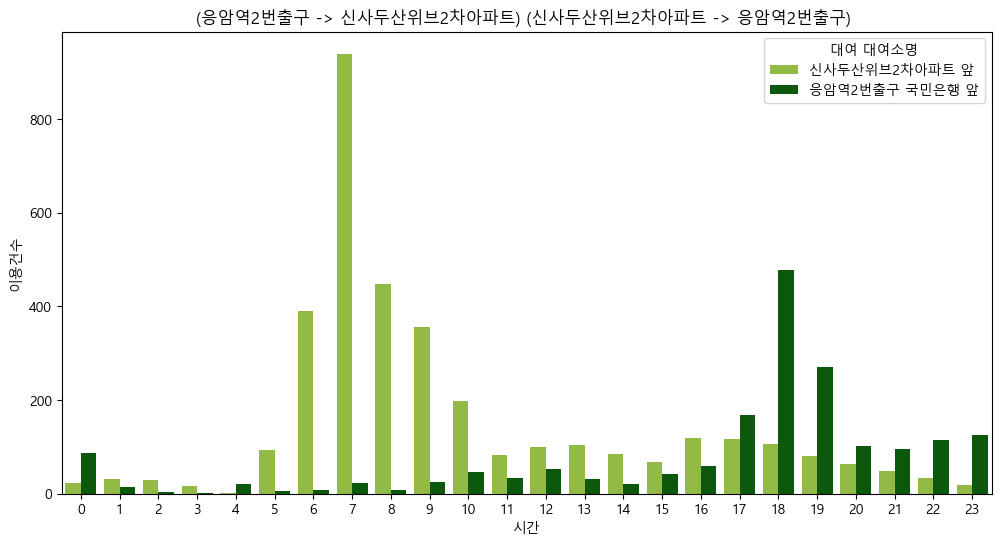

In [ ]:
응암역2번출구_신사두산위브2차아파트 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '응암역2번출구 국민은행 앞') & (df_2024_대여이력['반납대여소명'] == '신사두산위브2차아파트 앞')) |
             ((df_2024_대여이력['대여 대여소명'] == '신사두산위브2차아파트 앞') & (df_2024_대여이력['반납대여소명'] == '응암역2번출구 국민은행 앞'))]

응암역2번출구_신사두산위브2차아파트['대여시간'] = pd.to_datetime(응암역2번출구_신사두산위브2차아파트 ['대여일시']).dt.hour
응암역2번출구_신사두산위브2차아파트_시간별이동 = 응암역2번출구_신사두산위브2차아파트.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(응암역2번출구 -> 신사두산위브2차아파트) (신사두산위브2차아파트 -> 응암역2번출구) ")
sns.barplot(data=응암역2번출구_신사두산위브2차아파트_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

```출근 시간대에 아파트 단지 내에서 출근을 위해 응암역에 반납하는 초과 반납이 많이 이루어지고 퇴근 시간에는 다시 아파트로 돌아오기 위해 많은 대여가 이루어진다```

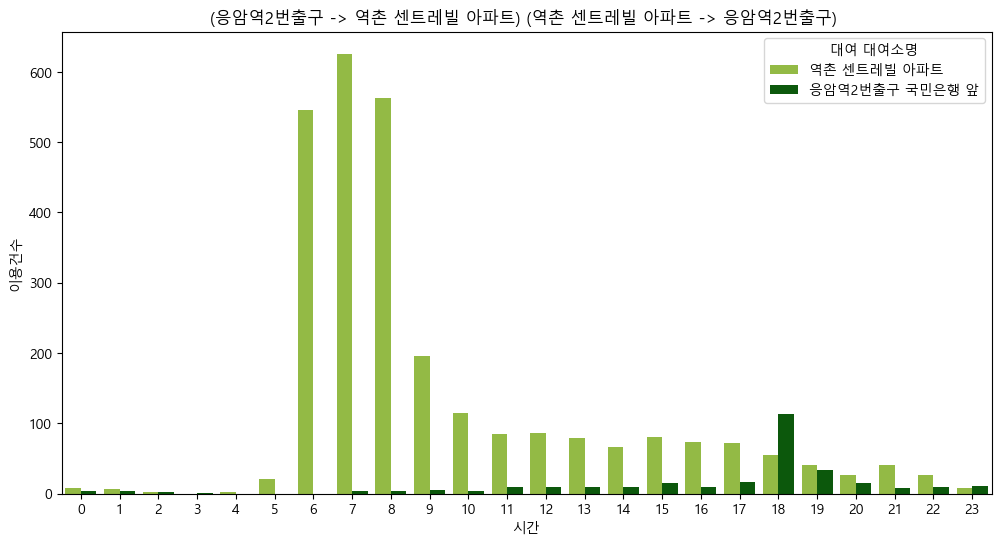

In [ ]:
응암역2번출구_역촌센트레빌아파트 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '응암역2번출구 국민은행 앞') & (df_2024_대여이력['반납대여소명'] == '역촌 센트레빌 아파트')) |
             ((df_2024_대여이력['대여 대여소명'] == '역촌 센트레빌 아파트') & (df_2024_대여이력['반납대여소명'] == '응암역2번출구 국민은행 앞'))]

응암역2번출구_역촌센트레빌아파트['대여시간'] = pd.to_datetime(응암역2번출구_역촌센트레빌아파트 ['대여일시']).dt.hour
응암역2번출구_역촌센트레빌아파트_시간별이동 = 응암역2번출구_역촌센트레빌아파트.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(응암역2번출구 -> 역촌 센트레빌 아파트) (역촌 센트레빌 아파트 -> 응암역2번출구) ")
sns.barplot(data=응암역2번출구_역촌센트레빌아파트_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```역촌 센트레빌 아파트에서는 위와 마찬가지로 출근 시간대에 많은 초과 반납이 이루어지지만 퇴근시간대는 많은 대여가 이루어지고 있지는 않다 ```

#### 초과 반납 2순위 자양역 1번출구 앞 주요 분석

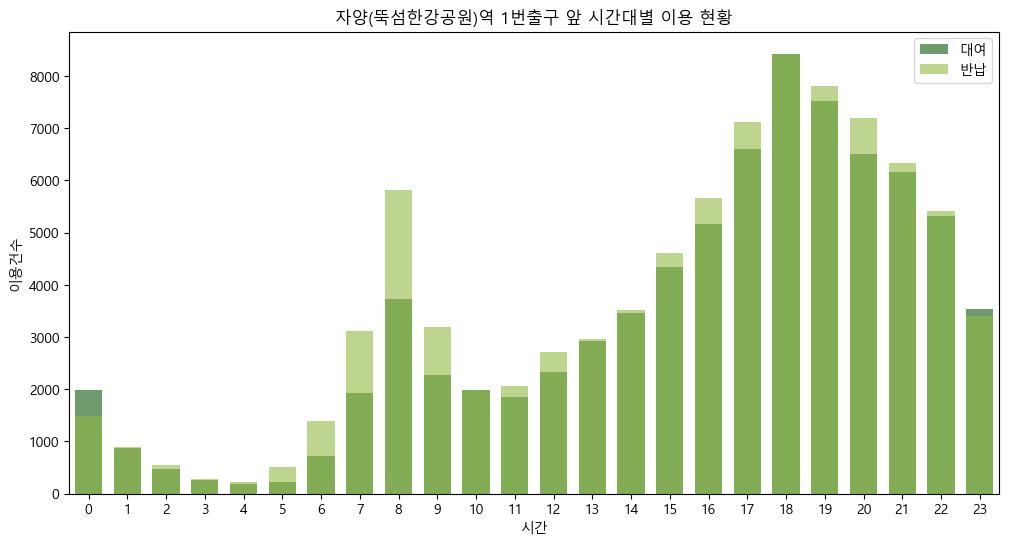

In [ ]:
자양역_1번출구_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '자양(뚝섬한강공원)역 1번출구 앞']
자양역_1번출구_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '자양(뚝섬한강공원)역 1번출구 앞']

자양역_1번출구_대여['대여시간'] = pd.to_datetime(자양역_1번출구_대여['대여일시']).dt.hour
자양역_1번출구_반납['반납시간'] = pd.to_datetime(자양역_1번출구_반납['반납일시']).dt.hour

자양역_1번출구_대여 = 자양역_1번출구_대여.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')
자양역_1번출구_반납 = 자양역_1번출구_반납.groupby('반납대여소명')['반납시간'].value_counts().reset_index(name='반납건수')

plt.figure(figsize=(12, 6))
plt.title("자양(뚝섬한강공원)역 1번출구 앞 시간대별 이용 현황")
sns.barplot(data=자양역_1번출구_대여, x='대여시간', y='대여건수', color=color_match[3], alpha=0.6, label='대여', width=0.7)
sns.barplot(data=자양역_1번출구_반납, x='반납시간', y='반납건수', color=color_match[0], alpha=0.6, label='반납', width=0.7)
plt.legend()
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.show()

In [ ]:
자양역_1번출구_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '자양(뚝섬한강공원)역 1번출구 앞']

반납_대여소_분포 = 자양역_1번출구_대여['반납대여소명'].value_counts().reset_index(name='반납횟수')
반납_대여소_분포.head(10)

반납대여소명   반납횟수
0  자양(뚝섬한강공원)역 1번출구 앞  12897
1    건대입구역 사거리(롯데백화점)   5212
2               자양나들목   4473
3          신자초교입구 교차로   4124
4             자양한강도서관   3802
5             자양중앙나들목   3493
6     성수2가1동 공영주차장 인근   2539
7        건대입구역 5번출구 뒤   1803
8           중앙농협(자양동)   1386
9           이튼타워리버 2차   1209

In [ ]:
자양역_1번출구_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '자양(뚝섬한강공원)역 1번출구 앞']

대여_대여소_분포 = 자양역_1번출구_반납['대여 대여소명'].value_counts().reset_index(name='대여횟수')
대여_대여소_분포.head(10)

대여 대여소명   대여횟수
0  자양(뚝섬한강공원)역 1번출구 앞  12901
1               자양나들목   5281
2             자양중앙나들목   4722
3             자양한강도서관   3997
4    건대입구역 사거리(롯데백화점)   3915
5          신자초교입구 교차로   3395
6        건대입구역 5번출구 뒤   2776
7     성수2가1동 공영주차장 인근   2607
8          청계천 생태교실 앞   1141
9           이튼타워리버 2차   1094

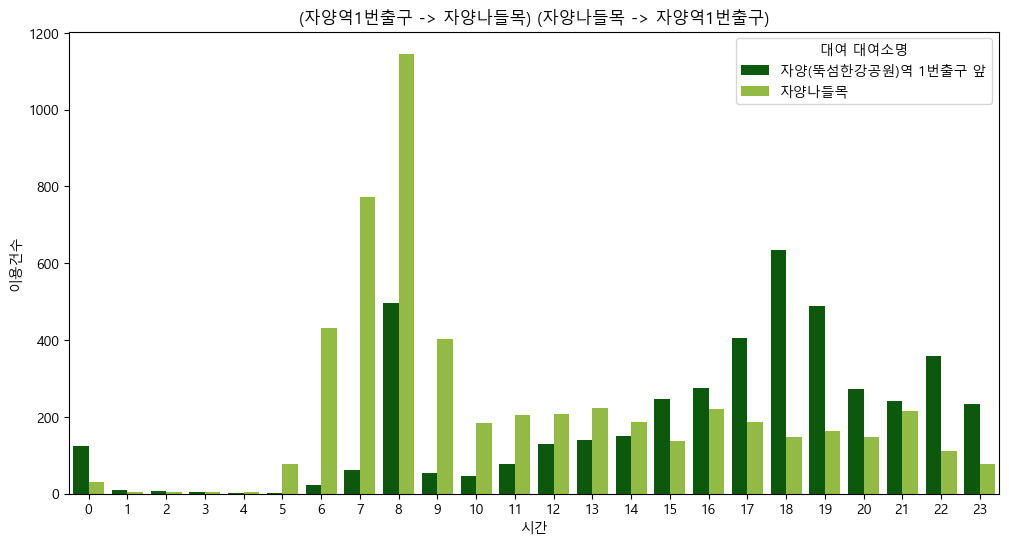

In [ ]:
자양역1번출구_자양나들목 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '자양(뚝섬한강공원)역 1번출구 앞') & (df_2024_대여이력['반납대여소명'] == '자양나들목')) |
             ((df_2024_대여이력['대여 대여소명'] == '자양나들목') & (df_2024_대여이력['반납대여소명'] == '자양(뚝섬한강공원)역 1번출구 앞'))]

자양역1번출구_자양나들목['대여시간'] = pd.to_datetime(자양역1번출구_자양나들목['대여일시']).dt.hour
자양역1번출구_자양나들목_시간별이동 = 자양역1번출구_자양나들목.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(자양역1번출구 -> 자양나들목) (자양나들목 -> 자양역1번출구)")
sns.barplot(data=자양역1번출구_자양나들목_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[3],color_match[0]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```자양역에서는 출근 시간대에 많은 초과 반납이 이루어지고 퇴근시간대에도 어느정도 대여가 이루어지고 있다 ```

- ```자전거가 [주거단지 -> 지하철 역, 상업지역]으로 이동하는 경향을 보임```
- ```아파트나 빌라 같은 거주 단지가 많은 지역에서 자전거를 대여해 초과대여가 일어나고 지하철 역, 상업지역에 반납하면서 초과반납이 일어남.```

### 추가분석 1 - 평일/주말 구분하여 시간대별 이용현황 분석

#### 상왕십리역 주말/평일별 시간대별 이용현황

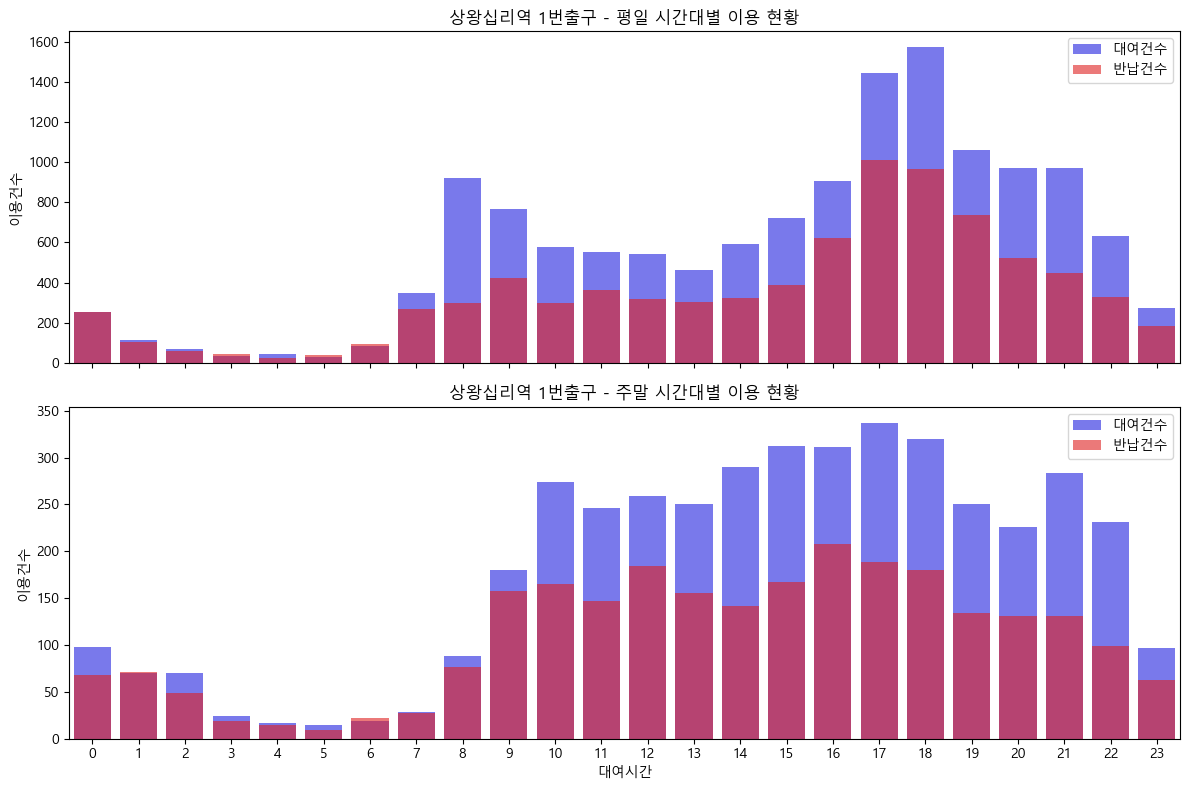

In [ ]:
상왕십리역_1번출구_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '상왕십리역 1번출구']
상왕십리역_1번출구_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '상왕십리역 1번출구']

상왕십리역_1번출구_대여['대여시간'] = pd.to_datetime(상왕십리역_1번출구_대여['대여일시']).dt.hour
상왕십리역_1번출구_반납['반납시간'] = pd.to_datetime(상왕십리역_1번출구_반납['반납일시']).dt.hour

상왕십리역_1번출구_평일_대여현황 = 상왕십리역_1번출구_대여[상왕십리역_1번출구_대여['요일구분'] == '평일']
상왕십리역_1번출구_평일_대여현황 = 상왕십리역_1번출구_평일_대여현황.groupby('대여시간')['대여 대여소명'].value_counts().reset_index(name='대여건수')

상왕십리역_1번출구_평일_반납현황 = 상왕십리역_1번출구_반납[상왕십리역_1번출구_반납['요일구분'] == '평일']
상왕십리역_1번출구_평일_반납현황 = 상왕십리역_1번출구_평일_반납현황.groupby('반납시간')['반납대여소명'].value_counts().reset_index(name='반납건수')


상왕십리역_1번출구_주말_대여현황 = 상왕십리역_1번출구_대여[상왕십리역_1번출구_대여['요일구분'] == '주말']
상왕십리역_1번출구_주말_대여현황 = 상왕십리역_1번출구_주말_대여현황.groupby('대여시간')['대여 대여소명'].value_counts().reset_index(name='대여건수')

상왕십리역_1번출구_주말_반납현황 = 상왕십리역_1번출구_반납[상왕십리역_1번출구_반납['요일구분'] == '주말']
상왕십리역_1번출구_주말_반납현황 = 상왕십리역_1번출구_주말_반납현황.groupby('반납시간')['반납대여소명'].value_counts().reset_index(name='반납건수')

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 평일 그래프 (막대 차트)
sns.barplot(data=상왕십리역_1번출구_평일_대여현황, x='대여시간', y='대여건수', color='blue', alpha=0.6, label='대여건수', ax=axes[0])
sns.barplot(data=상왕십리역_1번출구_평일_반납현황, x='반납시간', y='반납건수', color='red', alpha=0.6, label='반납건수', ax=axes[0])
axes[0].set_title("상왕십리역 1번출구 - 평일 시간대별 이용 현황")
axes[0].set_xlabel("시간")
axes[0].set_ylabel("이용건수")
axes[0].legend()

# 주말 그래프 (막대 차트)
sns.barplot(data=상왕십리역_1번출구_주말_대여현황, x='대여시간', y='대여건수', color='blue', alpha=0.6, label='대여건수', ax=axes[1])
sns.barplot(data=상왕십리역_1번출구_주말_반납현황, x='반납시간', y='반납건수', color='red', alpha=0.6, label='반납건수', ax=axes[1])
axes[1].set_title("상왕십리역 1번출구 - 주말 시간대별 이용 현황")
axes[1].set_ylabel("이용건수")
axes[1].legend()

plt.tight_layout()
plt.show()

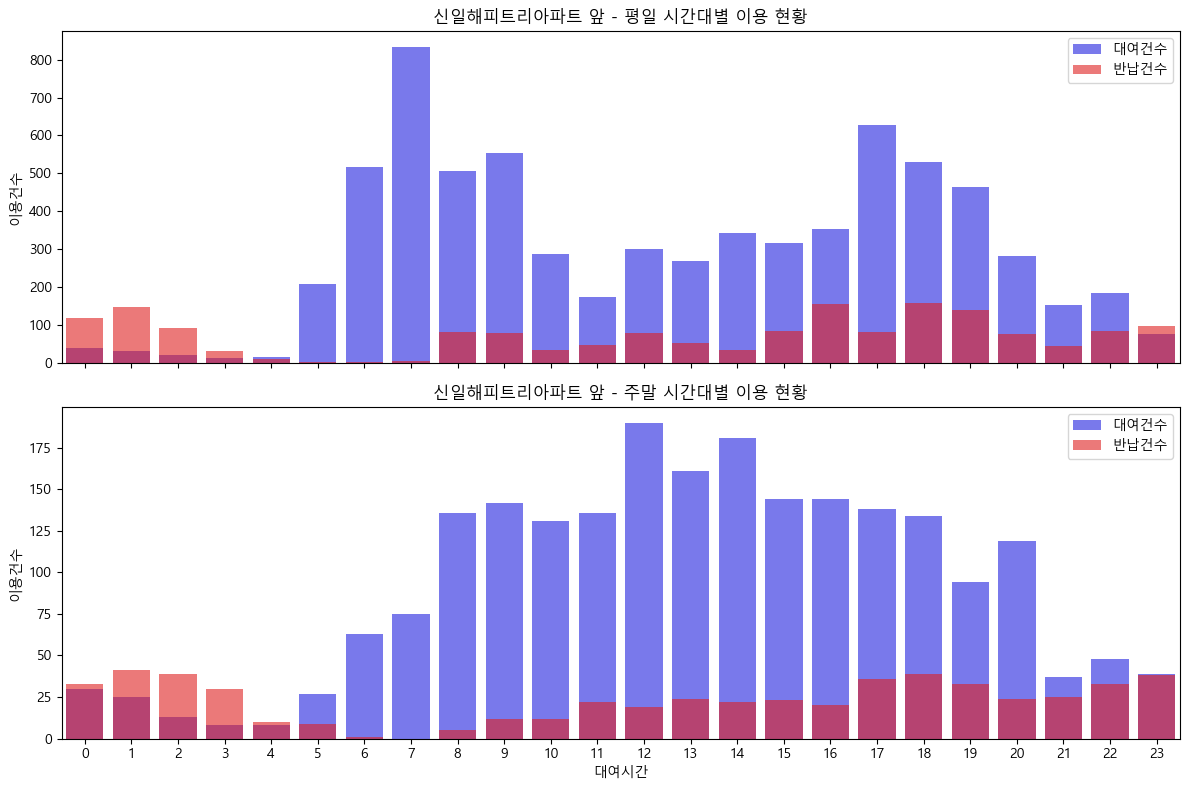

In [ ]:
신일해피트리아파트_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '신일해피트리아파트 앞']
신일해피트리아파트_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '신일해피트리아파트 앞']

신일해피트리아파트_대여['대여시간'] = pd.to_datetime(신일해피트리아파트_대여['대여일시']).dt.hour
신일해피트리아파트_반납['반납시간'] = pd.to_datetime(신일해피트리아파트_반납['반납일시']).dt.hour

신일해피트리아파트_평일_대여현황 = 신일해피트리아파트_대여[신일해피트리아파트_대여['요일구분'] == '평일']
신일해피트리아파트_평일_대여현황 = 신일해피트리아파트_평일_대여현황.groupby('대여시간')['대여 대여소명'].value_counts().reset_index(name='대여건수')

신일해피트리아파트_평일_반납현황 = 신일해피트리아파트_반납[신일해피트리아파트_반납['요일구분'] == '평일']
신일해피트리아파트_평일_반납현황 = 신일해피트리아파트_평일_반납현황.groupby('반납시간')['반납대여소명'].value_counts().reset_index(name='반납건수')


신일해피트리아파트_주말_대여현황 = 신일해피트리아파트_대여[신일해피트리아파트_대여['요일구분'] == '주말']
신일해피트리아파트_주말_대여현황 = 신일해피트리아파트_주말_대여현황.groupby('대여시간')['대여 대여소명'].value_counts().reset_index(name='대여건수')

신일해피트리아파트_주말_반납현황 = 신일해피트리아파트_반납[신일해피트리아파트_반납['요일구분'] == '주말']
신일해피트리아파트_주말_반납현황 = 신일해피트리아파트_주말_반납현황.groupby('반납시간')['반납대여소명'].value_counts().reset_index(name='반납건수')

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 평일 그래프 (막대 차트)
sns.barplot(data=신일해피트리아파트_평일_대여현황, x='대여시간', y='대여건수', color='blue', alpha=0.6, label='대여건수', ax=axes[0])
sns.barplot(data=신일해피트리아파트_평일_반납현황, x='반납시간', y='반납건수', color='red', alpha=0.6, label='반납건수', ax=axes[0])
axes[0].set_title("신일해피트리아파트 앞 - 평일 시간대별 이용 현황")
axes[0].set_xlabel("시간")
axes[0].set_ylabel("이용건수")
axes[0].legend()

# 주말 그래프 (막대 차트)
sns.barplot(data=신일해피트리아파트_주말_대여현황, x='대여시간', y='대여건수', color='blue', alpha=0.6, label='대여건수', ax=axes[1])
sns.barplot(data=신일해피트리아파트_주말_반납현황, x='반납시간', y='반납건수', color='red', alpha=0.6, label='반납건수', ax=axes[1])
axes[1].set_title("신일해피트리아파트 앞 - 주말 시간대별 이용 현황")
axes[1].set_ylabel("이용건수")
axes[1].legend()

plt.tight_layout()
plt.show()

#### 응암역 2번출구 주말/평일별 시간대별 이용현황

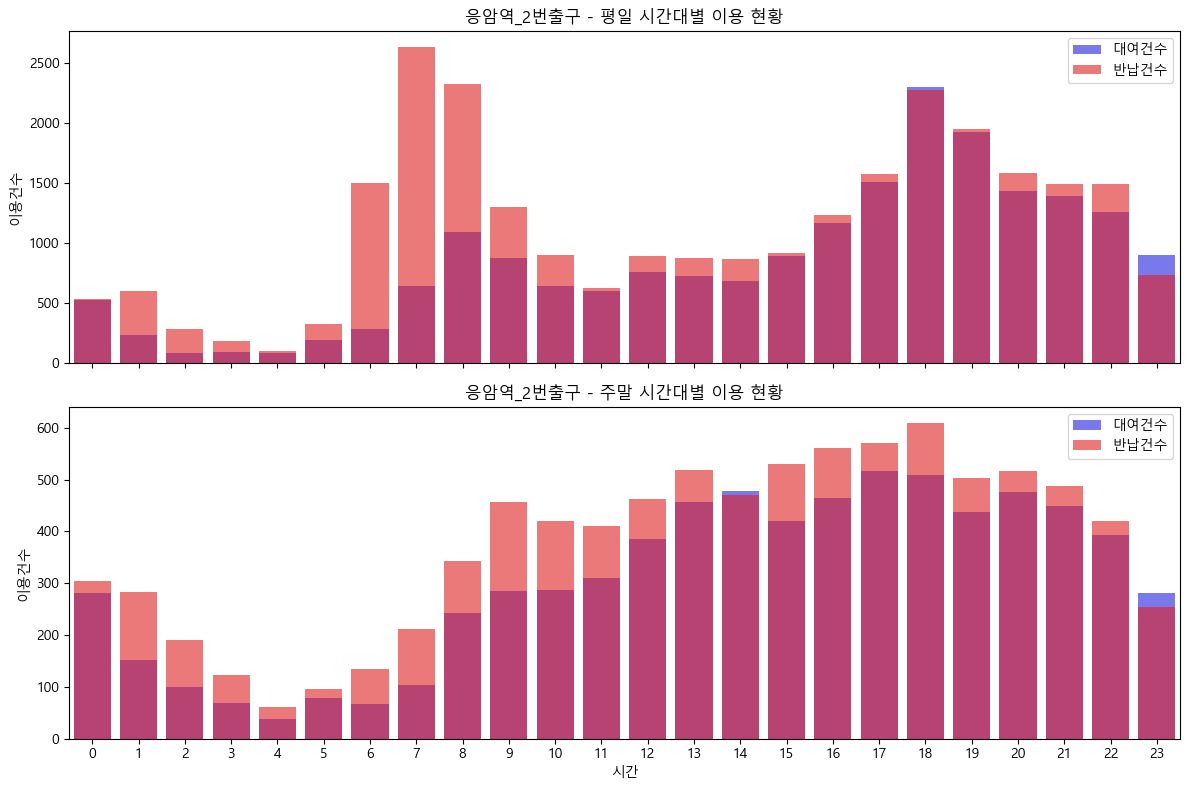

In [ ]:
응암역_2번출구_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '응암역2번출구 국민은행 앞']
응암역_2번출구_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '응암역2번출구 국민은행 앞']

응암역_2번출구_대여['대여시간'] = pd.to_datetime(응암역_2번출구_대여['대여일시']).dt.hour
응암역_2번출구_반납['반납시간'] = pd.to_datetime(응암역_2번출구_반납['반납일시']).dt.hour

응암역_2번출구_평일_대여현황 = 응암역_2번출구_대여[응암역_2번출구_대여['요일구분'] == '평일']
응암역_2번출구_평일_대여현황 = 응암역_2번출구_평일_대여현황.groupby('대여시간')['대여 대여소명'].value_counts().reset_index(name='대여건수')

응암역_2번출구_평일_반납현황 = 응암역_2번출구_반납[응암역_2번출구_반납['요일구분'] == '평일']
응암역_2번출구_평일_반납현황 = 응암역_2번출구_평일_반납현황.groupby('반납시간')['반납대여소명'].value_counts().reset_index(name='반납건수')


응암역_2번출구_주말_대여현황 = 응암역_2번출구_대여[응암역_2번출구_대여['요일구분'] == '주말']
응암역_2번출구_주말_대여현황 = 응암역_2번출구_주말_대여현황.groupby('대여시간')['대여 대여소명'].value_counts().reset_index(name='대여건수')

응암역_2번출구_주말_반납현황 = 응암역_2번출구_반납[응암역_2번출구_반납['요일구분'] == '주말']
응암역_2번출구_주말_반납현황 = 응암역_2번출구_주말_반납현황.groupby('반납시간')['반납대여소명'].value_counts().reset_index(name='반납건수')

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 평일 그래프 (막대 차트)
sns.barplot(data=응암역_2번출구_평일_대여현황, x='대여시간', y='대여건수', color='blue', alpha=0.6, label='대여건수', ax=axes[0])
sns.barplot(data=응암역_2번출구_평일_반납현황, x='반납시간', y='반납건수', color='red', alpha=0.6, label='반납건수', ax=axes[0])
axes[0].set_title("응암역_2번출구 - 평일 시간대별 이용 현황")
axes[0].set_xlabel("시간")
axes[0].set_ylabel("이용건수")
axes[0].legend()

# 주말 그래프 (막대 차트)
sns.barplot(data=응암역_2번출구_주말_대여현황, x='대여시간', y='대여건수', color='blue', alpha=0.6, label='대여건수', ax=axes[1])
sns.barplot(data=응암역_2번출구_주말_반납현황, x='반납시간', y='반납건수', color='red', alpha=0.6, label='반납건수', ax=axes[1])
axes[1].set_title("응암역_2번출구 - 주말 시간대별 이용 현황")
axes[1].set_ylabel("이용건수")
axes[1].legend()

plt.tight_layout()
plt.show()

```평일과 주말사이의 시간대별 이용 추세는 다르지만 평일과 주말 구분에 따른 초과 대여/반납에 대한 유의미한 차이는 잘 보이지 않는다```

### 추가분석 2 - 반경 200m 대여소끼리 클러스터
* 따릉이를 이용할 때 원하는 대여소에 자전거가 없는 경우 인근 대여소를 이용한다는 이용자 특성을 반영한 분석.

In [ ]:
# pip install geopandas
import geopandas as gpd
from shapely.geometry import Point

# 1. 대여소 데이터를 GeoDataFrame으로 변환 (EPSG:4326 = GPS 좌표계)
df_대여소정보['geometry'] = df_대여소정보.apply(lambda row: Point(row['경도'], row['위도']), axis=1)
gdf_대여소 = gpd.GeoDataFrame(df_대여소정보, geometry='geometry', crs="EPSG:4326")

# 2. 거리 연산을 위해 EPSG:5179 (미터 기반) 좌표계로 변환
gdf_대여소_utm = gdf_대여소.to_crs(epsg=5179)

# 3. 반경 200m 버퍼 생성
gdf_대여소_utm['buffer'] = gdf_대여소_utm.geometry.buffer(200)

# 4. 다시 EPSG:4326 (WGS 84)로 변환 (시각화 & 데이터 매칭을 위해)
gdf_대여소_buffer = gdf_대여소_utm.to_crs(epsg=4326)

# 5. 반경 200m 내의 다른 대여소 찾기
gdf_대여소_buffer = gdf_대여소_utm.set_geometry('buffer')
nearby_stations = gpd.sjoin(gdf_대여소_utm, gdf_대여소_buffer, predicate='intersects')

# 자기 자신은 제외
nearby_stations = nearby_stations[nearby_stations['대여소번호_left'] != nearby_stations['대여소번호_right']]

# 결과 확인
nearby_stations = nearby_stations[['대여소번호_left', '보관소(대여소)명_left', '대여소번호_right', '보관소(대여소)명_right']]
nearby_stations.columns = ['기준대여소번호', '기준대여소명', '반경200m대여소번호', '반경200m대여소명']
nearby_stations

기준대여소번호               기준대여소명  반경200m대여소번호               반경200m대여소명
0         301          경복궁역 7번출구 앞          461                  서울지방경찰청
0         301          경복궁역 7번출구 앞         3405                    파크팰리스
4         307            서울역사박물관 앞         4715               돈의문 박물관 마을
5         308            광화문 S타워 앞          309            광화문역 6번출구 옆 B
6         309        광화문역 6번출구 옆 B          310                   청계광장 옆
...       ...                  ...          ...                      ...
2764     4958  고덕래미안힐스테이트 아파트 211동         1033                고덕동 아남아파트
2764     4958  고덕래미안힐스테이트 아파트 211동         3663  암사정수센터교차로(강동롯데캐슬퍼스트아파트)
2764     4958  고덕래미안힐스테이트 아파트 211동         1089        고덕 래미안힐스테이트(201동)
2765     4959         암사역사공원역 3번출구         1032                   선사고등학교
2765     4959         암사역사공원역 3번출구         4956             암사역사공원역 1번출구

[2656 rows x 4 columns]

In [ ]:
# 1. 대여소 데이터를 GeoDataFrame으로 변환 (EPSG:4326 = GPS 좌표계)
df_대여소정보['geometry'] = df_대여소정보.apply(lambda row: Point(row['경도'], row['위도']), axis=1)
gdf_대여소 = gpd.GeoDataFrame(df_대여소정보, geometry='geometry', crs="EPSG:4326")

# 2. 거리 연산을 위해 EPSG:5179 (미터 기반) 좌표계로 변환
gdf_대여소_utm = gdf_대여소.to_crs(epsg=5179)

# 3. 반경 200m 버퍼 생성
gdf_대여소_utm['buffer'] = gdf_대여소_utm.geometry.buffer(200)

# 4. 다시 EPSG:4326 (WGS 84)로 변환 (시각화 & 데이터 매칭을 위해)
gdf_대여소_buffer = gdf_대여소_utm.to_crs(epsg=4326)

# 5. 반경 200m 내의 다른 대여소 찾기
gdf_대여소_buffer = gdf_대여소_utm.set_geometry('buffer')
nearby_stations = gpd.sjoin(gdf_대여소_utm, gdf_대여소_buffer, predicate='intersects')

# 자기 자신은 제외
nearby_stations = nearby_stations[nearby_stations['대여소번호_left'] != nearby_stations['대여소번호_right']]

# 결과 확인
nearby_stations = nearby_stations[['대여소번호_left', '보관소(대여소)명_left', '대여소번호_right', '보관소(대여소)명_right']]
nearby_stations.columns = ['기준대여소번호', '기준대여소명', '반경200m대여소번호', '반경200m대여소명']
nearby_stations

기준대여소번호               기준대여소명  반경200m대여소번호               반경200m대여소명
0         301          경복궁역 7번출구 앞          461                  서울지방경찰청
0         301          경복궁역 7번출구 앞         3405                    파크팰리스
4         307            서울역사박물관 앞         4715               돈의문 박물관 마을
5         308            광화문 S타워 앞          309            광화문역 6번출구 옆 B
6         309        광화문역 6번출구 옆 B          310                   청계광장 옆
...       ...                  ...          ...                      ...
2764     4958  고덕래미안힐스테이트 아파트 211동         1033                고덕동 아남아파트
2764     4958  고덕래미안힐스테이트 아파트 211동         3663  암사정수센터교차로(강동롯데캐슬퍼스트아파트)
2764     4958  고덕래미안힐스테이트 아파트 211동         1089        고덕 래미안힐스테이트(201동)
2765     4959         암사역사공원역 3번출구         1032                   선사고등학교
2765     4959         암사역사공원역 3번출구         4956             암사역사공원역 1번출구

[2656 rows x 4 columns]

In [ ]:
nearby_stations[nearby_stations['기준대여소명'] == '상왕십리역 1번출구']

기준대여소번호      기준대여소명  반경200m대여소번호     반경200m대여소명
274     3513  상왕십리역 1번출구          520  상왕십리역 4번 출구 앞
274     3513  상왕십리역 1번출구         3547   상왕십리역 6번 출입구

In [ ]:
nearby_stations[nearby_stations['기준대여소명'] == '신일해피트리아파트 앞']

Empty DataFrame
Columns: [기준대여소번호, 기준대여소명, 반경200m대여소번호, 반경200m대여소명]
Index: []

In [ ]:
nearby_stations[nearby_stations['기준대여소명'] == '응암역2번출구 국민은행 앞']

기준대여소번호          기준대여소명  반경200m대여소번호          반경200m대여소명
1046      996  응암역2번출구 국민은행 앞          907             CJ 드림시티
1046      996  응암역2번출구 국민은행 앞         4665  응암역3번 출구(서부경찰서 방면)

In [ ]:
nearby_stations[nearby_stations['기준대여소명'] == '자양(뚝섬한강공원)역 1번출구 앞']

Empty DataFrame
Columns: [기준대여소번호, 기준대여소명, 반경200m대여소번호, 반경200m대여소명]
Index: []

In [ ]:
대여반납횟수_df[대여반납횟수_df['대여소명'].isin(['응암역2번출구 국민은행 앞', 'CJ 드림시티', '응암역3번 출구(서부경찰서 방면)'])]

대여소명   대여횟수   반납횟수  대여/반납 차이
14               CJ 드림시티  28240  32369      4129
2186      응암역2번출구 국민은행 앞  27554  36122      8568
2187  응암역3번 출구(서부경찰서 방면)   3168   4014       846

In [ ]:
대여반납횟수_df[대여반납횟수_df['대여소명'].isin(['상왕십리역 1번출구', '상왕십리역 6번 출입구', '상왕십리역 4번 출구 앞'])]

대여소명   대여횟수   반납횟수  대여/반납 차이
1317     상왕십리역 1번출구  18240  11033     -7207
1318  상왕십리역 4번 출구 앞   6890   5760     -1130
1319   상왕십리역 6번 출입구   5742   3490     -2252

```상위권의 초과대여/반납된 대여소를 반경 200m로 묶었을 때는 자양역 1번출구 앞이나 신일해피트리아파트 앞의 대여소는 반경 200m안에 다른 대여소가 없었고```

```상왕십리역 1번출구와 응암역2번출구는 반경 200m안의 대여소들도 모두 초과 대여나 초과 반납이 발생하고 있는 대여소들이라 묶어서 해결할 수 있는 상황은 아닌 것으로 보임```

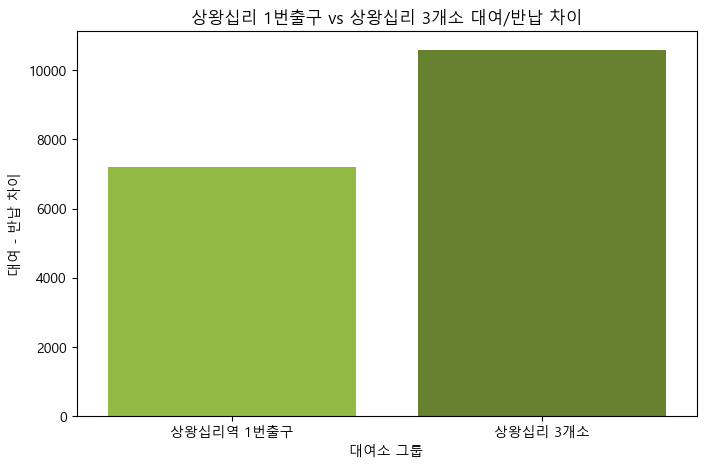

In [ ]:
# 3개 정거장 리스트
target_stations = ['상왕십리역 1번출구', '상왕십리역 6번 출입구', '상왕십리역 4번 출구 앞']

# 상왕십리역 1번출구 대여/반납 횟수
대여_1번출구 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '상왕십리역 1번출구'].shape[0]
반납_1번출구 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '상왕십리역 1번출구'].shape[0]
차이_1번출구 = 대여_1번출구 - 반납_1번출구

# 3개 정거장의 대여/반납 횟수
대여_3개소 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'].isin(target_stations)].shape[0]
반납_3개소 = df_2024_대여이력[df_2024_대여이력['반납대여소명'].isin(target_stations)].shape[0]
차이_3개소 = 대여_3개소 - 반납_3개소

data = pd.DataFrame({
    '대여소 그룹': ['상왕십리역 1번출구', '상왕십리 3개소'],
    '대여/반납 차이': [차이_1번출구, 차이_3개소]
})


plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='대여소 그룹', y='대여/반납 차이', palette=color_match)
plt.title("상왕십리 1번출구 vs 상왕십리 3개소 대여/반납 차이")
plt.xlabel("대여소 그룹")
plt.ylabel("대여 - 반납 차이")
plt.show()

In [ ]:
test1 = nearby_stations.merge(대여반납횟수_df[['대여소명','대여/반납 차이']],
                              left_on='기준대여소명', right_on='대여소명',
                              how='left')
test1 = test1.drop('대여소명', axis=1)
test1 = test1.merge(대여반납횟수_df[['대여소명','대여/반납 차이']],
                              left_on='반경200m대여소명', right_on='대여소명',
                              how='left')
test1 = test1.drop('대여소명', axis=1)
test1 = test1.dropna()
test1 = test1.rename(columns={'대여/반납 차이_x' :'기준대여소 대여/반납 현황', '대여/반납 차이_y' :'반경 200m대여소 대여/반납 현황'})
test1

기준대여소번호         기준대여소명  반경200m대여소번호     반경200m대여소명  기준대여소 대여/반납 현황  \
0         301    경복궁역 7번출구 앞          461        서울지방경찰청         -3528.0   
1         301    경복궁역 7번출구 앞         3405          파크팰리스         -3528.0   
2         307      서울역사박물관 앞         4715     돈의문 박물관 마을          -623.0   
3         308      광화문 S타워 앞          309  광화문역 6번출구 옆 B          -661.0   
4         309  광화문역 6번출구 옆 B          310         청계광장 옆         -1369.0   
...       ...            ...          ...            ...             ...   
2595     5872        서경팰리스 앞          235     신길동 우리은행 옆           286.0   
2596     6057    을지로5가(방산시장)          387     훈련원공원주차장 앞           165.0   
2597     6058    서울도시건축전시관 옆         4768      서울도시건축전시관         -1535.0   
2598     6059          덕수중학교          473    을지로4가역 9번출구            37.0   
2599     6173    서울자동차운전전문학원         3770      남부순환로 205          -141.0   

      반경 200m대여소 대여/반납 현황  
0                    71.0  
1                  -610.0  
2                  -378.0  
3                 -1369.0  
4                  -604.0  
...                   ...  
2595               -510.0  
2596               -615.0  
2597                113.0  
2598               -533.0  
2599               -735.0  

[2398 rows x 6 columns]

- (기준대여소는 초과대여이지만 반경 200m안의 대여소는 초과반납인 대여소) or (기준대여소는 초과반납이지만 반경 200m안의 대여소는 초과대여인 대여소)만 뽑는다면 이 지역들은 시민참여로 해결 가능할 수 있지 않을까?

In [ ]:
check_test1 = test1[(test1['기준대여소 대여/반납 현황'] > 0) & (test1['반경 200m대여소 대여/반납 현황'] < 0)]
check_test1

기준대여소번호               기준대여소명  반경200m대여소번호            반경200m대여소명  \
13        329           청계2가 사거리 옆         4785                롯데시티호텔   
16        329           청계2가 사거리 옆         3432              종로2가 사거리   
18        335        종로3가역 15번출구 앞         4707              청계3가 사거리   
42        368            SK 서린빌딩 앞          318              광교사거리 남측   
44        368            SK 서린빌딩 앞          316            종각역 1번출구 앞   
...       ...                  ...          ...                   ...   
2578     4931  디에이치퍼스티어아이파크 124동 앞         2358  구룡초사거리 (현대아파트10동 앞 )   
2594     5872              서경팰리스 앞         3211           신길 래미안 프레비뉴   
2595     5872              서경팰리스 앞          235            신길동 우리은행 옆   
2596     6057          을지로5가(방산시장)          387            훈련원공원주차장 앞   
2598     6059                덕수중학교          473           을지로4가역 9번출구   

      기준대여소 대여/반납 현황  반경 200m대여소 대여/반납 현황  
13             409.0               -244.0  
16             409.0               -689.0  
18              90.0                -26.0  
42            1514.0               -772.0  
44            1514.0               -623.0  
...              ...                  ...  
2578            21.0               -273.0  
2594           286.0               -383.0  
2595           286.0               -510.0  
2596           165.0               -615.0  
2598            37.0               -533.0  

[395 rows x 6 columns]

In [ ]:
check_test2 = test1[(test1['기준대여소 대여/반납 현황'] < 0) & (test1['반경 200m대여소 대여/반납 현황'] > 0)]
check_test2

기준대여소번호               기준대여소명  반경200m대여소번호              반경200m대여소명  \
0         301          경복궁역 7번출구 앞          461                 서울지방경찰청   
6         309        광화문역 6번출구 옆 B         4718           광화문역 6번출구 옆 A   
8         316           종각역 1번출구 앞          368               SK 서린빌딩 앞   
9         316           종각역 1번출구 앞          385                종각역 5번출구   
24        340              혜화동 로터리          388                 동성중학교 앞   
...       ...                  ...          ...                     ...   
2580     4933  디에이치퍼스티어아이파크 159동 앞         2390  구룡마을 입구 (래미안블레스티지 아파트)   
2590     5339          은빛1단지 아파트 앞         1652                   파르코 앞   
2592     5779                  나래교         2650        위례22단지 2208동 다리앞   
2593     5779                  나래교         1263                 장지공영차고지   
2597     6058          서울도시건축전시관 옆         4768               서울도시건축전시관   

      기준대여소 대여/반납 현황  반경 200m대여소 대여/반납 현황  
0            -3528.0                 71.0  
6            -1369.0                274.0  
8             -623.0               1514.0  
9             -623.0                228.0  
24             -78.0                150.0  
...              ...                  ...  
2580           -70.0                102.0  
2590           -97.0                 45.0  
2592           -82.0                201.0  
2593           -82.0                364.0  
2597         -1535.0                113.0  

[395 rows x 6 columns]

In [ ]:
check_test3 = test1[((test1['기준대여소 대여/반납 현황'] > 0) & (test1['반경 200m대여소 대여/반납 현황'] < 0)) | (test1['기준대여소 대여/반납 현황'] < 0) & (test1['반경 200m대여소 대여/반납 현황'] > 0)]
check_test3

기준대여소번호         기준대여소명  반경200m대여소번호     반경200m대여소명  기준대여소 대여/반납 현황  \
0         301    경복궁역 7번출구 앞          461        서울지방경찰청         -3528.0   
6         309  광화문역 6번출구 옆 B         4718  광화문역 6번출구 옆 A         -1369.0   
8         316     종각역 1번출구 앞          368      SK 서린빌딩 앞          -623.0   
9         316     종각역 1번출구 앞          385       종각역 5번출구          -623.0   
13        329     청계2가 사거리 옆         4785         롯데시티호텔           409.0   
...       ...            ...          ...            ...             ...   
2594     5872        서경팰리스 앞         3211    신길 래미안 프레비뉴           286.0   
2595     5872        서경팰리스 앞          235     신길동 우리은행 옆           286.0   
2596     6057    을지로5가(방산시장)          387     훈련원공원주차장 앞           165.0   
2597     6058    서울도시건축전시관 옆         4768      서울도시건축전시관         -1535.0   
2598     6059          덕수중학교          473    을지로4가역 9번출구            37.0   

      반경 200m대여소 대여/반납 현황  
0                    71.0  
6                   274.0  
8                  1514.0  
9                   228.0  
13                 -244.0  
...                   ...  
2594               -383.0  
2595               -510.0  
2596               -615.0  
2597                113.0  
2598               -533.0  

[790 rows x 6 columns]

 - 반경 200m안의 대여소들중 차이가 나는 대여소는 790건 정도이고 수치 차이가 커서 도움이 되지 않는 곳도 있겠지만, 도움되는 곳이 있을 것이라고 생각

### 추가분석 3 - 초과 대여/반납 원인 분석(지역특성 및 지형)
* 신뢰구간 95%를 벗어나는 집단 내에서 유의미한 값을 가지는 대여소를 선정함.
* 이러한 대여소는 원인 분석에 용이하다는 판단.

In [ ]:
대여반납횟수_df = 대여반납횟수_df.merge(df_대여소정보[['위도','경도','보관소(대여소)명','자치구']],
                                      left_on='대여소명', right_on='보관소(대여소)명',
                                      how='left')

대여소명   대여횟수   반납횟수  대여/반납 차이         위도          경도  \
1317                상왕십리역 1번출구  18240  11033     -7207  37.564610  127.029198   
1761               신일해피트리아파트 앞   9318   2286     -7032  37.517059  126.848488   
1426              서울시립대 정문 앞 B  15603   9320     -6283  37.583698  127.053856   
2081  우장산역 1번출구옆(우장산아이파크105동앞)  16105  10004     -6101  37.548908  126.836563   
333                   광진광장 교통섬  29359  24070     -5289  37.547829  127.072632   
...                        ...    ...    ...       ...        ...         ...   
65               LG사이언스파크 E14동  24778  30824      6046  37.563496  126.835831   
2578                한강공원 망원나들목  80997  87263      6266  37.555576  126.896889   
2240        자양(뚝섬한강공원)역 1번출구 앞  78700  86623      7923        NaN         NaN   
2700              홍대입구역 2번출구 앞  40787  49161      8374  37.557438  126.923821   
2186            응암역2번출구 국민은행 앞  27545  36110      8565  37.599968  126.915726   

                     보관소(대여소)명   자치구  
1317                상왕십리역 1번출구   성동구  
1761               신일해피트리아파트 앞   양천구  
1426              서울시립대 정문 앞 B  동대문구  
2081  우장산역 1번출구옆(우장산아이파크105동앞)   강서구  
333                   광진광장 교통섬   광진구  
...                        ...   ...  
65               LG사이언스파크 E14동   강서구  
2578                한강공원 망원나들목   마포구  
2240                       NaN   NaN  
2700              홍대입구역 2번출구 앞   마포구  
2186            응암역2번출구 국민은행 앞   은평구  

[2768 rows x 8 columns]

In [ ]:
df = 대여반납횟수_df.sort_values('대여/반납 차이').copy()
mean_diff = df['대여/반납 차이'].mean()
std_diff = df['대여/반납 차이'].std()

대여소명   대여횟수   반납횟수  대여/반납 차이         위도          경도  \
1317                상왕십리역 1번출구  18240  11033     -7207  37.564610  127.029198   
1761               신일해피트리아파트 앞   9318   2286     -7032  37.517059  126.848488   
1426              서울시립대 정문 앞 B  15603   9320     -6283  37.583698  127.053856   
2081  우장산역 1번출구옆(우장산아이파크105동앞)  16105  10004     -6101  37.548908  126.836563   
333                   광진광장 교통섬  29359  24070     -5289  37.547829  127.072632   
...                        ...    ...    ...       ...        ...         ...   
65               LG사이언스파크 E14동  24778  30824      6046  37.563496  126.835831   
2578                한강공원 망원나들목  80997  87263      6266  37.555576  126.896889   
2240        자양(뚝섬한강공원)역 1번출구 앞  78700  86623      7923        NaN         NaN   
2700              홍대입구역 2번출구 앞  40787  49161      8374  37.557438  126.923821   
2186            응암역2번출구 국민은행 앞  27545  36110      8565  37.599968  126.915726   

                     보관소(대여소)명   자치구  
1317                상왕십리역 1번출구   성동구  
1761               신일해피트리아파트 앞   양천구  
1426              서울시립대 정문 앞 B  동대문구  
2081  우장산역 1번출구옆(우장산아이파크105동앞)   강서구  
333                   광진광장 교통섬   광진구  
...                        ...   ...  
65               LG사이언스파크 E14동   강서구  
2578                한강공원 망원나들목   마포구  
2240                       NaN   NaN  
2700              홍대입구역 2번출구 앞   마포구  
2186            응암역2번출구 국민은행 앞   은평구  

[162 rows x 8 columns]

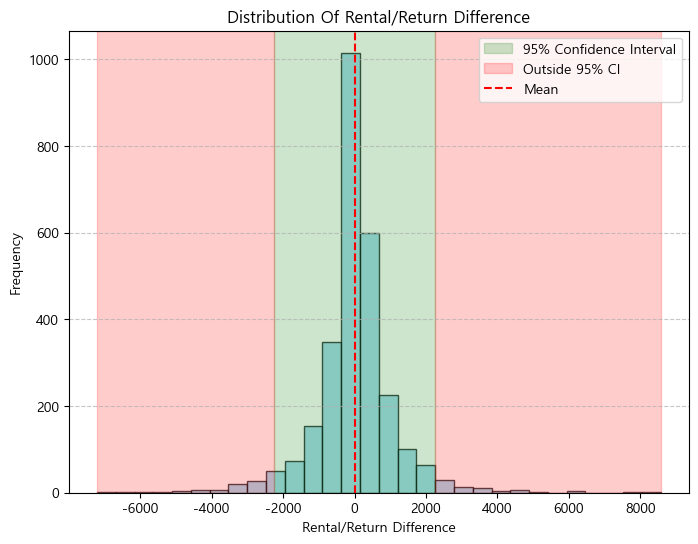

In [ ]:
# 신뢰구간 95%  히스토그램

# 신뢰구간 계산 (95% CI)
threshold = 2 * std_diff
ci_2 = (mean_diff - 2*std_diff, mean_diff + 2*std_diff)

plt.figure(figsize=(8, 6))
plt.hist(df['대여/반납 차이'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# 신뢰구간 배경 강조
plt.axvspan(ci_2[0], ci_2[1], color='green', alpha=0.2, label='95% Confidence Interval')

# 신뢰구간 외부 부분을 빨간색으로 강조
plt.axvspan(min(df['대여/반납 차이']), ci_2[0], color='red', alpha=0.2, label='Outside 95% CI')
plt.axvspan(ci_2[1], max(df['대여/반납 차이']), color='red', alpha=0.2)

# 평균선 추가
plt.axvline(mean_diff, color='red', linestyle='--', label='Mean')

# 제목 및 레이블 설정
plt.title('Distribution Of Rental/Return Difference')
plt.xlabel('Rental/Return Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
df_significant_diff = df[(df['대여/반납 차이'] > mean_diff + threshold) | (df['대여/반납 차이'] < mean_diff - threshold)]

# Display the identified stations
display(df_significant_diff)
df_significant_diff.describe()

대여횟수          반납횟수     대여/반납 차이          위도          경도
count    162.000000    162.000000   162.000000  158.000000  158.000000
mean   16184.339506  15838.209877  -346.129630   37.552106  126.971228
std    13169.029897  15341.410220  3555.493456    0.045972    0.096125
min     3181.000000    314.000000 -7207.000000   37.470928  126.820847
25%     6872.250000   4176.500000 -3058.500000   37.517129  126.896557
50%    11852.500000  11784.000000 -2390.000000   37.553719  126.949993
75%    21225.750000  23401.750000  2788.500000   37.581809  127.065376
max    80997.000000  87263.000000  8565.000000   37.664188  127.173973

In [ ]:
df_significant_diff.dropna(subset=['위도', '경도', '보관소(대여소)명', '자치구'], inplace=True)
print("\nMissing Values after handling:\n", df_significant_diff.isnull().sum())


Missing Values after handling:
 대여소명         0
대여횟수         0
반납횟수         0
대여/반납 차이     0
위도           0
경도           0
보관소(대여소)명    0
자치구          0
dtype: int64


In [ ]:
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 초과대여/초과반납 데이터 시각화
for index, row in df_significant_diff.iterrows():
    if row['대여/반납 차이'] > 0:
        color = 'blue'  # 초과반납
    else:
        color = 'red'  # 초과대여ㅍ

    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['대여소명']} (Difference: {row['대여/반납 차이']})"
    ).add_to(seoul_map)

# 범례 추가
legend_html = """
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 200px; height: 90px; 
    background-color: white; z-index:9999; font-size:14px;
    border-radius: 8px; padding: 10px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
">
    <b>범례</b> <br>
    <span style="color: red;">&#9679;</span> 초과대여 <br>
    <span style="color: blue;">&#9679;</span> 초과반납
</div>
"""

seoul_map.get_root().html.add_child(folium.Element(legend_html))

# 지도 출력
display(seoul_map)


In [ ]:
# 초과 대여/반납 자치구 개수
district_counts = df_significant_diff['자치구'].value_counts()
print("Frequency of stations with significant differences in each district:\n", district_counts)

# 초과반납 자치구 개수
excess_return_districts = df_significant_diff[df_significant_diff['대여/반납 차이'] > 0]['자치구'].value_counts()
excess_return_districts = excess_return_districts.reset_index(name='대여소 수')

# 초과대여 자치구 개수
excess_rental_districts = df_significant_diff[df_significant_diff['대여/반납 차이'] < 0]['자치구'].value_counts()
excess_rental_districts = excess_rental_districts.reset_index(name='대여소 수')

Frequency of stations with significant differences in each district:
 자치구
강서구     17
노원구     14
영등포구    13
은평구     12
마포구     10
양천구     10
구로구      9
중랑구      8
강동구      7
송파구      6
성동구      6
강남구      6
중구       5
광진구      5
종로구      5
동대문구     4
동작구      4
금천구      3
서초구      3
성북구      3
용산구      2
도봉구      2
서대문구     2
관악구      2
Name: count, dtype: int64


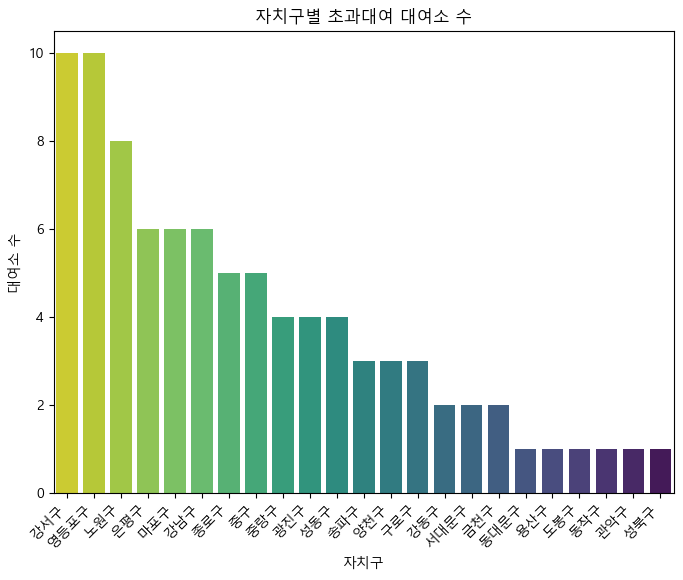

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = excess_rental_districts, x='자치구', y='대여소 수', palette='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.xlabel('자치구')
plt.ylabel('대여소 수')
plt.title('자치구별 초과대여 대여소 수')
plt.show()

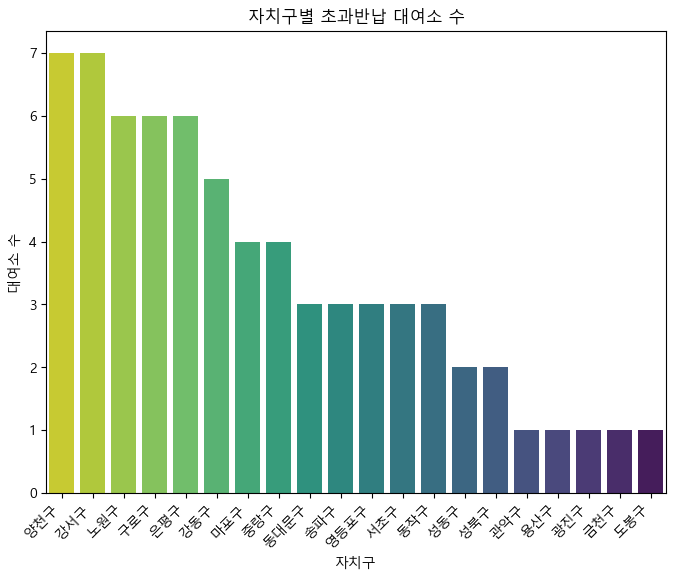

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = excess_return_districts, x='자치구', y='대여소 수', palette='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.xlabel('자치구')
plt.ylabel('대여소 수')
plt.title('자치구별 초과반납 대여소 수')
plt.show()

### 강서구 마곡지역 추가분석
* 회사 - 대중교통 조합을 분석하기 위해 초과대여가 일어나는 마곡역과 초과 반납이 일어나는 LG사이언스파크 대여소의 시간대별 이용을 추가 분석했다.

In [ ]:
대여반납횟수_df[대여반납횟수_df['대여소명'] == 'LG사이언스파크 E14동']

대여소명   대여횟수   반납횟수  대여/반납 차이         위도          경도  \
65  LG사이언스파크 E14동  24778  30824      6046  37.563496  126.835831   

        보관소(대여소)명  자치구  
65  LG사이언스파크 E14동  강서구

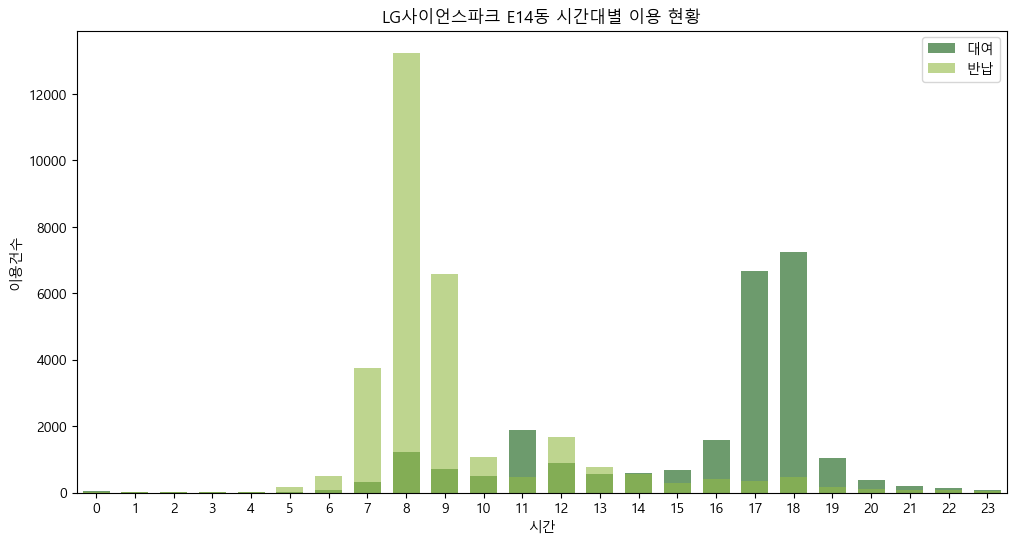

In [ ]:
# LG사이언스파크 E14동
LG사이언스파크_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == 'LG사이언스파크 E14동']
LG사이언스파크_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == 'LG사이언스파크 E14동']

LG사이언스파크_대여['대여시간'] = pd.to_datetime(LG사이언스파크_대여['대여일시']).dt.hour
LG사이언스파크_반납['반납시간'] = pd.to_datetime(LG사이언스파크_반납['반납일시']).dt.hour

LG사이언스파크_대여 = LG사이언스파크_대여.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')
LG사이언스파크_반납 = LG사이언스파크_반납.groupby('반납대여소명')['반납시간'].value_counts().reset_index(name='반납건수')

plt.figure(figsize=(12, 6))
plt.title("LG사이언스파크 E14동 시간대별 이용 현황")
sns.barplot(data=LG사이언스파크_대여, x='대여시간', y='대여건수', color=color_match[3], alpha=0.6, label='대여', width=0.7)
sns.barplot(data=LG사이언스파크_반납, x='반납시간', y='반납건수', color=color_match[0], alpha=0.6, label='반납', width=0.7)
plt.legend()
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.show()

In [ ]:
# LG사이언스파크_E14동 앞에서 대여해서 어디로 많이 반납하는지 확인
LG사이언스파크_E14동_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == 'LG사이언스파크 E14동']

반납_대여소_분포 = LG사이언스파크_E14동_대여['반납대여소명'].value_counts().reset_index(name='반납횟수')
반납_대여소_분포.head(10)

반납대여소명  반납횟수
0               마곡나루역 3번 출구  7018
1               마곡나루역 2번 출구  2168
2         발산역 1번, 9번 인근 대여소  1951
3               양천향교역 7번출구앞   945
4              (재)FITI시험연구원   927
5             LG사이언스파크 E14동   895
6             마곡나루역 5번출구 뒤편   784
7              서울식물원 잔디마당 앞   626
8              등촌1-10단지 교차로   325
9  증미역 3번출구뒤(등촌두산위브센티움오피스텔)   324

In [ ]:
# 어디서 대여해서 LG사이언스파크_E14동 앞으로 반납하는지 확인
LG사이언스파크_E14동_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == 'LG사이언스파크 E14동']

대여_대여소_분포 = LG사이언스파크_E14동_반납['대여 대여소명'].value_counts().reset_index(name='대여횟수')
대여_대여소_분포.head(10)

대여 대여소명  대여횟수
0      마곡나루역 5번출구 뒤편  5915
1        마곡나루역 3번 출구  3629
2        마곡나루역 2번 출구  2773
3        양천향교역 7번출구앞  1805
4       (재)FITI시험연구원  1590
5  발산역 1번, 9번 인근 대여소  1508
6       LG사이언스파크 W4동  1001
7      LG사이언스파크 E14동   895
8       등촌1-10단지 교차로   483
9          양천향교역8번출구   435

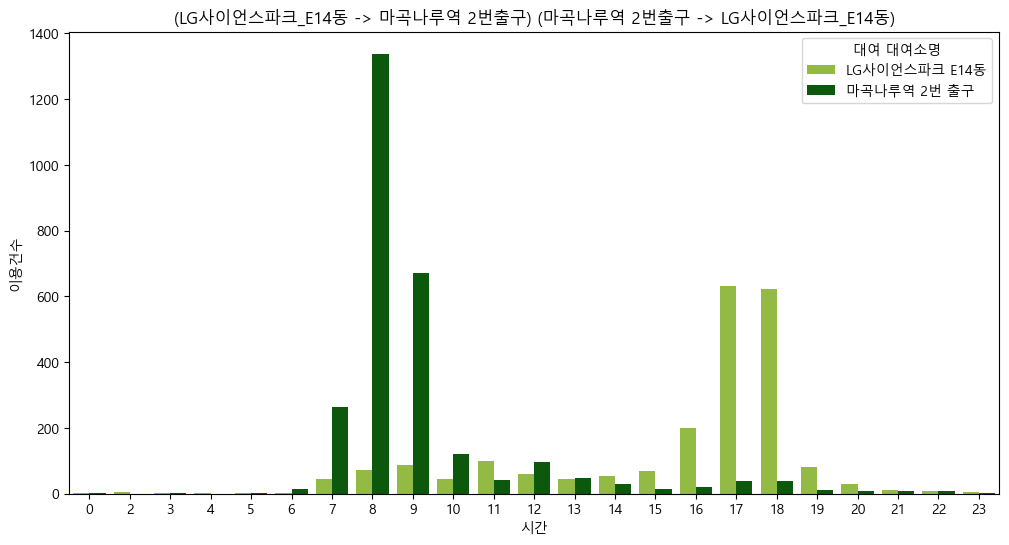

In [ ]:
LG사이언스파크_E14동_마곡나루역2번출구 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == 'LG사이언스파크 E14동') & (df_2024_대여이력['반납대여소명'] == '마곡나루역 2번 출구')) |
             ((df_2024_대여이력['대여 대여소명'] == '마곡나루역 2번 출구') & (df_2024_대여이력['반납대여소명'] == 'LG사이언스파크 E14동'))]

LG사이언스파크_E14동_마곡나루역2번출구['대여시간'] = pd.to_datetime(LG사이언스파크_E14동_마곡나루역2번출구['대여일시']).dt.hour
LG사이언스파크_E14동_마곡나루역2번출구_시간별이동 = LG사이언스파크_E14동_마곡나루역2번출구.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(LG사이언스파크_E14동 -> 마곡나루역 2번출구) (마곡나루역 2번출구 -> LG사이언스파크_E14동)")
sns.barplot(data=LG사이언스파크_E14동_마곡나루역2번출구_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```출근 시간대 LG사이언스파크 E14동(회사)로 많은 반납이 이루어지고 있고, 퇴근 시간대  LG사이언스파크 E14동(회사)에서 많은 대여가 이루어지고 있습니다.```
- ```LG사이언스파크 E14동과 많은 대여반납이 이루어진 마곡나루역 2번출구와 조합해서 시간대별로 이용현황을 봤을 때 대중교통 -> 회사/상업 지역으로 이동하는 패턴을 보이는 것을 확인할 수 있습니다.```

In [ ]:
대여반납횟수_df[대여반납횟수_df['대여소명'] == '발산역 1번, 9번 인근 대여소']

대여소명   대여횟수   반납횟수  대여/반납 차이         위도          경도  \
1071  발산역 1번, 9번 인근 대여소  63501  60442     -3059  37.558949  126.837174   

              보관소(대여소)명  자치구  
1071  발산역 1번, 9번 인근 대여소  강서구

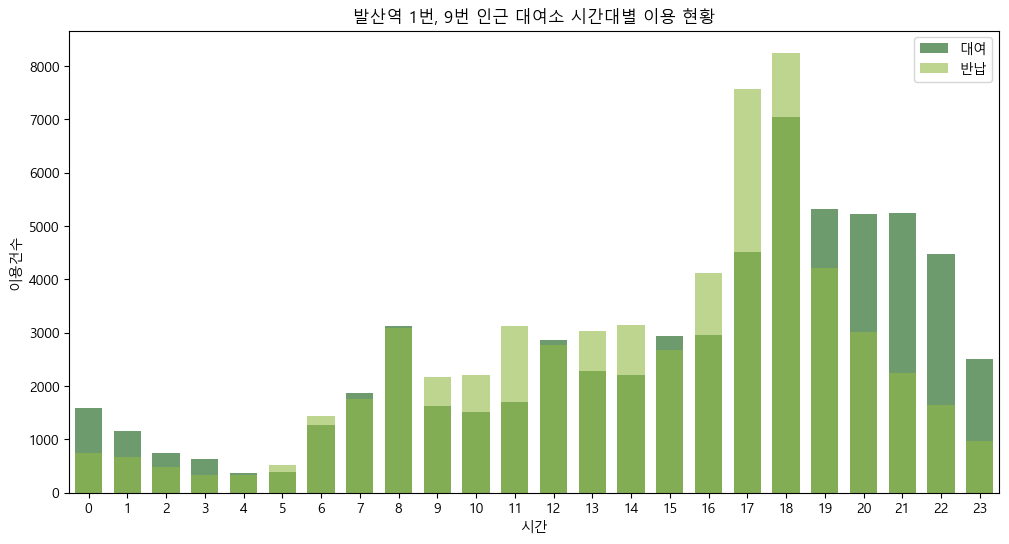

In [ ]:
# 발산역 1번, 9번 인근 대여소
발산역_1번_9번_인근_대여소_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '발산역 1번, 9번 인근 대여소']
발산역_1번_9번_인근_대여소_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '발산역 1번, 9번 인근 대여소']

발산역_1번_9번_인근_대여소_대여['대여시간'] = pd.to_datetime(발산역_1번_9번_인근_대여소_대여['대여일시']).dt.hour
발산역_1번_9번_인근_대여소_반납['반납시간'] = pd.to_datetime(발산역_1번_9번_인근_대여소_반납['반납일시']).dt.hour

발산역_1번_9번_인근_대여소_대여 = 발산역_1번_9번_인근_대여소_대여.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')
발산역_1번_9번_인근_대여소_반납 = 발산역_1번_9번_인근_대여소_반납.groupby('반납대여소명')['반납시간'].value_counts().reset_index(name='반납건수')

plt.figure(figsize=(12, 6))
plt.title("발산역 1번, 9번 인근 대여소 시간대별 이용 현황")
sns.barplot(data=발산역_1번_9번_인근_대여소_대여, x='대여시간', y='대여건수', color=color_match[3], alpha=0.6, label='대여', width=0.7)
sns.barplot(data=발산역_1번_9번_인근_대여소_반납, x='반납시간', y='반납건수', color=color_match[0], alpha=0.6, label='반납', width=0.7)
plt.legend()
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.show()

In [ ]:
# LG사이언스파크_E14동 앞에서 대여해서 어디로 많이 반납하는지 확인
발산역_1번_9번_인근_대여소_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '발산역 1번, 9번 인근 대여소']

반납_대여소_분포 = 발산역_1번_9번_인근_대여소_대여['반납대여소명'].value_counts().reset_index(name='반납횟수')
반납_대여소_분포.head(10)

반납대여소명  반납횟수
0    등촌1-10단지 교차로  3191
1     양천향교역 7번출구앞  2535
2       강서구립등빛도서관  1737
3     마곡나루역 2번 출구  1627
4      마곡센트럴타워 1차  1559
5   LG사이언스파크 E14동  1508
6     LG유플러스 마곡사옥  1383
7    그랜드아이파크아파트 앞  1194
8  등촌5단지아파트 버스정류장  1193
9         힐스테이트에코  1184

In [ ]:
# 어디서 대여해서 LG사이언스파크_E14동 앞으로 반납하는지 확인
발산역_1번_9번_인근_대여소_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '발산역 1번, 9번 인근 대여소']

대여_대여소_분포 = 발산역_1번_9번_인근_대여소_반납['대여 대여소명'].value_counts().reset_index(name='대여횟수')
대여_대여소_분포.head(10)

대여 대여소명  대여횟수
0       등촌1-10단지 교차로  3190
1        양천향교역 7번출구앞  2734
2        LG유플러스 마곡사옥  2046
3      LG사이언스파크 E14동  1951
4          강서구립등빛도서관  1681
5         마곡센트럴타워 1차  1588
6        마곡나루역 2번 출구  1452
7      코오롱One&Only타워  1281
8  발산역 1번, 9번 인근 대여소  1172
9       LG사이언스파크 E7동  1142

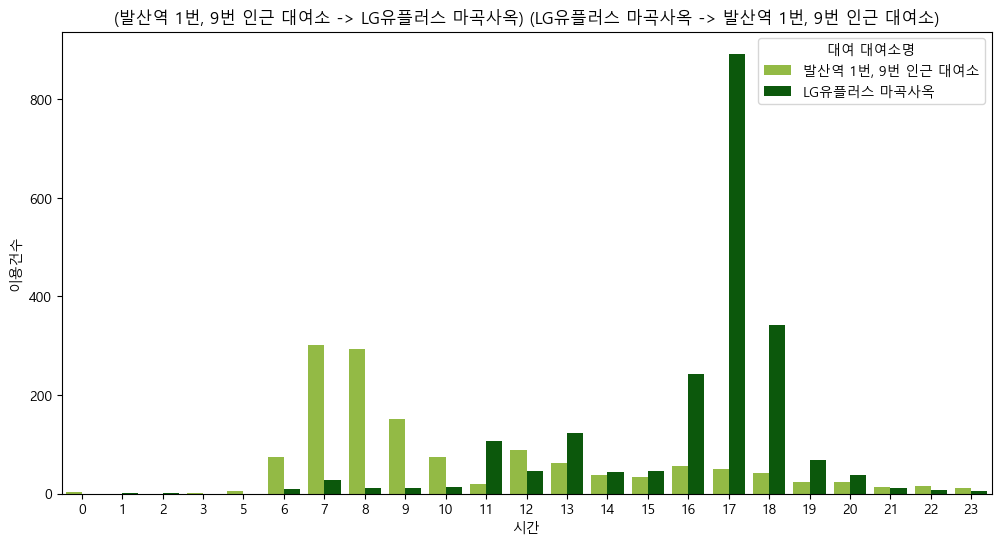

In [ ]:
발산역_1번_9번_인근_대여소_LG유플러스마곡사옥 = df_2024_대여이력[((df_2024_대여이력['대여 대여소명'] == '발산역 1번, 9번 인근 대여소') & (df_2024_대여이력['반납대여소명'] == 'LG유플러스 마곡사옥')) |
             ((df_2024_대여이력['대여 대여소명'] == 'LG유플러스 마곡사옥') & (df_2024_대여이력['반납대여소명'] == '발산역 1번, 9번 인근 대여소'))]

발산역_1번_9번_인근_대여소_LG유플러스마곡사옥['대여시간'] = pd.to_datetime(발산역_1번_9번_인근_대여소_LG유플러스마곡사옥['대여일시']).dt.hour
발산역_1번_9번_인근_대여소_LG유플러스마곡사옥_시간별이동 = 발산역_1번_9번_인근_대여소_LG유플러스마곡사옥.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')

plt.figure(figsize=(12, 6))
plt.title("(발산역 1번, 9번 인근 대여소 -> LG유플러스 마곡사옥) (LG유플러스 마곡사옥 -> 발산역 1번, 9번 인근 대여소)")
sns.barplot(data=발산역_1번_9번_인근_대여소_LG유플러스마곡사옥_시간별이동, x='대여시간', y='대여건수', hue='대여 대여소명', palette=(color_match[0],color_match[3]))
plt.ylabel('이용건수')
plt.xlabel('시간')
plt.show()

- ```역 근처다보니 출퇴근시간에 많은 대여와 반납이 이루어지고 있고, ```
- ``` 발산역 1번, 9번 인근 대여소와 많은 대여반납이 이루어진 LG유플러스 사옥과 조합해서 시간대별로 이용현황을 봤을 때 대중교통 -> 회사/상업 지역으로 이동하는 패턴을 보이는 것을 확인할 수 있습니다.```

### 종로구 초과대여지역 추가분석

In [ ]:
종로구_초과대여 = 대여반납횟수_df[대여반납횟수_df['자치구'] == '종로구']
종로구_초과대여.sort_values('대여/반납 차이').head(10)

대여소명   대여횟수  반납횟수  대여/반납 차이         위도          경도  \
255        경복궁역 7번출구 앞  10903  7375     -3528  37.575794  126.971451   
700        독립문역 3-1번출구  11087  7800     -3287  37.574158  126.958519   
344   광화문 풍림스페이스본 1단지앞   7427  4174     -3253  37.575291  126.968956   
2534        포르투갈 대사관 앞   9381  6298     -3083  37.579155  126.988960   
2738           효자동 삼거리   8514  6135     -2379  37.583603  126.972549   
1822        안국역 5번출구 앞  10976  8842     -2134  37.576241  126.986160   
1800       쌍용아파트2단지 정문   2220   176     -2044  37.581314  127.012680   
701           독립문역 사거리   7777  6034     -1743  37.572029  126.960785   
348      광화문역 6번출구 옆 B   5689  4320     -1369  37.569962  126.976158   
2230             일성아파트   1948   607     -1341  37.608719  126.972862   

             보관소(대여소)명  자치구  
255        경복궁역 7번출구 앞  종로구  
700        독립문역 3-1번출구  종로구  
344   광화문 풍림스페이스본 1단지앞  종로구  
2534        포르투갈 대사관 앞  종로구  
2738           효자동 삼거리  종로구  
1822        안국역 5번출구 앞  종로구  
1800       쌍용아파트2단지 정문  종로구  
701           독립문역 사거리  종로구  
348      광화문역 6번출구 옆 B  종로구  
2230             일성아파트  종로구

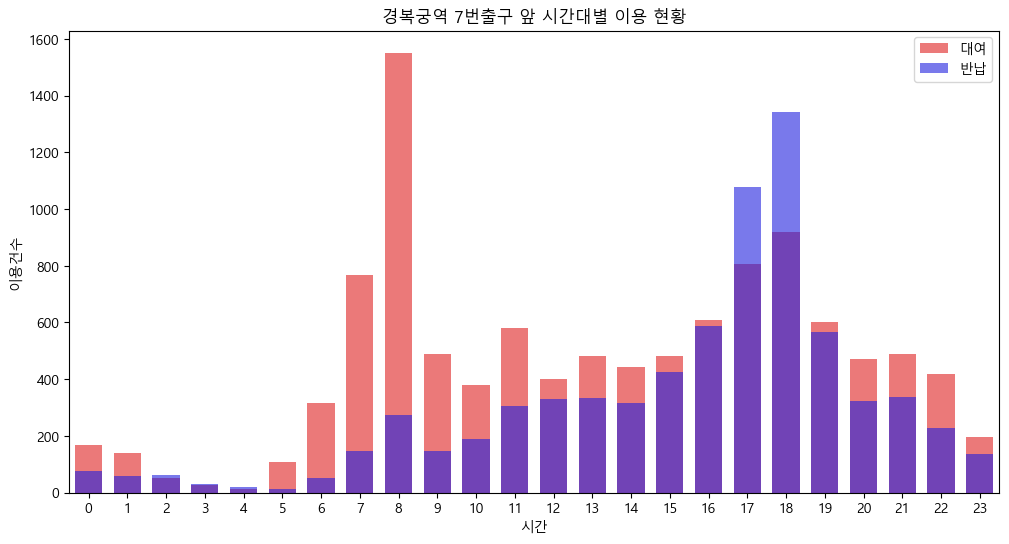

In [ ]:
# 경복궁역 7번출구 앞
경복궁역_7번출구_대여 = df_2024_대여이력[df_2024_대여이력['대여 대여소명'] == '경복궁역 7번출구 앞']
경복궁역_7번출구_반납 = df_2024_대여이력[df_2024_대여이력['반납대여소명'] == '경복궁역 7번출구 앞']

경복궁역_7번출구_대여['대여시간'] = pd.to_datetime(경복궁역_7번출구_대여['대여일시']).dt.hour
경복궁역_7번출구_반납['반납시간'] = pd.to_datetime(경복궁역_7번출구_반납['반납일시']).dt.hour

경복궁역_7번출구_대여 = 경복궁역_7번출구_대여.groupby('대여 대여소명')['대여시간'].value_counts().reset_index(name='대여건수')
경복궁역_7번출구_반납 = 경복궁역_7번출구_반납.groupby('반납대여소명')['반납시간'].value_counts().reset_index(name='반납건수')

plt.figure(figsize=(12, 6))
plt.title("경복궁역 7번출구 앞 시간대별 이용 현황")
sns.barplot(data=경복궁역_7번출구_대여, x='대여시간', y='대여건수', color='red', alpha=0.6, label='대여', width=0.7)
sns.barplot(data=경복궁역_7번출구_반납, x='반납시간', y='반납건수', color='blue', alpha=0.6, label='반납', width=0.7)
plt.legend()
plt.xlabel('시간')
plt.ylabel('이용건수')
plt.show()

# 해결방안 및 결론

> ## 해결방안

### 이용패턴과 가격체계 - 새로운 가격체계 도입
- 수요가 높은 정기권 판매 유지

- 정기권 기준 이용시간 30분으로 단축 판매

- 일일권, 정기권 2시간권 판매 중단

#### 기대효과
- 자전거 회전율 상승에 따른 이용건수 증가

- 장시간 이용시 초과요금에 따른 수익 증대(단순 비교시 약 28% 수익 상승)

#### 한계점
- 장시간 이용자들의 이탈률 확인 불가

- 명목가격 상승으로 인한 정기권 이용자 불만 증가 가능성

### 초과대여/반납 대여소 - 재배치 마일리지 제도 강화
- 서울시에서 23년, 24년 시범 시행한 재배치 정책으로 1건당 100마일리지 지급

    - 재배치 10만회, 재배치 관련 민원 감소

- 참여율 높이기 위해 초과이용이 높은 강도로 발생하는 지역,시간대에 추가 마일리지 도입

- 50대, 60대 이용 건수 비율 낮지 않음
    - 시니어 택배 사업처럼 재배치 사업도 시니어 일자리 창출 가능

### 초과대여/반납 대여소 - 인근 대여소 추천 기능
- 따릉이 대여앱(따릉이, 티머니, 토스)에서 반납할 때 자전거가 부족한 대여소 추천

    - 초과이용이 발생한 대여소 인근 200m이내에 초과이용이 발생하지 않은 대여소 확인
    - 시간적 여유가 있는 사람은 자연스럽게 재배치 마일리지 받으면서 재배치 유도

### 초과대여/반납 대여소 - 그 외 해결방안
- 예측모델 개발하여 미리 배치
    - 수요 예측모델을 통해 대여소의 재배치 요청 죄소화

- 대여소 이전 설치
    - 이용률 적은 대여소 재고량 줄이거나 이용률 높은 자치구로 재배치

- 전기자전거 도입
    - 고저차로 인한 편중 현상 줄일 수 있음

#### 한계점
- 본 분석은 2024년 누적이용내역을 토대로 초과량을 계산. 시간대별로 대여소의 자전거 재고량을 파악하려고 했지만

시간대별 대여소의 재고량을 확인할 수 있는 데이터가 부족하여 분석은 진행하지 못하였지만 무재고 시간을 파악했다면 더 효율적인 재배치 가능했을 것이라고 생각함

- 지역 특성(거주지, 회사, 대중교통, 관광지)을 범주형 컬럼으로 매핑 하여 분석하지 못했음.

- 해결방안을 통계적으로 검정하기 위한 데이터가 부족하여 간접적으로 효과의 유뮤를 판단한 것이 아쉬움

> ## 결론

### 서론
- 적자 원인으로는 동결된 가격, 높은 회전율, 거치대의 비효율적인 배치 및 자전거 배치의 편중이 있음 -> 가격과 자전거 배치의 편중을 중점적으로 분석

### 이용패턴과 가격체계 결론
- 정기권의 판매를 유지하되 이용자의 이용패턴에 맞게 이용단위시간을 30분으로 단축하고, 2시간 이용권을 폐지할 것을 제안

### 초과 대여/반납 대여소 결론
- 초과 이용 원인으로 대여소가 위치한 지역 특성과 대여-반납 대여소 간 고저차 2가지로 분석

- 이에 대한 해결방안 5가지 제안, 일부는 서울시에서 실행 중이며 효과도 있어서 해결방안이 유의미함을 확인